In [70]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import math
import time
from math import sqrt
from sklearn.impute import KNNImputer

In [88]:
# Fetching data
df = pd.read_csv('dataset.csv')

<AxesSubplot:xlabel='Time'>

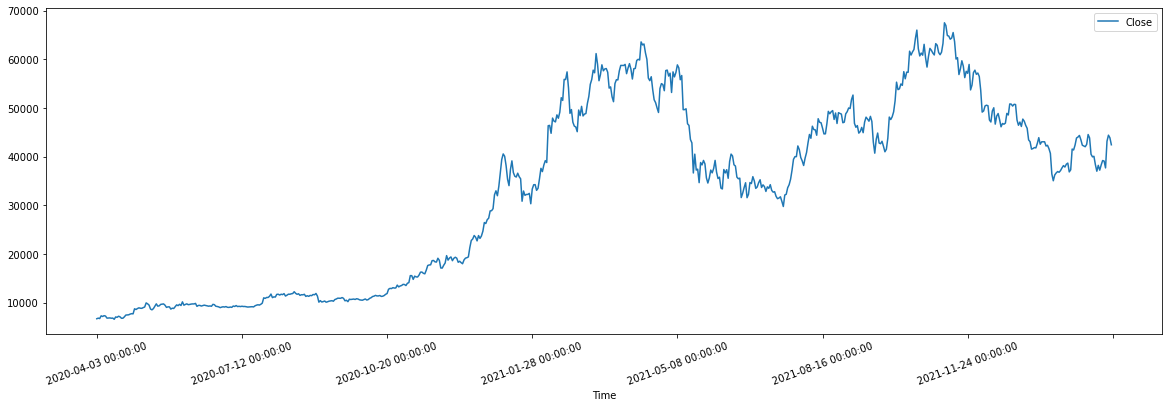

In [89]:
# Plotting btc prices
df.plot(x='Time', y='Close', kind='line', figsize=(20,6), rot=20)

In [90]:
# Set Target Variable
output_var = pd.DataFrame(df["Close"])

time = pd.DataFrame(df["Time"])

# Selecting the Features
features = ["Close", "Compound", "Volume", "FundingRate", "Bitcoin_SVI", "Cryptocurrency_SVI", \
           "No. of Active Addresses", "No. of Unique Addresses", "Transactions", \
           "Compound_lag_1", "Volume_lag_1", "FundingRate_lag_1", "Bitcoin_SVI_lag_1", "Cryptocurrency_SVI_lag_1", \
           "No. of Active Addresses_lag_1", "No. of Unique Addresses_lag_1", "Transactions_lag_1", \
           "Compound_lag_2", "Volume_lag_2", "FundingRate_lag_2", "Bitcoin_SVI_lag_2", "Cryptocurrency_SVI_lag_2", \
           "No. of Active Addresses_lag_2", "No. of Unique Addresses_lag_2", "Transactions_lag_2", \
           "Compound_lag_3", "Volume_lag_3", "FundingRate_lag_3", "Bitcoin_SVI_lag_3", "Cryptocurrency_SVI_lag_3", \
           "No. of Active Addresses_lag_3", "No. of Unique Addresses_lag_3", "Transactions_lag_3", \
           "Compound_lag_4", "Volume_lag_4", "FundingRate_lag_4", "Bitcoin_SVI_lag_4", "Cryptocurrency_SVI_lag_4", \
           "No. of Active Addresses_lag_4", "No. of Unique Addresses_lag_4", "Transactions_lag_4", \
           "Compound_lag_5", "Volume_lag_5", "FundingRate_lag_5", "Bitcoin_SVI_lag_5", "Cryptocurrency_SVI_lag_5", \
           "No. of Active Addresses_lag_5", "No. of Unique Addresses_lag_5", "Transactions_lag_5"]

In [91]:
dataframe = df[features]

## Data Split

In [92]:
test_size = 0.2                                                # proportion of dataset to be used as test set
cv_size = 0.2                                                   # proportion of dataset to be used as cross-validation set

In [93]:
num_cv = int(cv_size*len(dataframe))
num_test = int(test_size*len(dataframe))
num_train = len(dataframe) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

# Split into train, cv, and test
train = dataframe[:num_train]
cv = dataframe[num_train:num_train+num_cv]
train_cv = dataframe[:num_train+num_cv]
test = dataframe[num_train+num_cv:]

num_train = 420
num_cv = 140
num_test = 140


## NaN Values

In [94]:
print(train.isna().sum())
print(cv.isna().sum())
print(train_cv.isna().sum())
print(test.isna().sum())

Close                            0
Compound                         0
Volume                           0
FundingRate                      0
Bitcoin_SVI                      0
Cryptocurrency_SVI               0
No. of Active Addresses          0
No. of Unique Addresses          1
Transactions                     0
Compound_lag_1                   0
Volume_lag_1                     0
FundingRate_lag_1                0
Bitcoin_SVI_lag_1                0
Cryptocurrency_SVI_lag_1         0
No. of Active Addresses_lag_1    0
No. of Unique Addresses_lag_1    1
Transactions_lag_1               0
Compound_lag_2                   0
Volume_lag_2                     0
FundingRate_lag_2                0
Bitcoin_SVI_lag_2                0
Cryptocurrency_SVI_lag_2         0
No. of Active Addresses_lag_2    0
No. of Unique Addresses_lag_2    1
Transactions_lag_2               0
Compound_lag_3                   0
Volume_lag_3                     0
FundingRate_lag_3                0
Bitcoin_SVI_lag_3   

In [95]:
KNN_miss_filling = KNNImputer(n_neighbors=5).fit(train)
train = pd.DataFrame(KNN_miss_filling.transform(train))

KNN_miss_filling = KNNImputer(n_neighbors=5).fit(train_cv)
train_cv = pd.DataFrame(KNN_miss_filling.transform(train_cv))

## Feature Scaling

In [96]:
scaler = MinMaxScaler(feature_range=(0, 1))

train = scaler.fit_transform(train)
train = pd.DataFrame(columns=features, data=train, index=df.index)

cv = scaler.fit_transform(cv)
cv = pd.DataFrame(columns=features, data=cv, index=df.index)

train_cv = scaler.fit_transform(train_cv)
train_cv = pd.DataFrame(columns=features, data=train_cv, index=df.index)

test = scaler.fit_transform(test)
test = pd.DataFrame(columns=features, data=test, index=df.index)

In [97]:
features.remove('Close')

In [115]:
# Split into train, cv, and test
# y_train = pd.DataFrame(train["Close"])[:].values.ravel()
print(train[:][0])

X_train, y_train = train[features], pd.DataFrame(train["Close"])
X_cv, y_cv = cv[features], cv['Close']
X_train_cv, y_train_cv = train_cv[features], train_cv['Close']
X_test, y_test = test[features], test['Close']
print("train.shape = " + str(X_train.shape))
print("cv.shape = " + str(X_cv.shape))
print("train_cv.shape = " + str(X_train_cv.shape))
print("test.shape = " + str(X_test.shape))

[0.00200678 0.60112375 0.0238235  0.140625   0.0412046  0.03359406
 0.19992469 0.21558046 0.40710332 0.60112375 0.0238235  0.140625
 0.0412046  0.03359406 0.19992469 0.21558046 0.40710332 0.60112375
 0.0238235  0.140625   0.0412046  0.03359406 0.19992469 0.21558046
 0.40710332 0.60112375 0.0238235  0.140625   0.0412046  0.03359406
 0.19992469 0.21558046 0.40710332 0.60112375 0.0238235  0.140625
 0.0412046  0.03359406 0.19992469 0.21558046 0.40710332 0.60112375
 0.0238235  0.140625   0.0412046  0.03359406 0.19992469 0.21558046
 0.40710332]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [5]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)

# Data used to predict 4 March
predict_feature = feature_transform[729:]

# Drop the Last Row 
feature_transform = feature_transform.drop([729])

feature_transform.head()

Compound    Volume  FundingRate  Bitcoin_SVI  Cryptocurrency_SVI  \
0    0.6616  0.006956     0.406593     0.070506            0.040714   
1    0.6616  0.010453     0.428571     0.076814            0.034898   
2    0.6616  0.003008     0.439560     0.073660            0.030586   
3    0.6616  0.001482     0.494505     0.054838            0.027677   
4    0.6616  0.009495     0.516484     0.064198            0.040714   

   No. of Active Addresses  No. of Unique Addresses  Transactions  
0                 0.399875                 0.429122      0.844827  
1                 0.324190                 0.392319      0.811569  
2                 0.338011                 0.388311      0.771346  
3                 0.193585                 0.257815      0.680871  
4                 0.161141                 0.213671      0.642553

 ## Defining LSTM Model & MAPE Functions

In [11]:
def run(batchSize, numEpochs, X, Y, pred_set, actual_set):
    #Reshaping
    trainX =np.array(X)
    X = trainX.reshape(X.shape[0], 1, X.shape[1])
    
    testX =np.array(pred_set)
    pred_set = testX.reshape(pred_set.shape[0], 1, pred_set.shape[1])
    
    #Building the LSTM Model
    lstm = Sequential()
    lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences=False))
    lstm.add(Dense(1))
    lstm.compile(loss="mean_squared_error", optimizer="adam")
    plot_model(lstm, show_shapes=True, show_layer_names=True)

    ##################################################
    
    # Fitting the RNN to the Training set
    history = lstm.fit(X, Y, epochs=numEpochs, batch_size=batchSize, verbose=1, shuffle=False)
    predicted_Price = lstm.predict(pred_set)

    orig = actual_set

    rmse = sqrt(mean_squared_error(orig, predicted_Price))
    mape = get_mape(orig, predicted_Price)
    # Calculate RMSE
    print("RMSE on train set = %0.3f" % rmse)
    # Calculate MAPE
    print("MAPE on train set = %0.3f%%" % mape)

    return rmse, mape

In [12]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Tuning Epochs Param

In [19]:
# vary training batches
param_label = 'epochs'
param_list = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
error_rate = {param_label: [], 'rmse': [], 'mape': []}
default_batch_size = 32

for param in param_list:
    rmse, mape = run(default_batch_size, param, X_train, y_train, X_cv, y_cv)
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/500
14/14 [==============================] - 1s 2ms/step - loss: 880169152.0000
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 880165184.0000
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 880160896.0000
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 880155776.0000
Epoch 5/500
14/14 [==============================] - 0s 1ms/step - loss: 880149504.0000
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 880141888.0000
Epoch 7/500
14/14 [==============================] - 0s 1ms/step - loss: 880132800.0000
Epoch 8/500
14/14 [==============================] - 0s 1ms/step - loss: 880122048.0000
Epoch 9/500
14/14 [==============================] - 0s 1ms/step - loss: 880109504.0000
Epoch 10/500
14/14 [==========================

14/14 [==============================] - 0s 1ms/step - loss: 851205632.0000
Epoch 183/500
14/14 [==============================] - 0s 1ms/step - loss: 850937216.0000
Epoch 184/500
14/14 [==============================] - 0s 1ms/step - loss: 850668032.0000
Epoch 185/500
14/14 [==============================] - 0s 1ms/step - loss: 850397824.0000
Epoch 186/500
14/14 [==============================] - 0s 1ms/step - loss: 850126784.0000
Epoch 187/500
14/14 [==============================] - 0s 1ms/step - loss: 849854848.0000
Epoch 188/500
14/14 [==============================] - 0s 1ms/step - loss: 849581952.0000
Epoch 189/500
14/14 [==============================] - 0s 1ms/step - loss: 849308288.0000
Epoch 190/500
14/14 [==============================] - 0s 1ms/step - loss: 849033728.0000
Epoch 191/500
14/14 [==============================] - 0s 1ms/step - loss: 848758208.0000
Epoch 192/500
14/14 [==============================] - 0s 1ms/step - loss: 848481856.0000
Epoch 193/500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 789898688.0000
Epoch 365/500
14/14 [==============================] - 0s 1ms/step - loss: 789503616.0000
Epoch 366/500
14/14 [==============================] - 0s 1ms/step - loss: 789108032.0000
Epoch 367/500
14/14 [==============================] - 0s 1ms/step - loss: 788711872.0000
Epoch 368/500
14/14 [==============================] - 0s 1ms/step - loss: 788315072.0000
Epoch 369/500
14/14 [==============================] - 0s 1ms/step - loss: 787917888.0000
Epoch 370/500
14/14 [==============================] - 0s 1ms/step - loss: 787520064.0000
Epoch 371/500
14/14 [==============================] - 0s 1ms/step - loss: 787121856.0000
Epoch 372/500
14/14 [==============================] - 0s 1ms/step - loss: 786723008.0000
Epoch 373/500
14/14 [==============================] - 0s 1ms/step - loss: 786323712.0000
Epoch 374/500
14/14 [==============================] - 0s 1ms/step - loss: 785923840.0000
Epoch 375/500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 878543168.0000
Epoch 44/1000
14/14 [==============================] - 0s 1ms/step - loss: 878465280.0000
Epoch 45/1000
14/14 [==============================] - 0s 1ms/step - loss: 878386240.0000
Epoch 46/1000
14/14 [==============================] - 0s 1ms/step - loss: 878305856.0000
Epoch 47/1000
14/14 [==============================] - 0s 1ms/step - loss: 878224256.0000
Epoch 48/1000
14/14 [==============================] - 0s 1ms/step - loss: 878141376.0000
Epoch 49/1000
14/14 [==============================] - 0s 1ms/step - loss: 878057280.0000
Epoch 50/1000
14/14 [==============================] - 0s 1ms/step - loss: 877971904.0000
Epoch 51/1000
14/14 [==============================] - 0s 1ms/step - loss: 877885312.0000
Epoch 52/1000
14/14 [==============================] - 0s 1ms/step - loss: 877797760.0000
Epoch 53/1000
14/14 [==============================] - 0s 1ms/step - loss: 877708800.0000
Epoch 54/1000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 849390208.0000
Epoch 224/1000
14/14 [==============================] - 0s 1ms/step - loss: 849159680.0000
Epoch 225/1000
14/14 [==============================] - 0s 1ms/step - loss: 848928576.0000
Epoch 226/1000
14/14 [==============================] - 0s 1ms/step - loss: 848696704.0000
Epoch 227/1000
14/14 [==============================] - 0s 1ms/step - loss: 848464256.0000
Epoch 228/1000
14/14 [==============================] - 0s 1ms/step - loss: 848231168.0000
Epoch 229/1000
14/14 [==============================] - 0s 1ms/step - loss: 847997632.0000
Epoch 230/1000
14/14 [==============================] - 0s 1ms/step - loss: 847763392.0000
Epoch 231/1000
14/14 [==============================] - 0s 1ms/step - loss: 847528448.0000
Epoch 232/1000
14/14 [==============================] - 0s 1ms/step - loss: 847292992.0000
Epoch 233/1000
14/14 [==============================] - 0s 1ms/step - loss: 847056832.0000
Epoch 234/1000

14/14 [==============================] - 0s 1ms/step - loss: 799053952.0000
Epoch 404/1000
14/14 [==============================] - 0s 1ms/step - loss: 798730752.0000
Epoch 405/1000
14/14 [==============================] - 0s 1ms/step - loss: 798407104.0000
Epoch 406/1000
14/14 [==============================] - 0s 1ms/step - loss: 798083072.0000
Epoch 407/1000
14/14 [==============================] - 0s 1ms/step - loss: 797758592.0000
Epoch 408/1000
14/14 [==============================] - 0s 1ms/step - loss: 797433792.0000
Epoch 409/1000
14/14 [==============================] - 0s 1ms/step - loss: 797108416.0000
Epoch 410/1000
14/14 [==============================] - 0s 1ms/step - loss: 796782656.0000
Epoch 411/1000
14/14 [==============================] - 0s 1ms/step - loss: 796456576.0000
Epoch 412/1000
14/14 [==============================] - 0s 1ms/step - loss: 796129984.0000
Epoch 413/1000
14/14 [==============================] - 0s 1ms/step - loss: 795803072.0000
Epoch 414/1000

14/14 [==============================] - 0s 1ms/step - loss: 734927488.0000
Epoch 584/1000
14/14 [==============================] - 0s 1ms/step - loss: 734542592.0000
Epoch 585/1000
14/14 [==============================] - 0s 1ms/step - loss: 734157248.0000
Epoch 586/1000
14/14 [==============================] - 0s 1ms/step - loss: 733771840.0000
Epoch 587/1000
14/14 [==============================] - 0s 1ms/step - loss: 733385984.0000
Epoch 588/1000
14/14 [==============================] - 0s 1ms/step - loss: 733000000.0000
Epoch 589/1000
14/14 [==============================] - 0s 1ms/step - loss: 732613632.0000
Epoch 590/1000
14/14 [==============================] - 0s 1ms/step - loss: 732227072.0000
Epoch 591/1000
14/14 [==============================] - 0s 1ms/step - loss: 731840320.0000
Epoch 592/1000
14/14 [==============================] - 0s 1ms/step - loss: 731453184.0000
Epoch 593/1000
14/14 [==============================] - 0s 1ms/step - loss: 731065856.0000
Epoch 594/1000

14/14 [==============================] - 0s 1ms/step - loss: 662191296.0000
Epoch 764/1000
14/14 [==============================] - 0s 1ms/step - loss: 661772672.0000
Epoch 765/1000
14/14 [==============================] - 0s 1ms/step - loss: 661353792.0000
Epoch 766/1000
14/14 [==============================] - 0s 1ms/step - loss: 660934976.0000
Epoch 767/1000
14/14 [==============================] - 0s 1ms/step - loss: 660515968.0000
Epoch 768/1000
14/14 [==============================] - 0s 1ms/step - loss: 660096896.0000
Epoch 769/1000
14/14 [==============================] - 0s 1ms/step - loss: 659677696.0000
Epoch 770/1000
14/14 [==============================] - 0s 1ms/step - loss: 659258368.0000
Epoch 771/1000
14/14 [==============================] - 0s 1ms/step - loss: 658838912.0000
Epoch 772/1000
14/14 [==============================] - 0s 1ms/step - loss: 658419456.0000
Epoch 773/1000
14/14 [==============================] - 0s 1ms/step - loss: 657999808.0000
Epoch 774/1000

14/14 [==============================] - 0s 1ms/step - loss: 585922432.0000
Epoch 944/1000
14/14 [==============================] - 0s 1ms/step - loss: 585498240.0000
Epoch 945/1000
14/14 [==============================] - 0s 1ms/step - loss: 585074176.0000
Epoch 946/1000
14/14 [==============================] - 0s 1ms/step - loss: 584650176.0000
Epoch 947/1000
14/14 [==============================] - 0s 1ms/step - loss: 584226112.0000
Epoch 948/1000
14/14 [==============================] - 0s 1ms/step - loss: 583802176.0000
Epoch 949/1000
14/14 [==============================] - 0s 1ms/step - loss: 583378240.0000
Epoch 950/1000
14/14 [==============================] - 0s 1ms/step - loss: 582954432.0000
Epoch 951/1000
14/14 [==============================] - 0s 1ms/step - loss: 582530688.0000
Epoch 952/1000
14/14 [==============================] - 0s 1ms/step - loss: 582106880.0000
Epoch 953/1000
14/14 [==============================] - 0s 1ms/step - loss: 581683200.0000
Epoch 954/1000

Epoch 122/1500
14/14 [==============================] - 0s 1ms/step - loss: 864612800.0000
Epoch 123/1500
14/14 [==============================] - 0s 1ms/step - loss: 864392192.0000
Epoch 124/1500
14/14 [==============================] - 0s 1ms/step - loss: 864170432.0000
Epoch 125/1500
14/14 [==============================] - 0s 1ms/step - loss: 863947648.0000
Epoch 126/1500
14/14 [==============================] - 0s 1ms/step - loss: 863723584.0000
Epoch 127/1500
14/14 [==============================] - 0s 1ms/step - loss: 863498368.0000
Epoch 128/1500
14/14 [==============================] - 0s 1ms/step - loss: 863272064.0000
Epoch 129/1500
14/14 [==============================] - 0s 1ms/step - loss: 863044544.0000
Epoch 130/1500
14/14 [==============================] - 0s 1ms/step - loss: 862815872.0000
Epoch 131/1500
14/14 [==============================] - 0s 1ms/step - loss: 862586112.0000
Epoch 132/1500
14/14 [==============================] - 0s 1ms/step - loss: 862355072.0000

14/14 [==============================] - 0s 1ms/step - loss: 840522624.0000
Epoch 213/1500
14/14 [==============================] - 0s 1ms/step - loss: 840211456.0000
Epoch 214/1500
14/14 [==============================] - 0s 1ms/step - loss: 839899520.0000
Epoch 215/1500
14/14 [==============================] - 0s 1ms/step - loss: 839586688.0000
Epoch 216/1500
14/14 [==============================] - 0s 1ms/step - loss: 839272960.0000
Epoch 217/1500
14/14 [==============================] - 0s 1ms/step - loss: 838958336.0000
Epoch 218/1500
14/14 [==============================] - 0s 1ms/step - loss: 838643008.0000
Epoch 219/1500
14/14 [==============================] - 0s 1ms/step - loss: 838326720.0000
Epoch 220/1500
14/14 [==============================] - 0s 1ms/step - loss: 838009600.0000
Epoch 221/1500
14/14 [==============================] - 0s 1ms/step - loss: 837691648.0000
Epoch 222/1500
14/14 [==============================] - 0s 1ms/step - loss: 837372864.0000
Epoch 223/1500

14/14 [==============================] - 0s 1ms/step - loss: 772840064.0000
Epoch 393/1500
14/14 [==============================] - 0s 1ms/step - loss: 772409216.0000
Epoch 394/1500
14/14 [==============================] - 0s 1ms/step - loss: 771977728.0000
Epoch 395/1500
14/14 [==============================] - 0s 1ms/step - loss: 771545856.0000
Epoch 396/1500
14/14 [==============================] - 0s 1ms/step - loss: 771113344.0000
Epoch 397/1500
14/14 [==============================] - 0s 1ms/step - loss: 770680512.0000
Epoch 398/1500
14/14 [==============================] - 0s 1ms/step - loss: 770247040.0000
Epoch 399/1500
14/14 [==============================] - 0s 1ms/step - loss: 769813248.0000
Epoch 400/1500
14/14 [==============================] - 0s 1ms/step - loss: 769378752.0000
Epoch 401/1500
14/14 [==============================] - 0s 1ms/step - loss: 768943936.0000
Epoch 402/1500
14/14 [==============================] - 0s 1ms/step - loss: 768508672.0000
Epoch 403/1500

14/14 [==============================] - 0s 1ms/step - loss: 688725568.0000
Epoch 573/1500
14/14 [==============================] - 0s 1ms/step - loss: 688229952.0000
Epoch 574/1500
14/14 [==============================] - 0s 1ms/step - loss: 687734016.0000
Epoch 575/1500
14/14 [==============================] - 0s 1ms/step - loss: 687237952.0000
Epoch 576/1500
14/14 [==============================] - 0s 1ms/step - loss: 686741568.0000
Epoch 577/1500
14/14 [==============================] - 0s 1ms/step - loss: 686245056.0000
Epoch 578/1500
14/14 [==============================] - 0s 1ms/step - loss: 685748352.0000
Epoch 579/1500
14/14 [==============================] - 0s 1ms/step - loss: 685251264.0000
Epoch 580/1500
14/14 [==============================] - 0s 1ms/step - loss: 684754176.0000
Epoch 581/1500
14/14 [==============================] - 0s 1ms/step - loss: 684256768.0000
Epoch 582/1500
14/14 [==============================] - 0s 1ms/step - loss: 683759168.0000
Epoch 583/1500

14/14 [==============================] - 0s 1ms/step - loss: 597396672.0000
Epoch 753/1500
14/14 [==============================] - 0s 1ms/step - loss: 596885568.0000
Epoch 754/1500
14/14 [==============================] - 0s 1ms/step - loss: 596374528.0000
Epoch 755/1500
14/14 [==============================] - 0s 1ms/step - loss: 595863488.0000
Epoch 756/1500
14/14 [==============================] - 0s 1ms/step - loss: 595352448.0000
Epoch 757/1500
14/14 [==============================] - 0s 1ms/step - loss: 594841600.0000
Epoch 758/1500
14/14 [==============================] - 0s 1ms/step - loss: 594330688.0000
Epoch 759/1500
14/14 [==============================] - 0s 1ms/step - loss: 593819840.0000
Epoch 760/1500
14/14 [==============================] - 0s 1ms/step - loss: 593309120.0000
Epoch 761/1500
14/14 [==============================] - 0s 1ms/step - loss: 592798400.0000
Epoch 762/1500
14/14 [==============================] - 0s 1ms/step - loss: 592287744.0000
Epoch 763/1500

14/14 [==============================] - 0s 1ms/step - loss: 507479904.0000
Epoch 933/1500
14/14 [==============================] - 0s 1ms/step - loss: 506999232.0000
Epoch 934/1500
14/14 [==============================] - 0s 1ms/step - loss: 506518848.0000
Epoch 935/1500
14/14 [==============================] - 0s 1ms/step - loss: 506038752.0000
Epoch 936/1500
14/14 [==============================] - 0s 1ms/step - loss: 505558976.0000
Epoch 937/1500
14/14 [==============================] - 0s 1ms/step - loss: 505079456.0000
Epoch 938/1500
14/14 [==============================] - 0s 1ms/step - loss: 504600256.0000
Epoch 939/1500
14/14 [==============================] - 0s 1ms/step - loss: 504121312.0000
Epoch 940/1500
14/14 [==============================] - 0s 1ms/step - loss: 503642656.0000
Epoch 941/1500
14/14 [==============================] - 0s 1ms/step - loss: 503164288.0000
Epoch 942/1500
14/14 [==============================] - 0s 1ms/step - loss: 502686240.0000
Epoch 943/1500

Epoch 1022/1500
14/14 [==============================] - 0s 1ms/step - loss: 465490336.0000
Epoch 1023/1500
14/14 [==============================] - 0s 1ms/step - loss: 465039616.0000
Epoch 1024/1500
14/14 [==============================] - 0s 1ms/step - loss: 464589344.0000
Epoch 1025/1500
14/14 [==============================] - 0s 1ms/step - loss: 464139456.0000
Epoch 1026/1500
14/14 [==============================] - 0s 1ms/step - loss: 463689920.0000
Epoch 1027/1500
14/14 [==============================] - 0s 1ms/step - loss: 463240768.0000
Epoch 1028/1500
14/14 [==============================] - 0s 1ms/step - loss: 462792064.0000
Epoch 1029/1500
14/14 [==============================] - 0s 1ms/step - loss: 462343616.0000
Epoch 1030/1500
14/14 [==============================] - 0s 1ms/step - loss: 461895616.0000
Epoch 1031/1500
14/14 [==============================] - 0s 1ms/step - loss: 461448032.0000
Epoch 1032/1500
14/14 [==============================] - 0s 1ms/step - loss: 461

14/14 [==============================] - 0s 1ms/step - loss: 426970432.0000
Epoch 1112/1500
14/14 [==============================] - 0s 1ms/step - loss: 426556992.0000
Epoch 1113/1500
14/14 [==============================] - 0s 1ms/step - loss: 426144032.0000
Epoch 1114/1500
14/14 [==============================] - 0s 1ms/step - loss: 425731488.0000
Epoch 1115/1500
14/14 [==============================] - 0s 1ms/step - loss: 425319456.0000
Epoch 1116/1500
14/14 [==============================] - 0s 1ms/step - loss: 424907808.0000
Epoch 1117/1500
14/14 [==============================] - 0s 1ms/step - loss: 424496704.0000
Epoch 1118/1500
14/14 [==============================] - 0s 1ms/step - loss: 424086016.0000
Epoch 1119/1500
14/14 [==============================] - 0s 1ms/step - loss: 423675808.0000
Epoch 1120/1500
14/14 [==============================] - 0s 1ms/step - loss: 423266016.0000
Epoch 1121/1500
14/14 [==============================] - 0s 1ms/step - loss: 422856704.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 361054848.0000
Epoch 1290/1500
14/14 [==============================] - 0s 1ms/step - loss: 360730304.0000
Epoch 1291/1500
14/14 [==============================] - 0s 1ms/step - loss: 360406336.0000
Epoch 1292/1500
14/14 [==============================] - 0s 1ms/step - loss: 360082912.0000
Epoch 1293/1500
14/14 [==============================] - 0s 1ms/step - loss: 359759968.0000
Epoch 1294/1500
14/14 [==============================] - 0s 1ms/step - loss: 359437600.0000
Epoch 1295/1500
14/14 [==============================] - 0s 1ms/step - loss: 359115744.0000
Epoch 1296/1500
14/14 [==============================] - 0s 1ms/step - loss: 358794400.0000
Epoch 1297/1500
14/14 [==============================] - 0s 1ms/step - loss: 358473600.0000
Epoch 1298/1500
14/14 [==============================] - 0s 1ms/step - loss: 358153344.0000
Epoch 1299/1500
14/14 [==============================] - 0s 1ms/step - loss: 357833568.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 311090944.0000
Epoch 1468/1500
14/14 [==============================] - 0s 1ms/step - loss: 310833376.0000
Epoch 1469/1500
14/14 [==============================] - 0s 1ms/step - loss: 310574880.0000
Epoch 1470/1500
14/14 [==============================] - 0s 1ms/step - loss: 310315488.0000
Epoch 1471/1500
14/14 [==============================] - 0s 1ms/step - loss: 310055168.0000
Epoch 1472/1500
14/14 [==============================] - 0s 1ms/step - loss: 309793792.0000
Epoch 1473/1500
14/14 [==============================] - 0s 1ms/step - loss: 309531296.0000
Epoch 1474/1500
14/14 [==============================] - 0s 1ms/step - loss: 309267680.0000
Epoch 1475/1500
14/14 [==============================] - 0s 1ms/step - loss: 309002752.0000
Epoch 1476/1500
14/14 [==============================] - 0s 1ms/step - loss: 308736544.0000
Epoch 1477/1500
14/14 [==============================] - 0s 1ms/step - loss: 308468896.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 877455680.0000
Epoch 56/2000
14/14 [==============================] - 0s 1ms/step - loss: 877362432.0000
Epoch 57/2000
14/14 [==============================] - 0s 1ms/step - loss: 877268096.0000
Epoch 58/2000
14/14 [==============================] - 0s 1ms/step - loss: 877172608.0000
Epoch 59/2000
14/14 [==============================] - 0s 1ms/step - loss: 877075968.0000
Epoch 60/2000
14/14 [==============================] - 0s 1ms/step - loss: 876978240.0000
Epoch 61/2000
14/14 [==============================] - 0s 1ms/step - loss: 876879488.0000
Epoch 62/2000
14/14 [==============================] - 0s 1ms/step - loss: 876779648.0000
Epoch 63/2000
14/14 [==============================] - 0s 1ms/step - loss: 876678656.0000
Epoch 64/2000
14/14 [==============================] - 0s 1ms/step - loss: 876576704.0000
Epoch 65/2000
14/14 [==============================] - 0s 1ms/step - loss: 876473536.0000
Epoch 66/2000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 844201152.0000
Epoch 236/2000
14/14 [==============================] - 0s 1ms/step - loss: 843944896.0000
Epoch 237/2000
14/14 [==============================] - 0s 1ms/step - loss: 843688000.0000
Epoch 238/2000
14/14 [==============================] - 0s 1ms/step - loss: 843430464.0000
Epoch 239/2000
14/14 [==============================] - 0s 1ms/step - loss: 843172224.0000
Epoch 240/2000
14/14 [==============================] - 0s 1ms/step - loss: 842913408.0000
Epoch 241/2000
14/14 [==============================] - 0s 1ms/step - loss: 842653888.0000
Epoch 242/2000
14/14 [==============================] - 0s 1ms/step - loss: 842393792.0000
Epoch 243/2000
14/14 [==============================] - 0s 1ms/step - loss: 842132992.0000
Epoch 244/2000
14/14 [==============================] - 0s 1ms/step - loss: 841871552.0000
Epoch 245/2000
14/14 [==============================] - 0s 1ms/step - loss: 841609600.0000
Epoch 246/2000

14/14 [==============================] - 0s 1ms/step - loss: 788955520.0000
Epoch 416/2000
14/14 [==============================] - 0s 1ms/step - loss: 788603968.0000
Epoch 417/2000
14/14 [==============================] - 0s 1ms/step - loss: 788252032.0000
Epoch 418/2000
14/14 [==============================] - 0s 1ms/step - loss: 787899520.0000
Epoch 419/2000
14/14 [==============================] - 0s 1ms/step - loss: 787546688.0000
Epoch 420/2000
14/14 [==============================] - 0s 1ms/step - loss: 787193472.0000
Epoch 421/2000
14/14 [==============================] - 0s 1ms/step - loss: 786839744.0000
Epoch 422/2000
14/14 [==============================] - 0s 1ms/step - loss: 786485760.0000
Epoch 423/2000
14/14 [==============================] - 0s 1ms/step - loss: 786131136.0000
Epoch 424/2000
14/14 [==============================] - 0s 1ms/step - loss: 785776192.0000
Epoch 425/2000
14/14 [==============================] - 0s 1ms/step - loss: 785420800.0000
Epoch 426/2000

14/14 [==============================] - 0s 1ms/step - loss: 719748096.0000
Epoch 596/2000
14/14 [==============================] - 0s 1ms/step - loss: 719335680.0000
Epoch 597/2000
14/14 [==============================] - 0s 1ms/step - loss: 718923008.0000
Epoch 598/2000
14/14 [==============================] - 0s 1ms/step - loss: 718510080.0000
Epoch 599/2000
14/14 [==============================] - 0s 1ms/step - loss: 718096896.0000
Epoch 600/2000
14/14 [==============================] - 0s 1ms/step - loss: 717683520.0000
Epoch 601/2000
14/14 [==============================] - 0s 1ms/step - loss: 717269888.0000
Epoch 602/2000
14/14 [==============================] - 0s 1ms/step - loss: 716856000.0000
Epoch 603/2000
14/14 [==============================] - 0s 1ms/step - loss: 716441792.0000
Epoch 604/2000
14/14 [==============================] - 0s 1ms/step - loss: 716027456.0000
Epoch 605/2000
14/14 [==============================] - 0s 1ms/step - loss: 715612800.0000
Epoch 606/2000

14/14 [==============================] - 0s 1ms/step - loss: 642450752.0000
Epoch 776/2000
14/14 [==============================] - 0s 1ms/step - loss: 642009472.0000
Epoch 777/2000
14/14 [==============================] - 0s 1ms/step - loss: 641568192.0000
Epoch 778/2000
14/14 [==============================] - 0s 1ms/step - loss: 641126848.0000
Epoch 779/2000
14/14 [==============================] - 0s 1ms/step - loss: 640685376.0000
Epoch 780/2000
14/14 [==============================] - 0s 1ms/step - loss: 640243904.0000
Epoch 781/2000
14/14 [==============================] - 0s 1ms/step - loss: 639802304.0000
Epoch 782/2000
14/14 [==============================] - 0s 1ms/step - loss: 639360640.0000
Epoch 783/2000
14/14 [==============================] - 0s 1ms/step - loss: 638918976.0000
Epoch 784/2000
14/14 [==============================] - 0s 1ms/step - loss: 638477184.0000
Epoch 785/2000
14/14 [==============================] - 0s 1ms/step - loss: 638035264.0000
Epoch 786/2000

14/14 [==============================] - 0s 1ms/step - loss: 562822592.0000
Epoch 956/2000
14/14 [==============================] - 0s 1ms/step - loss: 562384256.0000
Epoch 957/2000
14/14 [==============================] - 0s 1ms/step - loss: 561946048.0000
Epoch 958/2000
14/14 [==============================] - 0s 1ms/step - loss: 561507904.0000
Epoch 959/2000
14/14 [==============================] - 0s 1ms/step - loss: 561069824.0000
Epoch 960/2000
14/14 [==============================] - 0s 1ms/step - loss: 560631872.0000
Epoch 961/2000
14/14 [==============================] - 0s 1ms/step - loss: 560194048.0000
Epoch 962/2000
14/14 [==============================] - 0s 1ms/step - loss: 559756288.0000
Epoch 963/2000
14/14 [==============================] - 0s 1ms/step - loss: 559318720.0000
Epoch 964/2000
14/14 [==============================] - 0s 1ms/step - loss: 558881216.0000
Epoch 965/2000
14/14 [==============================] - 0s 1ms/step - loss: 558443776.0000
Epoch 966/2000

14/14 [==============================] - 0s 1ms/step - loss: 487190432.0000
Epoch 1134/2000
14/14 [==============================] - 0s 1ms/step - loss: 486783520.0000
Epoch 1135/2000
14/14 [==============================] - 0s 1ms/step - loss: 486376832.0000
Epoch 1136/2000
14/14 [==============================] - 0s 1ms/step - loss: 485970400.0000
Epoch 1137/2000
14/14 [==============================] - 0s 1ms/step - loss: 485564256.0000
Epoch 1138/2000
14/14 [==============================] - 0s 1ms/step - loss: 485158304.0000
Epoch 1139/2000
14/14 [==============================] - 0s 1ms/step - loss: 484752640.0000
Epoch 1140/2000
14/14 [==============================] - 0s 1ms/step - loss: 484347232.0000
Epoch 1141/2000
14/14 [==============================] - 0s 1ms/step - loss: 483942016.0000
Epoch 1142/2000
14/14 [==============================] - 0s 1ms/step - loss: 483537088.0000
Epoch 1143/2000
14/14 [==============================] - 0s 1ms/step - loss: 483132480.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 419264320.0000
Epoch 1312/2000
14/14 [==============================] - 0s 1ms/step - loss: 418911456.0000
Epoch 1313/2000
14/14 [==============================] - 0s 1ms/step - loss: 418558944.0000
Epoch 1314/2000
14/14 [==============================] - 0s 1ms/step - loss: 418206784.0000
Epoch 1315/2000
14/14 [==============================] - 0s 1ms/step - loss: 417855008.0000
Epoch 1316/2000
14/14 [==============================] - 0s 1ms/step - loss: 417503520.0000
Epoch 1317/2000
14/14 [==============================] - 0s 1ms/step - loss: 417152416.0000
Epoch 1318/2000
14/14 [==============================] - 0s 1ms/step - loss: 416801632.0000
Epoch 1319/2000
14/14 [==============================] - 0s 1ms/step - loss: 416451264.0000
Epoch 1320/2000
14/14 [==============================] - 0s 1ms/step - loss: 416101280.0000
Epoch 1321/2000
14/14 [==============================] - 0s 1ms/step - loss: 415751584.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 362335264.0000
Epoch 1490/2000
14/14 [==============================] - 0s 1ms/step - loss: 362050272.0000
Epoch 1491/2000
14/14 [==============================] - 0s 1ms/step - loss: 361765664.0000
Epoch 1492/2000
14/14 [==============================] - 0s 1ms/step - loss: 361481568.0000
Epoch 1493/2000
14/14 [==============================] - 0s 1ms/step - loss: 361197824.0000
Epoch 1494/2000
14/14 [==============================] - 0s 1ms/step - loss: 360914400.0000
Epoch 1495/2000
14/14 [==============================] - 0s 1ms/step - loss: 360631424.0000
Epoch 1496/2000
14/14 [==============================] - 0s 1ms/step - loss: 360348864.0000
Epoch 1497/2000
14/14 [==============================] - 0s 1ms/step - loss: 360066720.0000
Epoch 1498/2000
14/14 [==============================] - 0s 1ms/step - loss: 359784960.0000
Epoch 1499/2000
14/14 [==============================] - 0s 1ms/step - loss: 359503552.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 317585376.0000
Epoch 1668/2000
14/14 [==============================] - 0s 1ms/step - loss: 317354272.0000
Epoch 1669/2000
14/14 [==============================] - 0s 1ms/step - loss: 317122688.0000
Epoch 1670/2000
14/14 [==============================] - 0s 1ms/step - loss: 316890720.0000
Epoch 1671/2000
14/14 [==============================] - 0s 1ms/step - loss: 316658208.0000
Epoch 1672/2000
14/14 [==============================] - 0s 1ms/step - loss: 316425088.0000
Epoch 1673/2000
14/14 [==============================] - 0s 1ms/step - loss: 316191360.0000
Epoch 1674/2000
14/14 [==============================] - 0s 1ms/step - loss: 315956928.0000
Epoch 1675/2000
14/14 [==============================] - 0s 1ms/step - loss: 315721760.0000
Epoch 1676/2000
14/14 [==============================] - 0s 1ms/step - loss: 315485824.0000
Epoch 1677/2000
14/14 [==============================] - 0s 1ms/step - loss: 315249056.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 265887632.0000
Epoch 1846/2000
14/14 [==============================] - 0s 1ms/step - loss: 265599232.0000
Epoch 1847/2000
14/14 [==============================] - 0s 1ms/step - loss: 265310896.0000
Epoch 1848/2000
14/14 [==============================] - 0s 1ms/step - loss: 265022624.0000
Epoch 1849/2000
14/14 [==============================] - 0s 1ms/step - loss: 264734432.0000
Epoch 1850/2000
14/14 [==============================] - 0s 1ms/step - loss: 264446304.0000
Epoch 1851/2000
14/14 [==============================] - 0s 1ms/step - loss: 264158256.0000
Epoch 1852/2000
14/14 [==============================] - 0s 1ms/step - loss: 263870352.0000
Epoch 1853/2000
14/14 [==============================] - 0s 2ms/step - loss: 263582448.0000
Epoch 1854/2000
14/14 [==============================] - 0s 1ms/step - loss: 263294688.0000
Epoch 1855/2000
14/14 [==============================] - 0s 2ms/step - loss: 263006992.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 879739648.0000
Epoch 22/2500
14/14 [==============================] - 0s 1ms/step - loss: 879688320.0000
Epoch 23/2500
14/14 [==============================] - 0s 1ms/step - loss: 879633792.0000
Epoch 24/2500
14/14 [==============================] - 0s 1ms/step - loss: 879576256.0000
Epoch 25/2500
14/14 [==============================] - 0s 1ms/step - loss: 879515840.0000
Epoch 26/2500
14/14 [==============================] - 0s 1ms/step - loss: 879452544.0000
Epoch 27/2500
14/14 [==============================] - 0s 1ms/step - loss: 879386240.0000
Epoch 28/2500
14/14 [==============================] - 0s 1ms/step - loss: 879317440.0000
Epoch 29/2500
14/14 [==============================] - 0s 1ms/step - loss: 879246080.0000
Epoch 30/2500
14/14 [==============================] - 0s 1ms/step - loss: 879172032.0000
Epoch 31/2500
14/14 [==============================] - 0s 1ms/step - loss: 879095488.0000
Epoch 32/2500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 867526592.0000
Epoch 113/2500
14/14 [==============================] - 0s 1ms/step - loss: 867330176.0000
Epoch 114/2500
14/14 [==============================] - 0s 1ms/step - loss: 867132416.0000
Epoch 115/2500
14/14 [==============================] - 0s 1ms/step - loss: 866933632.0000
Epoch 116/2500
14/14 [==============================] - 0s 1ms/step - loss: 866733760.0000
Epoch 117/2500
14/14 [==============================] - 0s 1ms/step - loss: 866532672.0000
Epoch 118/2500
14/14 [==============================] - 0s 1ms/step - loss: 866330560.0000
Epoch 119/2500
14/14 [==============================] - 0s 1ms/step - loss: 866127232.0000
Epoch 120/2500
14/14 [==============================] - 0s 1ms/step - loss: 865922752.0000
Epoch 121/2500
14/14 [==============================] - 0s 1ms/step - loss: 865717120.0000
Epoch 122/2500
14/14 [==============================] - 0s 1ms/step - loss: 865510336.0000
Epoch 123/2500

14/14 [==============================] - 0s 1ms/step - loss: 816874112.0000
Epoch 293/2500
14/14 [==============================] - 0s 1ms/step - loss: 816521664.0000
Epoch 294/2500
14/14 [==============================] - 0s 1ms/step - loss: 816168768.0000
Epoch 295/2500
14/14 [==============================] - 0s 1ms/step - loss: 815815104.0000
Epoch 296/2500
14/14 [==============================] - 0s 1ms/step - loss: 815460736.0000
Epoch 297/2500
14/14 [==============================] - 0s 1ms/step - loss: 815105728.0000
Epoch 298/2500
14/14 [==============================] - 0s 1ms/step - loss: 814750016.0000
Epoch 299/2500
14/14 [==============================] - 0s 1ms/step - loss: 814393792.0000
Epoch 300/2500
14/14 [==============================] - 0s 1ms/step - loss: 814036864.0000
Epoch 301/2500
14/14 [==============================] - 0s 1ms/step - loss: 813679360.0000
Epoch 302/2500
14/14 [==============================] - 0s 1ms/step - loss: 813321088.0000
Epoch 303/2500

14/14 [==============================] - 0s 1ms/step - loss: 744506304.0000
Epoch 473/2500
14/14 [==============================] - 0s 1ms/step - loss: 744062208.0000
Epoch 474/2500
14/14 [==============================] - 0s 1ms/step - loss: 743617792.0000
Epoch 475/2500
14/14 [==============================] - 0s 1ms/step - loss: 743172992.0000
Epoch 476/2500
14/14 [==============================] - 0s 1ms/step - loss: 742727744.0000
Epoch 477/2500
14/14 [==============================] - 0s 1ms/step - loss: 742282240.0000
Epoch 478/2500
14/14 [==============================] - 0s 1ms/step - loss: 741836288.0000
Epoch 479/2500
14/14 [==============================] - 0s 1ms/step - loss: 741390016.0000
Epoch 480/2500
14/14 [==============================] - 0s 1ms/step - loss: 740943424.0000
Epoch 481/2500
14/14 [==============================] - 0s 1ms/step - loss: 740496320.0000
Epoch 482/2500
14/14 [==============================] - 0s 1ms/step - loss: 740048960.0000
Epoch 483/2500

14/14 [==============================] - 0s 1ms/step - loss: 659837120.0000
Epoch 653/2500
14/14 [==============================] - 0s 1ms/step - loss: 659347648.0000
Epoch 654/2500
14/14 [==============================] - 0s 1ms/step - loss: 658857984.0000
Epoch 655/2500
14/14 [==============================] - 0s 1ms/step - loss: 658368256.0000
Epoch 656/2500
14/14 [==============================] - 0s 1ms/step - loss: 657878464.0000
Epoch 657/2500
14/14 [==============================] - 0s 1ms/step - loss: 657388416.0000
Epoch 658/2500
14/14 [==============================] - 0s 1ms/step - loss: 656898240.0000
Epoch 659/2500
14/14 [==============================] - 0s 1ms/step - loss: 656408064.0000
Epoch 660/2500
14/14 [==============================] - 0s 1ms/step - loss: 655917696.0000
Epoch 661/2500
14/14 [==============================] - 0s 1ms/step - loss: 655427200.0000
Epoch 662/2500
14/14 [==============================] - 0s 1ms/step - loss: 654936704.0000
Epoch 663/2500

14/14 [==============================] - 0s 1ms/step - loss: 570969024.0000
Epoch 833/2500
14/14 [==============================] - 0s 1ms/step - loss: 570478272.0000
Epoch 834/2500
14/14 [==============================] - 0s 1ms/step - loss: 569987648.0000
Epoch 835/2500
14/14 [==============================] - 0s 1ms/step - loss: 569497088.0000
Epoch 836/2500
14/14 [==============================] - 0s 1ms/step - loss: 569006592.0000
Epoch 837/2500
14/14 [==============================] - 0s 1ms/step - loss: 568516352.0000
Epoch 838/2500
14/14 [==============================] - 0s 1ms/step - loss: 568026112.0000
Epoch 839/2500
14/14 [==============================] - 0s 1ms/step - loss: 567536000.0000
Epoch 840/2500
14/14 [==============================] - 0s 1ms/step - loss: 567046080.0000
Epoch 841/2500
14/14 [==============================] - 0s 1ms/step - loss: 566556288.0000
Epoch 842/2500
14/14 [==============================] - 0s 1ms/step - loss: 566066560.0000
Epoch 843/2500

14/14 [==============================] - 0s 1ms/step - loss: 485565056.0000
Epoch 1013/2500
14/14 [==============================] - 0s 1ms/step - loss: 485113216.0000
Epoch 1014/2500
14/14 [==============================] - 0s 1ms/step - loss: 484661696.0000
Epoch 1015/2500
14/14 [==============================] - 0s 1ms/step - loss: 484210496.0000
Epoch 1016/2500
14/14 [==============================] - 0s 1ms/step - loss: 483759616.0000
Epoch 1017/2500
14/14 [==============================] - 0s 1ms/step - loss: 483309056.0000
Epoch 1018/2500
14/14 [==============================] - 0s 1ms/step - loss: 482858784.0000
Epoch 1019/2500
14/14 [==============================] - 0s 1ms/step - loss: 482408864.0000
Epoch 1020/2500
14/14 [==============================] - 0s 1ms/step - loss: 481959296.0000
Epoch 1021/2500
14/14 [==============================] - 0s 1ms/step - loss: 481509984.0000
Epoch 1022/2500
14/14 [==============================] - 0s 1ms/step - loss: 481060992.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 410895424.0000
Epoch 1191/2500
14/14 [==============================] - 0s 1ms/step - loss: 410512704.0000
Epoch 1192/2500
14/14 [==============================] - 0s 1ms/step - loss: 410130400.0000
Epoch 1193/2500
14/14 [==============================] - 0s 1ms/step - loss: 409748608.0000
Epoch 1194/2500
14/14 [==============================] - 0s 1ms/step - loss: 409367232.0000
Epoch 1195/2500
14/14 [==============================] - 0s 1ms/step - loss: 408986336.0000
Epoch 1196/2500
14/14 [==============================] - 0s 1ms/step - loss: 408605824.0000
Epoch 1197/2500
14/14 [==============================] - 0s 1ms/step - loss: 408225856.0000
Epoch 1198/2500
14/14 [==============================] - 0s 1ms/step - loss: 407846304.0000
Epoch 1199/2500
14/14 [==============================] - 0s 1ms/step - loss: 407467232.0000
Epoch 1200/2500
14/14 [==============================] - 0s 1ms/step - loss: 407088608.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 350234720.0000
Epoch 1369/2500
14/14 [==============================] - 0s 1ms/step - loss: 349937760.0000
Epoch 1370/2500
14/14 [==============================] - 0s 1ms/step - loss: 349641280.0000
Epoch 1371/2500
14/14 [==============================] - 0s 1ms/step - loss: 349345280.0000
Epoch 1372/2500
14/14 [==============================] - 0s 1ms/step - loss: 349049824.0000
Epoch 1373/2500
14/14 [==============================] - 0s 1ms/step - loss: 348754816.0000
Epoch 1374/2500
14/14 [==============================] - 0s 1ms/step - loss: 348460320.0000
Epoch 1375/2500
14/14 [==============================] - 0s 1ms/step - loss: 348166336.0000
Epoch 1376/2500
14/14 [==============================] - 0s 1ms/step - loss: 347872800.0000
Epoch 1377/2500
14/14 [==============================] - 0s 1ms/step - loss: 347579808.0000
Epoch 1378/2500
14/14 [==============================] - 0s 1ms/step - loss: 347287296.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 302466784.0000
Epoch 1547/2500
14/14 [==============================] - 0s 1ms/step - loss: 302145472.0000
Epoch 1548/2500
14/14 [==============================] - 0s 1ms/step - loss: 301821632.0000
Epoch 1549/2500
14/14 [==============================] - 0s 1ms/step - loss: 301495264.0000
Epoch 1550/2500
14/14 [==============================] - 0s 1ms/step - loss: 301166496.0000
Epoch 1551/2500
14/14 [==============================] - 0s 1ms/step - loss: 300835296.0000
Epoch 1552/2500
14/14 [==============================] - 0s 1ms/step - loss: 300501856.0000
Epoch 1553/2500
14/14 [==============================] - 0s 1ms/step - loss: 300166176.0000
Epoch 1554/2500
14/14 [==============================] - 0s 1ms/step - loss: 299828480.0000
Epoch 1555/2500
14/14 [==============================] - 0s 1ms/step - loss: 299488768.0000
Epoch 1556/2500
14/14 [==============================] - 0s 1ms/step - loss: 299147104.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 244664928.0000
Epoch 1725/2500
14/14 [==============================] - 0s 1ms/step - loss: 244355984.0000
Epoch 1726/2500
14/14 [==============================] - 0s 1ms/step - loss: 244047152.0000
Epoch 1727/2500
14/14 [==============================] - 0s 1ms/step - loss: 243738448.0000
Epoch 1728/2500
14/14 [==============================] - 0s 1ms/step - loss: 243429856.0000
Epoch 1729/2500
14/14 [==============================] - 0s 1ms/step - loss: 243121392.0000
Epoch 1730/2500
14/14 [==============================] - 0s 1ms/step - loss: 242813056.0000
Epoch 1731/2500
14/14 [==============================] - 0s 1ms/step - loss: 242504848.0000
Epoch 1732/2500
14/14 [==============================] - 0s 1ms/step - loss: 242196752.0000
Epoch 1733/2500
14/14 [==============================] - 0s 1ms/step - loss: 241888800.0000
Epoch 1734/2500
14/14 [==============================] - 0s 1ms/step - loss: 241580992.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 192078176.0000
Epoch 1903/2500
14/14 [==============================] - 0s 1ms/step - loss: 191799264.0000
Epoch 1904/2500
14/14 [==============================] - 0s 1ms/step - loss: 191520560.0000
Epoch 1905/2500
14/14 [==============================] - 0s 1ms/step - loss: 191242080.0000
Epoch 1906/2500
14/14 [==============================] - 0s 1ms/step - loss: 190963792.0000
Epoch 1907/2500
14/14 [==============================] - 0s 1ms/step - loss: 190685728.0000
Epoch 1908/2500
14/14 [==============================] - 0s 1ms/step - loss: 190407872.0000
Epoch 1909/2500
14/14 [==============================] - 0s 1ms/step - loss: 190130240.0000
Epoch 1910/2500
14/14 [==============================] - 0s 1ms/step - loss: 189852768.0000
Epoch 1911/2500
14/14 [==============================] - 0s 1ms/step - loss: 189575568.0000
Epoch 1912/2500
14/14 [==============================] - 0s 1ms/step - loss: 189298560.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 146136496.0000
Epoch 2081/2500
14/14 [==============================] - 0s 1ms/step - loss: 145901168.0000
Epoch 2082/2500
14/14 [==============================] - 0s 1ms/step - loss: 145666112.0000
Epoch 2083/2500
14/14 [==============================] - 0s 1ms/step - loss: 145431312.0000
Epoch 2084/2500
14/14 [==============================] - 0s 1ms/step - loss: 145196816.0000
Epoch 2085/2500
14/14 [==============================] - 0s 1ms/step - loss: 144962592.0000
Epoch 2086/2500
14/14 [==============================] - 0s 1ms/step - loss: 144728608.0000
Epoch 2087/2500
14/14 [==============================] - 0s 1ms/step - loss: 144494944.0000
Epoch 2088/2500
14/14 [==============================] - 0s 1ms/step - loss: 144261536.0000
Epoch 2089/2500
14/14 [==============================] - 0s 1ms/step - loss: 144028400.0000
Epoch 2090/2500
14/14 [==============================] - 0s 1ms/step - loss: 143795536.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 108666112.0000
Epoch 2259/2500
14/14 [==============================] - 0s 1ms/step - loss: 108481256.0000
Epoch 2260/2500
14/14 [==============================] - 0s 1ms/step - loss: 108296688.0000
Epoch 2261/2500
14/14 [==============================] - 0s 1ms/step - loss: 108112408.0000
Epoch 2262/2500
14/14 [==============================] - 0s 1ms/step - loss: 107928432.0000
Epoch 2263/2500
14/14 [==============================] - 0s 1ms/step - loss: 107744720.0000
Epoch 2264/2500
14/14 [==============================] - 0s 1ms/step - loss: 107561304.0000
Epoch 2265/2500
14/14 [==============================] - 0s 1ms/step - loss: 107378168.0000
Epoch 2266/2500
14/14 [==============================] - 0s 1ms/step - loss: 107195336.0000
Epoch 2267/2500
14/14 [==============================] - 0s 1ms/step - loss: 107012824.0000
Epoch 2268/2500
14/14 [==============================] - 0s 1ms/step - loss: 106830600.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 80135616.0000
Epoch 2438/2500
14/14 [==============================] - 0s 2ms/step - loss: 80001376.0000
Epoch 2439/2500
14/14 [==============================] - 0s 1ms/step - loss: 79867400.0000
Epoch 2440/2500
14/14 [==============================] - 0s 2ms/step - loss: 79733704.0000
Epoch 2441/2500
14/14 [==============================] - 0s 2ms/step - loss: 79600256.0000
Epoch 2442/2500
14/14 [==============================] - 0s 1ms/step - loss: 79467096.0000
Epoch 2443/2500
14/14 [==============================] - 0s 1ms/step - loss: 79334168.0000
Epoch 2444/2500
14/14 [==============================] - 0s 2ms/step - loss: 79201552.0000
Epoch 2445/2500
14/14 [==============================] - 0s 1ms/step - loss: 79069168.0000
Epoch 2446/2500
14/14 [==============================] - 0s 2ms/step - loss: 78937096.0000
Epoch 2447/2500
14/14 [==============================] - 0s 1ms/step - loss: 78805256.0000
Epoch 2448/2500

14/14 [==============================] - 0s 1ms/step - loss: 879432384.0000
Epoch 26/3000
14/14 [==============================] - 0s 2ms/step - loss: 879358272.0000
Epoch 27/3000
14/14 [==============================] - 0s 1ms/step - loss: 879280896.0000
Epoch 28/3000
14/14 [==============================] - 0s 2ms/step - loss: 879200128.0000
Epoch 29/3000
14/14 [==============================] - 0s 1ms/step - loss: 879116480.0000
Epoch 30/3000
14/14 [==============================] - 0s 1ms/step - loss: 879029568.0000
Epoch 31/3000
14/14 [==============================] - 0s 1ms/step - loss: 878939840.0000
Epoch 32/3000
14/14 [==============================] - 0s 1ms/step - loss: 878847360.0000
Epoch 33/3000
14/14 [==============================] - 0s 1ms/step - loss: 878752128.0000
Epoch 34/3000
14/14 [==============================] - 0s 1ms/step - loss: 878654144.0000
Epoch 35/3000
14/14 [==============================] - 0s 1ms/step - loss: 878553664.0000
Epoch 36/3000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 864361600.0000
Epoch 117/3000
14/14 [==============================] - 0s 1ms/step - loss: 864124416.0000
Epoch 118/3000
14/14 [==============================] - 0s 2ms/step - loss: 863885824.0000
Epoch 119/3000
14/14 [==============================] - 0s 1ms/step - loss: 863645888.0000
Epoch 120/3000
14/14 [==============================] - 0s 2ms/step - loss: 863404544.0000
Epoch 121/3000
14/14 [==============================] - 0s 1ms/step - loss: 863161984.0000
Epoch 122/3000
14/14 [==============================] - 0s 1ms/step - loss: 862918080.0000
Epoch 123/3000
14/14 [==============================] - 0s 1ms/step - loss: 862672896.0000
Epoch 124/3000
14/14 [==============================] - 0s 1ms/step - loss: 862426432.0000
Epoch 125/3000
14/14 [==============================] - 0s 1ms/step - loss: 862178560.0000
Epoch 126/3000
14/14 [==============================] - 0s 1ms/step - loss: 861929472.0000
Epoch 127/3000

14/14 [==============================] - 0s 2ms/step - loss: 804177600.0000
Epoch 297/3000
14/14 [==============================] - 0s 1ms/step - loss: 803763520.0000
Epoch 298/3000
14/14 [==============================] - 0s 2ms/step - loss: 803348800.0000
Epoch 299/3000
14/14 [==============================] - 0s 1ms/step - loss: 802933312.0000
Epoch 300/3000
14/14 [==============================] - 0s 2ms/step - loss: 802517056.0000
Epoch 301/3000
14/14 [==============================] - 0s 2ms/step - loss: 802100096.0000
Epoch 302/3000
14/14 [==============================] - 0s 2ms/step - loss: 801682624.0000
Epoch 303/3000
14/14 [==============================] - 0s 2ms/step - loss: 801264256.0000
Epoch 304/3000
14/14 [==============================] - 0s 2ms/step - loss: 800845312.0000
Epoch 305/3000
14/14 [==============================] - 0s 2ms/step - loss: 800425600.0000
Epoch 306/3000
14/14 [==============================] - 0s 2ms/step - loss: 800005184.0000
Epoch 307/3000

14/14 [==============================] - 0s 2ms/step - loss: 720190080.0000
Epoch 477/3000
14/14 [==============================] - 0s 2ms/step - loss: 719681152.0000
Epoch 478/3000
14/14 [==============================] - 0s 1ms/step - loss: 719171776.0000
Epoch 479/3000
14/14 [==============================] - 0s 2ms/step - loss: 718662080.0000
Epoch 480/3000
14/14 [==============================] - 0s 2ms/step - loss: 718152128.0000
Epoch 481/3000
14/14 [==============================] - 0s 2ms/step - loss: 717641920.0000
Epoch 482/3000
14/14 [==============================] - 0s 2ms/step - loss: 717131136.0000
Epoch 483/3000
14/14 [==============================] - 0s 2ms/step - loss: 716620096.0000
Epoch 484/3000
14/14 [==============================] - 0s 2ms/step - loss: 716108672.0000
Epoch 485/3000
14/14 [==============================] - 0s 2ms/step - loss: 715596992.0000
Epoch 486/3000
14/14 [==============================] - 0s 2ms/step - loss: 715084928.0000
Epoch 487/3000

14/14 [==============================] - 0s 2ms/step - loss: 624650048.0000
Epoch 657/3000
14/14 [==============================] - 0s 2ms/step - loss: 624107072.0000
Epoch 658/3000
14/14 [==============================] - 0s 1ms/step - loss: 623563968.0000
Epoch 659/3000
14/14 [==============================] - 0s 1ms/step - loss: 623020864.0000
Epoch 660/3000
14/14 [==============================] - 0s 1ms/step - loss: 622477824.0000
Epoch 661/3000
14/14 [==============================] - 0s 2ms/step - loss: 621934720.0000
Epoch 662/3000
14/14 [==============================] - 0s 1ms/step - loss: 621391552.0000
Epoch 663/3000
14/14 [==============================] - 0s 1ms/step - loss: 620848384.0000
Epoch 664/3000
14/14 [==============================] - 0s 1ms/step - loss: 620305280.0000
Epoch 665/3000
14/14 [==============================] - 0s 2ms/step - loss: 619761984.0000
Epoch 666/3000
14/14 [==============================] - 0s 2ms/step - loss: 619218752.0000
Epoch 667/3000

14/14 [==============================] - 0s 1ms/step - loss: 528089984.0000
Epoch 837/3000
14/14 [==============================] - 0s 1ms/step - loss: 527569056.0000
Epoch 838/3000
14/14 [==============================] - 0s 1ms/step - loss: 527048416.0000
Epoch 839/3000
14/14 [==============================] - 0s 1ms/step - loss: 526528064.0000
Epoch 840/3000
14/14 [==============================] - 0s 1ms/step - loss: 526007904.0000
Epoch 841/3000
14/14 [==============================] - 0s 1ms/step - loss: 525488096.0000
Epoch 842/3000
14/14 [==============================] - 0s 1ms/step - loss: 524968544.0000
Epoch 843/3000
14/14 [==============================] - 0s 1ms/step - loss: 524449216.0000
Epoch 844/3000
14/14 [==============================] - 0s 1ms/step - loss: 523930240.0000
Epoch 845/3000
14/14 [==============================] - 0s 1ms/step - loss: 523411520.0000
Epoch 846/3000
14/14 [==============================] - 0s 2ms/step - loss: 522893056.0000
Epoch 847/3000

14/14 [==============================] - 0s 1ms/step - loss: 439909536.0000
Epoch 1017/3000
14/14 [==============================] - 0s 1ms/step - loss: 439457664.0000
Epoch 1018/3000
14/14 [==============================] - 0s 1ms/step - loss: 439006336.0000
Epoch 1019/3000
14/14 [==============================] - 0s 1ms/step - loss: 438555392.0000
Epoch 1020/3000
14/14 [==============================] - 0s 1ms/step - loss: 438104960.0000
Epoch 1021/3000
14/14 [==============================] - 0s 1ms/step - loss: 437655072.0000
Epoch 1022/3000
14/14 [==============================] - 0s 1ms/step - loss: 437205632.0000
Epoch 1023/3000
14/14 [==============================] - 0s 1ms/step - loss: 436756640.0000
Epoch 1024/3000
14/14 [==============================] - 0s 1ms/step - loss: 436308224.0000
Epoch 1025/3000
14/14 [==============================] - 0s 1ms/step - loss: 435860224.0000
Epoch 1026/3000
14/14 [==============================] - 0s 1ms/step - loss: 435412800.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 367830464.0000
Epoch 1195/3000
14/14 [==============================] - 0s 1ms/step - loss: 367476064.0000
Epoch 1196/3000
14/14 [==============================] - 0s 1ms/step - loss: 367122304.0000
Epoch 1197/3000
14/14 [==============================] - 0s 1ms/step - loss: 366769056.0000
Epoch 1198/3000
14/14 [==============================] - 0s 1ms/step - loss: 366416448.0000
Epoch 1199/3000
14/14 [==============================] - 0s 1ms/step - loss: 366064416.0000
Epoch 1200/3000
14/14 [==============================] - 0s 1ms/step - loss: 365712960.0000
Epoch 1201/3000
14/14 [==============================] - 0s 1ms/step - loss: 365362112.0000
Epoch 1202/3000
14/14 [==============================] - 0s 1ms/step - loss: 365011904.0000
Epoch 1203/3000
14/14 [==============================] - 0s 1ms/step - loss: 364662208.0000
Epoch 1204/3000
14/14 [==============================] - 0s 1ms/step - loss: 364313120.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 313837408.0000
Epoch 1373/3000
14/14 [==============================] - 0s 1ms/step - loss: 313576096.0000
Epoch 1374/3000
14/14 [==============================] - 0s 1ms/step - loss: 313314752.0000
Epoch 1375/3000
14/14 [==============================] - 0s 1ms/step - loss: 313053280.0000
Epoch 1376/3000
14/14 [==============================] - 0s 1ms/step - loss: 312791712.0000
Epoch 1377/3000
14/14 [==============================] - 0s 1ms/step - loss: 312530016.0000
Epoch 1378/3000
14/14 [==============================] - 0s 1ms/step - loss: 312268096.0000
Epoch 1379/3000
14/14 [==============================] - 0s 1ms/step - loss: 312005952.0000
Epoch 1380/3000
14/14 [==============================] - 0s 1ms/step - loss: 311743552.0000
Epoch 1381/3000
14/14 [==============================] - 0s 1ms/step - loss: 311480800.0000
Epoch 1382/3000
14/14 [==============================] - 0s 1ms/step - loss: 311217728.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 254276736.0000
Epoch 1551/3000
14/14 [==============================] - 0s 1ms/step - loss: 253939840.0000
Epoch 1552/3000
14/14 [==============================] - 0s 1ms/step - loss: 253603040.0000
Epoch 1553/3000
14/14 [==============================] - 0s 1ms/step - loss: 253266368.0000
Epoch 1554/3000
14/14 [==============================] - 0s 1ms/step - loss: 252929824.0000
Epoch 1555/3000
14/14 [==============================] - 0s 1ms/step - loss: 252593408.0000
Epoch 1556/3000
14/14 [==============================] - 0s 1ms/step - loss: 252257088.0000
Epoch 1557/3000
14/14 [==============================] - 0s 1ms/step - loss: 251920928.0000
Epoch 1558/3000
14/14 [==============================] - 0s 1ms/step - loss: 251584864.0000
Epoch 1559/3000
14/14 [==============================] - 0s 1ms/step - loss: 251248976.0000
Epoch 1560/3000
14/14 [==============================] - 0s 1ms/step - loss: 250913184.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 196784336.0000
Epoch 1729/3000
14/14 [==============================] - 0s 1ms/step - loss: 196478960.0000
Epoch 1730/3000
14/14 [==============================] - 0s 1ms/step - loss: 196173840.0000
Epoch 1731/3000
14/14 [==============================] - 0s 1ms/step - loss: 195868960.0000
Epoch 1732/3000
14/14 [==============================] - 0s 1ms/step - loss: 195564320.0000
Epoch 1733/3000
14/14 [==============================] - 0s 1ms/step - loss: 195259920.0000
Epoch 1734/3000
14/14 [==============================] - 0s 1ms/step - loss: 194955760.0000
Epoch 1735/3000
14/14 [==============================] - 0s 1ms/step - loss: 194651808.0000
Epoch 1736/3000
14/14 [==============================] - 0s 1ms/step - loss: 194348144.0000
Epoch 1737/3000
14/14 [==============================] - 0s 1ms/step - loss: 194044688.0000
Epoch 1738/3000
14/14 [==============================] - 0s 1ms/step - loss: 193741488.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 146636384.0000
Epoch 1907/3000
14/14 [==============================] - 0s 1ms/step - loss: 146380928.0000
Epoch 1908/3000
14/14 [==============================] - 0s 1ms/step - loss: 146125792.0000
Epoch 1909/3000
14/14 [==============================] - 0s 1ms/step - loss: 145870944.0000
Epoch 1910/3000
14/14 [==============================] - 0s 1ms/step - loss: 145616432.0000
Epoch 1911/3000
14/14 [==============================] - 0s 1ms/step - loss: 145362224.0000
Epoch 1912/3000
14/14 [==============================] - 0s 1ms/step - loss: 145108368.0000
Epoch 1913/3000
14/14 [==============================] - 0s 1ms/step - loss: 144854800.0000
Epoch 1914/3000
14/14 [==============================] - 0s 1ms/step - loss: 144601552.0000
Epoch 1915/3000
14/14 [==============================] - 0s 1ms/step - loss: 144348608.0000
Epoch 1916/3000
14/14 [==============================] - 0s 1ms/step - loss: 144096000.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 106349984.0000
Epoch 2085/3000
14/14 [==============================] - 0s 1ms/step - loss: 106153920.0000
Epoch 2086/3000
14/14 [==============================] - 0s 1ms/step - loss: 105958208.0000
Epoch 2087/3000
14/14 [==============================] - 0s 1ms/step - loss: 105762864.0000
Epoch 2088/3000
14/14 [==============================] - 0s 1ms/step - loss: 105567824.0000
Epoch 2089/3000
14/14 [==============================] - 0s 1ms/step - loss: 105373136.0000
Epoch 2090/3000
14/14 [==============================] - 0s 1ms/step - loss: 105178784.0000
Epoch 2091/3000
14/14 [==============================] - 0s 1ms/step - loss: 104984800.0000
Epoch 2092/3000
14/14 [==============================] - 0s 1ms/step - loss: 104791152.0000
Epoch 2093/3000
14/14 [==============================] - 0s 1ms/step - loss: 104597848.0000
Epoch 2094/3000
14/14 [==============================] - 0s 1ms/step - loss: 104404872.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 76646520.0000
Epoch 2264/3000
14/14 [==============================] - 0s 1ms/step - loss: 76510232.0000
Epoch 2265/3000
14/14 [==============================] - 0s 1ms/step - loss: 76374256.0000
Epoch 2266/3000
14/14 [==============================] - 0s 1ms/step - loss: 76238616.0000
Epoch 2267/3000
14/14 [==============================] - 0s 1ms/step - loss: 76103264.0000
Epoch 2268/3000
14/14 [==============================] - 0s 1ms/step - loss: 75968240.0000
Epoch 2269/3000
14/14 [==============================] - 0s 1ms/step - loss: 75833504.0000
Epoch 2270/3000
14/14 [==============================] - 0s 1ms/step - loss: 75699112.0000
Epoch 2271/3000
14/14 [==============================] - 0s 1ms/step - loss: 75565016.0000
Epoch 2272/3000
14/14 [==============================] - 0s 1ms/step - loss: 75431256.0000
Epoch 2273/3000
14/14 [==============================] - 0s 1ms/step - loss: 75297824.0000
Epoch 2274/3000

14/14 [==============================] - 0s 1ms/step - loss: 56831156.0000
Epoch 2444/3000
14/14 [==============================] - 0s 2ms/step - loss: 56744940.0000
Epoch 2445/3000
14/14 [==============================] - 0s 1ms/step - loss: 56658960.0000
Epoch 2446/3000
14/14 [==============================] - 0s 1ms/step - loss: 56573224.0000
Epoch 2447/3000
14/14 [==============================] - 0s 1ms/step - loss: 56487704.0000
Epoch 2448/3000
14/14 [==============================] - 0s 1ms/step - loss: 56402404.0000
Epoch 2449/3000
14/14 [==============================] - 0s 1ms/step - loss: 56317332.0000
Epoch 2450/3000
14/14 [==============================] - 0s 1ms/step - loss: 56232496.0000
Epoch 2451/3000
14/14 [==============================] - 0s 1ms/step - loss: 56147864.0000
Epoch 2452/3000
14/14 [==============================] - 0s 1ms/step - loss: 56063492.0000
Epoch 2453/3000
14/14 [==============================] - 0s 1ms/step - loss: 55979324.0000
Epoch 2454/3000

14/14 [==============================] - 0s 1ms/step - loss: 44460504.0000
Epoch 2624/3000
14/14 [==============================] - 0s 1ms/step - loss: 44407404.0000
Epoch 2625/3000
14/14 [==============================] - 0s 1ms/step - loss: 44354460.0000
Epoch 2626/3000
14/14 [==============================] - 0s 1ms/step - loss: 44301684.0000
Epoch 2627/3000
14/14 [==============================] - 0s 1ms/step - loss: 44249068.0000
Epoch 2628/3000
14/14 [==============================] - 0s 1ms/step - loss: 44196616.0000
Epoch 2629/3000
14/14 [==============================] - 0s 1ms/step - loss: 44144320.0000
Epoch 2630/3000
14/14 [==============================] - 0s 1ms/step - loss: 44092188.0000
Epoch 2631/3000
14/14 [==============================] - 0s 1ms/step - loss: 44040228.0000
Epoch 2632/3000
14/14 [==============================] - 0s 1ms/step - loss: 43988424.0000
Epoch 2633/3000
14/14 [==============================] - 0s 1ms/step - loss: 43936784.0000
Epoch 2634/3000

14/14 [==============================] - 0s 1ms/step - loss: 37357152.0000
Epoch 2804/3000
14/14 [==============================] - 0s 1ms/step - loss: 37329988.0000
Epoch 2805/3000
14/14 [==============================] - 0s 1ms/step - loss: 37302936.0000
Epoch 2806/3000
14/14 [==============================] - 0s 1ms/step - loss: 37275992.0000
Epoch 2807/3000
14/14 [==============================] - 0s 1ms/step - loss: 37249164.0000
Epoch 2808/3000
14/14 [==============================] - 0s 1ms/step - loss: 37222448.0000
Epoch 2809/3000
14/14 [==============================] - 0s 1ms/step - loss: 37195844.0000
Epoch 2810/3000
14/14 [==============================] - 0s 1ms/step - loss: 37169360.0000
Epoch 2811/3000
14/14 [==============================] - 0s 1ms/step - loss: 37142984.0000
Epoch 2812/3000
14/14 [==============================] - 0s 1ms/step - loss: 37116720.0000
Epoch 2813/3000
14/14 [==============================] - 0s 2ms/step - loss: 37090564.0000
Epoch 2814/3000

14/14 [==============================] - 0s 2ms/step - loss: 33944292.0000
Epoch 2984/3000
14/14 [==============================] - 0s 2ms/step - loss: 33931692.0000
Epoch 2985/3000
14/14 [==============================] - 0s 1ms/step - loss: 33919156.0000
Epoch 2986/3000
14/14 [==============================] - 0s 1ms/step - loss: 33906664.0000
Epoch 2987/3000
14/14 [==============================] - 0s 1ms/step - loss: 33894224.0000
Epoch 2988/3000
14/14 [==============================] - 0s 1ms/step - loss: 33881828.0000
Epoch 2989/3000
14/14 [==============================] - 0s 1ms/step - loss: 33869492.0000
Epoch 2990/3000
14/14 [==============================] - 0s 1ms/step - loss: 33857196.0000
Epoch 2991/3000
14/14 [==============================] - 0s 2ms/step - loss: 33844956.0000
Epoch 2992/3000
14/14 [==============================] - 0s 1ms/step - loss: 33832764.0000
Epoch 2993/3000
14/14 [==============================] - 0s 1ms/step - loss: 33820620.0000
Epoch 2994/3000

14/14 [==============================] - 0s 1ms/step - loss: 856585728.0000
Epoch 162/3500
14/14 [==============================] - 0s 2ms/step - loss: 856337088.0000
Epoch 163/3500
14/14 [==============================] - 0s 1ms/step - loss: 856087744.0000
Epoch 164/3500
14/14 [==============================] - 0s 1ms/step - loss: 855837248.0000
Epoch 165/3500
14/14 [==============================] - 0s 1ms/step - loss: 855585856.0000
Epoch 166/3500
14/14 [==============================] - 0s 1ms/step - loss: 855333504.0000
Epoch 167/3500
14/14 [==============================] - 0s 1ms/step - loss: 855080128.0000
Epoch 168/3500
14/14 [==============================] - 0s 1ms/step - loss: 854825920.0000
Epoch 169/3500
14/14 [==============================] - 0s 1ms/step - loss: 854570688.0000
Epoch 170/3500
14/14 [==============================] - 0s 1ms/step - loss: 854314432.0000
Epoch 171/3500
14/14 [==============================] - 0s 1ms/step - loss: 854057472.0000
Epoch 172/3500

14/14 [==============================] - 0s 2ms/step - loss: 798813248.0000
Epoch 342/3500
14/14 [==============================] - 0s 2ms/step - loss: 798430912.0000
Epoch 343/3500
14/14 [==============================] - 0s 1ms/step - loss: 798047872.0000
Epoch 344/3500
14/14 [==============================] - 0s 1ms/step - loss: 797664320.0000
Epoch 345/3500
14/14 [==============================] - 0s 1ms/step - loss: 797280192.0000
Epoch 346/3500
14/14 [==============================] - 0s 1ms/step - loss: 796895488.0000
Epoch 347/3500
14/14 [==============================] - 0s 1ms/step - loss: 796510336.0000
Epoch 348/3500
14/14 [==============================] - 0s 1ms/step - loss: 796124544.0000
Epoch 349/3500
14/14 [==============================] - 0s 1ms/step - loss: 795738240.0000
Epoch 350/3500
14/14 [==============================] - 0s 1ms/step - loss: 795351296.0000
Epoch 351/3500
14/14 [==============================] - 0s 1ms/step - loss: 794963840.0000
Epoch 352/3500

14/14 [==============================] - 0s 1ms/step - loss: 722253376.0000
Epoch 522/3500
14/14 [==============================] - 0s 1ms/step - loss: 721792384.0000
Epoch 523/3500
14/14 [==============================] - 0s 1ms/step - loss: 721331072.0000
Epoch 524/3500
14/14 [==============================] - 0s 1ms/step - loss: 720869568.0000
Epoch 525/3500
14/14 [==============================] - 0s 1ms/step - loss: 720407680.0000
Epoch 526/3500
14/14 [==============================] - 0s 1ms/step - loss: 719945600.0000
Epoch 527/3500
14/14 [==============================] - 0s 1ms/step - loss: 719483072.0000
Epoch 528/3500
14/14 [==============================] - 0s 1ms/step - loss: 719020416.0000
Epoch 529/3500
14/14 [==============================] - 0s 1ms/step - loss: 718557248.0000
Epoch 530/3500
14/14 [==============================] - 0s 1ms/step - loss: 718093952.0000
Epoch 531/3500
14/14 [==============================] - 0s 1ms/step - loss: 717630272.0000
Epoch 532/3500

14/14 [==============================] - 0s 1ms/step - loss: 635644608.0000
Epoch 702/3500
14/14 [==============================] - 0s 1ms/step - loss: 635150592.0000
Epoch 703/3500
14/14 [==============================] - 0s 1ms/step - loss: 634656384.0000
Epoch 704/3500
14/14 [==============================] - 0s 1ms/step - loss: 634162176.0000
Epoch 705/3500
14/14 [==============================] - 0s 1ms/step - loss: 633667904.0000
Epoch 706/3500
14/14 [==============================] - 0s 1ms/step - loss: 633173440.0000
Epoch 707/3500
14/14 [==============================] - 0s 1ms/step - loss: 632679040.0000
Epoch 708/3500
14/14 [==============================] - 0s 1ms/step - loss: 632184576.0000
Epoch 709/3500
14/14 [==============================] - 0s 1ms/step - loss: 631690112.0000
Epoch 710/3500
14/14 [==============================] - 0s 1ms/step - loss: 631195520.0000
Epoch 711/3500
14/14 [==============================] - 0s 1ms/step - loss: 630700864.0000
Epoch 712/3500

14/14 [==============================] - 0s 1ms/step - loss: 546998400.0000
Epoch 882/3500
14/14 [==============================] - 0s 1ms/step - loss: 546514560.0000
Epoch 883/3500
14/14 [==============================] - 0s 1ms/step - loss: 546030912.0000
Epoch 884/3500
14/14 [==============================] - 0s 1ms/step - loss: 545547456.0000
Epoch 885/3500
14/14 [==============================] - 0s 1ms/step - loss: 545064192.0000
Epoch 886/3500
14/14 [==============================] - 0s 2ms/step - loss: 544581120.0000
Epoch 887/3500
14/14 [==============================] - 0s 2ms/step - loss: 544098112.0000
Epoch 888/3500
14/14 [==============================] - 0s 2ms/step - loss: 543615360.0000
Epoch 889/3500
14/14 [==============================] - 0s 2ms/step - loss: 543132800.0000
Epoch 890/3500
14/14 [==============================] - 0s 2ms/step - loss: 542650368.0000
Epoch 891/3500
14/14 [==============================] - 0s 2ms/step - loss: 542168192.0000
Epoch 892/3500

14/14 [==============================] - 0s 1ms/step - loss: 464188192.0000
Epoch 1061/3500
14/14 [==============================] - 0s 1ms/step - loss: 463752672.0000
Epoch 1062/3500
14/14 [==============================] - 0s 1ms/step - loss: 463317440.0000
Epoch 1063/3500
14/14 [==============================] - 0s 1ms/step - loss: 462882592.0000
Epoch 1064/3500
14/14 [==============================] - 0s 1ms/step - loss: 462448064.0000
Epoch 1065/3500
14/14 [==============================] - 0s 1ms/step - loss: 462013984.0000
Epoch 1066/3500
14/14 [==============================] - 0s 1ms/step - loss: 461580160.0000
Epoch 1067/3500
14/14 [==============================] - 0s 1ms/step - loss: 461146752.0000
Epoch 1068/3500
14/14 [==============================] - 0s 1ms/step - loss: 460713728.0000
Epoch 1069/3500
14/14 [==============================] - 0s 1ms/step - loss: 460281056.0000
Epoch 1070/3500
14/14 [==============================] - 0s 1ms/step - loss: 459848736.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 393005920.0000
Epoch 1239/3500
14/14 [==============================] - 0s 1ms/step - loss: 392645504.0000
Epoch 1240/3500
14/14 [==============================] - 0s 1ms/step - loss: 392285536.0000
Epoch 1241/3500
14/14 [==============================] - 0s 1ms/step - loss: 391926080.0000
Epoch 1242/3500
14/14 [==============================] - 0s 1ms/step - loss: 391567104.0000
Epoch 1243/3500
14/14 [==============================] - 0s 1ms/step - loss: 391208576.0000
Epoch 1244/3500
14/14 [==============================] - 0s 2ms/step - loss: 390850496.0000
Epoch 1245/3500
14/14 [==============================] - 0s 2ms/step - loss: 390492928.0000
Epoch 1246/3500
14/14 [==============================] - 0s 1ms/step - loss: 390135872.0000
Epoch 1247/3500
14/14 [==============================] - 0s 1ms/step - loss: 389779200.0000
Epoch 1248/3500
14/14 [==============================] - 0s 1ms/step - loss: 389423072.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 336528288.0000
Epoch 1417/3500
14/14 [==============================] - 0s 1ms/step - loss: 336255104.0000
Epoch 1418/3500
14/14 [==============================] - 0s 1ms/step - loss: 335982368.0000
Epoch 1419/3500
14/14 [==============================] - 0s 1ms/step - loss: 335710144.0000
Epoch 1420/3500
14/14 [==============================] - 0s 1ms/step - loss: 335438368.0000
Epoch 1421/3500
14/14 [==============================] - 0s 1ms/step - loss: 335167072.0000
Epoch 1422/3500
14/14 [==============================] - 0s 1ms/step - loss: 334896288.0000
Epoch 1423/3500
14/14 [==============================] - 0s 1ms/step - loss: 334625920.0000
Epoch 1424/3500
14/14 [==============================] - 0s 1ms/step - loss: 334356096.0000
Epoch 1425/3500
14/14 [==============================] - 0s 1ms/step - loss: 334086688.0000
Epoch 1426/3500
14/14 [==============================] - 0s 1ms/step - loss: 333817856.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 285732128.0000
Epoch 1595/3500
14/14 [==============================] - 0s 1ms/step - loss: 285397696.0000
Epoch 1596/3500
14/14 [==============================] - 0s 1ms/step - loss: 285064064.0000
Epoch 1597/3500
14/14 [==============================] - 0s 1ms/step - loss: 284731072.0000
Epoch 1598/3500
14/14 [==============================] - 0s 1ms/step - loss: 284398816.0000
Epoch 1599/3500
14/14 [==============================] - 0s 1ms/step - loss: 284067200.0000
Epoch 1600/3500
14/14 [==============================] - 0s 1ms/step - loss: 283736256.0000
Epoch 1601/3500
14/14 [==============================] - 0s 1ms/step - loss: 283405888.0000
Epoch 1602/3500
14/14 [==============================] - 0s 1ms/step - loss: 283076160.0000
Epoch 1603/3500
14/14 [==============================] - 0s 1ms/step - loss: 282746944.0000
Epoch 1604/3500
14/14 [==============================] - 0s 1ms/step - loss: 282418336.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 229780624.0000
Epoch 1773/3500
14/14 [==============================] - 0s 1ms/step - loss: 229478096.0000
Epoch 1774/3500
14/14 [==============================] - 0s 1ms/step - loss: 229175712.0000
Epoch 1775/3500
14/14 [==============================] - 0s 1ms/step - loss: 228873488.0000
Epoch 1776/3500
14/14 [==============================] - 0s 1ms/step - loss: 228571424.0000
Epoch 1777/3500
14/14 [==============================] - 0s 1ms/step - loss: 228269504.0000
Epoch 1778/3500
14/14 [==============================] - 0s 1ms/step - loss: 227967744.0000
Epoch 1779/3500
14/14 [==============================] - 0s 1ms/step - loss: 227666128.0000
Epoch 1780/3500
14/14 [==============================] - 0s 1ms/step - loss: 227364688.0000
Epoch 1781/3500
14/14 [==============================] - 0s 1ms/step - loss: 227063392.0000
Epoch 1782/3500
14/14 [==============================] - 0s 1ms/step - loss: 226762256.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 178764896.0000
Epoch 1951/3500
14/14 [==============================] - 0s 1ms/step - loss: 178496928.0000
Epoch 1952/3500
14/14 [==============================] - 0s 1ms/step - loss: 178229184.0000
Epoch 1953/3500
14/14 [==============================] - 0s 1ms/step - loss: 177961664.0000
Epoch 1954/3500
14/14 [==============================] - 0s 1ms/step - loss: 177694368.0000
Epoch 1955/3500
14/14 [==============================] - 0s 1ms/step - loss: 177427344.0000
Epoch 1956/3500
14/14 [==============================] - 0s 1ms/step - loss: 177160528.0000
Epoch 1957/3500
14/14 [==============================] - 0s 1ms/step - loss: 176893968.0000
Epoch 1958/3500
14/14 [==============================] - 0s 1ms/step - loss: 176627616.0000
Epoch 1959/3500
14/14 [==============================] - 0s 1ms/step - loss: 176361536.0000
Epoch 1960/3500
14/14 [==============================] - 0s 1ms/step - loss: 176095680.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 135036288.0000
Epoch 2129/3500
14/14 [==============================] - 0s 1ms/step - loss: 134814608.0000
Epoch 2130/3500
14/14 [==============================] - 0s 1ms/step - loss: 134593184.0000
Epoch 2131/3500
14/14 [==============================] - 0s 1ms/step - loss: 134372064.0000
Epoch 2132/3500
14/14 [==============================] - 0s 1ms/step - loss: 134151184.0000
Epoch 2133/3500
14/14 [==============================] - 0s 1ms/step - loss: 133930592.0000
Epoch 2134/3500
14/14 [==============================] - 0s 1ms/step - loss: 133710256.0000
Epoch 2135/3500
14/14 [==============================] - 0s 1ms/step - loss: 133490200.0000
Epoch 2136/3500
14/14 [==============================] - 0s 1ms/step - loss: 133270424.0000
Epoch 2137/3500
14/14 [==============================] - 0s 1ms/step - loss: 133050936.0000
Epoch 2138/3500
14/14 [==============================] - 0s 1ms/step - loss: 132831720.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 100076424.0000
Epoch 2307/3500
14/14 [==============================] - 0s 1ms/step - loss: 99905880.0000
Epoch 2308/3500
14/14 [==============================] - 0s 1ms/step - loss: 99735624.0000
Epoch 2309/3500
14/14 [==============================] - 0s 1ms/step - loss: 99565624.0000
Epoch 2310/3500
14/14 [==============================] - 0s 1ms/step - loss: 99395928.0000
Epoch 2311/3500
14/14 [==============================] - 0s 1ms/step - loss: 99226512.0000
Epoch 2312/3500
14/14 [==============================] - 0s 1ms/step - loss: 99057384.0000
Epoch 2313/3500
14/14 [==============================] - 0s 1ms/step - loss: 98888560.0000
Epoch 2314/3500
14/14 [==============================] - 0s 1ms/step - loss: 98720016.0000
Epoch 2315/3500
14/14 [==============================] - 0s 1ms/step - loss: 98551792.0000
Epoch 2316/3500
14/14 [==============================] - 0s 1ms/step - loss: 98383808.0000
Epoch 2317/350

14/14 [==============================] - 0s 1ms/step - loss: 73908816.0000
Epoch 2487/3500
14/14 [==============================] - 0s 1ms/step - loss: 73787984.0000
Epoch 2488/3500
14/14 [==============================] - 0s 1ms/step - loss: 73667400.0000
Epoch 2489/3500
14/14 [==============================] - 0s 1ms/step - loss: 73547080.0000
Epoch 2490/3500
14/14 [==============================] - 0s 1ms/step - loss: 73427016.0000
Epoch 2491/3500
14/14 [==============================] - 0s 1ms/step - loss: 73307224.0000
Epoch 2492/3500
14/14 [==============================] - 0s 1ms/step - loss: 73187672.0000
Epoch 2493/3500
14/14 [==============================] - 0s 1ms/step - loss: 73068384.0000
Epoch 2494/3500
14/14 [==============================] - 0s 1ms/step - loss: 72949328.0000
Epoch 2495/3500
14/14 [==============================] - 0s 1ms/step - loss: 72830544.0000
Epoch 2496/3500
14/14 [==============================] - 0s 1ms/step - loss: 72712024.0000
Epoch 2497/3500

14/14 [==============================] - 0s 1ms/step - loss: 55991064.0000
Epoch 2667/3500
14/14 [==============================] - 0s 1ms/step - loss: 55911052.0000
Epoch 2668/3500
14/14 [==============================] - 0s 1ms/step - loss: 55831236.0000
Epoch 2669/3500
14/14 [==============================] - 0s 1ms/step - loss: 55751608.0000
Epoch 2670/3500
14/14 [==============================] - 0s 1ms/step - loss: 55672176.0000
Epoch 2671/3500
14/14 [==============================] - 0s 1ms/step - loss: 55592936.0000
Epoch 2672/3500
14/14 [==============================] - 0s 1ms/step - loss: 55513892.0000
Epoch 2673/3500
14/14 [==============================] - 0s 1ms/step - loss: 55435020.0000
Epoch 2674/3500
14/14 [==============================] - 0s 1ms/step - loss: 55356368.0000
Epoch 2675/3500
14/14 [==============================] - 0s 1ms/step - loss: 55277888.0000
Epoch 2676/3500
14/14 [==============================] - 0s 1ms/step - loss: 55199592.0000
Epoch 2677/3500

14/14 [==============================] - 0s 1ms/step - loss: 44367764.0000
Epoch 2847/3500
14/14 [==============================] - 0s 1ms/step - loss: 44317200.0000
Epoch 2848/3500
14/14 [==============================] - 0s 1ms/step - loss: 44266768.0000
Epoch 2849/3500
14/14 [==============================] - 0s 1ms/step - loss: 44216484.0000
Epoch 2850/3500
14/14 [==============================] - 0s 1ms/step - loss: 44166336.0000
Epoch 2851/3500
14/14 [==============================] - 0s 1ms/step - loss: 44116332.0000
Epoch 2852/3500
14/14 [==============================] - 0s 1ms/step - loss: 44066468.0000
Epoch 2853/3500
14/14 [==============================] - 0s 1ms/step - loss: 44016740.0000
Epoch 2854/3500
14/14 [==============================] - 0s 1ms/step - loss: 43967164.0000
Epoch 2855/3500
14/14 [==============================] - 0s 1ms/step - loss: 43917716.0000
Epoch 2856/3500
14/14 [==============================] - 0s 1ms/step - loss: 43868412.0000
Epoch 2857/3500

14/14 [==============================] - 0s 1ms/step - loss: 37402960.0000
Epoch 3027/3500
14/14 [==============================] - 0s 1ms/step - loss: 37375252.0000
Epoch 3028/3500
14/14 [==============================] - 0s 1ms/step - loss: 37347656.0000
Epoch 3029/3500
14/14 [==============================] - 0s 1ms/step - loss: 37320156.0000
Epoch 3030/3500
14/14 [==============================] - 0s 1ms/step - loss: 37292780.0000
Epoch 3031/3500
14/14 [==============================] - 0s 1ms/step - loss: 37265496.0000
Epoch 3032/3500
14/14 [==============================] - 0s 1ms/step - loss: 37238324.0000
Epoch 3033/3500
14/14 [==============================] - 0s 2ms/step - loss: 37211252.0000
Epoch 3034/3500
14/14 [==============================] - 0s 1ms/step - loss: 37184284.0000
Epoch 3035/3500
14/14 [==============================] - 0s 2ms/step - loss: 37157416.0000
Epoch 3036/3500
14/14 [==============================] - 0s 1ms/step - loss: 37130652.0000
Epoch 3037/3500

14/14 [==============================] - 0s 1ms/step - loss: 33824284.0000
Epoch 3207/3500
14/14 [==============================] - 0s 1ms/step - loss: 33810704.0000
Epoch 3208/3500
14/14 [==============================] - 0s 1ms/step - loss: 33797176.0000
Epoch 3209/3500
14/14 [==============================] - 0s 1ms/step - loss: 33783700.0000
Epoch 3210/3500
14/14 [==============================] - 0s 1ms/step - loss: 33770276.0000
Epoch 3211/3500
14/14 [==============================] - 0s 1ms/step - loss: 33756912.0000
Epoch 3212/3500
14/14 [==============================] - 0s 1ms/step - loss: 33743588.0000
Epoch 3213/3500
14/14 [==============================] - 0s 1ms/step - loss: 33730324.0000
Epoch 3214/3500
14/14 [==============================] - 0s 1ms/step - loss: 33717108.0000
Epoch 3215/3500
14/14 [==============================] - 0s 1ms/step - loss: 33703948.0000
Epoch 3216/3500
14/14 [==============================] - 0s 1ms/step - loss: 33690836.0000
Epoch 3217/3500

14/14 [==============================] - 0s 1ms/step - loss: 32027148.0000
Epoch 3387/3500
14/14 [==============================] - 0s 2ms/step - loss: 32019802.0000
Epoch 3388/3500
14/14 [==============================] - 0s 1ms/step - loss: 32012476.0000
Epoch 3389/3500
14/14 [==============================] - 0s 1ms/step - loss: 32005174.0000
Epoch 3390/3500
14/14 [==============================] - 0s 1ms/step - loss: 31997892.0000
Epoch 3391/3500
14/14 [==============================] - 0s 1ms/step - loss: 31990628.0000
Epoch 3392/3500
14/14 [==============================] - 0s 1ms/step - loss: 31983386.0000
Epoch 3393/3500
14/14 [==============================] - 0s 1ms/step - loss: 31976154.0000
Epoch 3394/3500
14/14 [==============================] - 0s 1ms/step - loss: 31968946.0000
Epoch 3395/3500
14/14 [==============================] - 0s 1ms/step - loss: 31961764.0000
Epoch 3396/3500
14/14 [==============================] - 0s 1ms/step - loss: 31954592.0000
Epoch 3397/3500

14/14 [==============================] - 0s 1ms/step - loss: 876972096.0000
Epoch 65/4000
14/14 [==============================] - 0s 2ms/step - loss: 876878848.0000
Epoch 66/4000
14/14 [==============================] - 0s 1ms/step - loss: 876784640.0000
Epoch 67/4000
14/14 [==============================] - 0s 1ms/step - loss: 876689408.0000
Epoch 68/4000
14/14 [==============================] - 0s 1ms/step - loss: 876593216.0000
Epoch 69/4000
14/14 [==============================] - 0s 1ms/step - loss: 876496064.0000
Epoch 70/4000
14/14 [==============================] - 0s 1ms/step - loss: 876397952.0000
Epoch 71/4000
14/14 [==============================] - 0s 1ms/step - loss: 876298880.0000
Epoch 72/4000
14/14 [==============================] - 0s 1ms/step - loss: 876198848.0000
Epoch 73/4000
14/14 [==============================] - 0s 1ms/step - loss: 876097856.0000
Epoch 74/4000
14/14 [==============================] - 0s 1ms/step - loss: 875995968.0000
Epoch 75/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 847387584.0000
Epoch 245/4000
14/14 [==============================] - 0s 1ms/step - loss: 847163712.0000
Epoch 246/4000
14/14 [==============================] - 0s 1ms/step - loss: 846939136.0000
Epoch 247/4000
14/14 [==============================] - 0s 1ms/step - loss: 846714048.0000
Epoch 248/4000
14/14 [==============================] - 0s 1ms/step - loss: 846488512.0000
Epoch 249/4000
14/14 [==============================] - 0s 1ms/step - loss: 846262272.0000
Epoch 250/4000
14/14 [==============================] - 0s 1ms/step - loss: 846035584.0000
Epoch 251/4000
14/14 [==============================] - 0s 1ms/step - loss: 845808384.0000
Epoch 252/4000
14/14 [==============================] - 0s 1ms/step - loss: 845580608.0000
Epoch 253/4000
14/14 [==============================] - 0s 1ms/step - loss: 845352320.0000
Epoch 254/4000
14/14 [==============================] - 0s 1ms/step - loss: 845123392.0000
Epoch 255/4000

14/14 [==============================] - 0s 1ms/step - loss: 799168896.0000
Epoch 425/4000
14/14 [==============================] - 0s 1ms/step - loss: 798861568.0000
Epoch 426/4000
14/14 [==============================] - 0s 1ms/step - loss: 798553920.0000
Epoch 427/4000
14/14 [==============================] - 0s 1ms/step - loss: 798245888.0000
Epoch 428/4000
14/14 [==============================] - 0s 1ms/step - loss: 797937344.0000
Epoch 429/4000
14/14 [==============================] - 0s 1ms/step - loss: 797628480.0000
Epoch 430/4000
14/14 [==============================] - 0s 1ms/step - loss: 797319232.0000
Epoch 431/4000
14/14 [==============================] - 0s 1ms/step - loss: 797009728.0000
Epoch 432/4000
14/14 [==============================] - 0s 1ms/step - loss: 796699648.0000
Epoch 433/4000
14/14 [==============================] - 0s 1ms/step - loss: 796389312.0000
Epoch 434/4000
14/14 [==============================] - 0s 1ms/step - loss: 796078656.0000
Epoch 435/4000

14/14 [==============================] - 0s 1ms/step - loss: 738360448.0000
Epoch 605/4000
14/14 [==============================] - 0s 1ms/step - loss: 737995840.0000
Epoch 606/4000
14/14 [==============================] - 0s 1ms/step - loss: 737630912.0000
Epoch 607/4000
14/14 [==============================] - 0s 1ms/step - loss: 737265728.0000
Epoch 608/4000
14/14 [==============================] - 0s 1ms/step - loss: 736900416.0000
Epoch 609/4000
14/14 [==============================] - 0s 1ms/step - loss: 736534784.0000
Epoch 610/4000
14/14 [==============================] - 0s 1ms/step - loss: 736168896.0000
Epoch 611/4000
14/14 [==============================] - 0s 1ms/step - loss: 735802688.0000
Epoch 612/4000
14/14 [==============================] - 0s 1ms/step - loss: 735436288.0000
Epoch 613/4000
14/14 [==============================] - 0s 1ms/step - loss: 735069696.0000
Epoch 614/4000
14/14 [==============================] - 0s 1ms/step - loss: 734702720.0000
Epoch 615/4000

14/14 [==============================] - 0s 1ms/step - loss: 669398912.0000
Epoch 785/4000
14/14 [==============================] - 0s 1ms/step - loss: 669001216.0000
Epoch 786/4000
14/14 [==============================] - 0s 1ms/step - loss: 668603520.0000
Epoch 787/4000
14/14 [==============================] - 0s 1ms/step - loss: 668205504.0000
Epoch 788/4000
14/14 [==============================] - 0s 1ms/step - loss: 667807488.0000
Epoch 789/4000
14/14 [==============================] - 0s 2ms/step - loss: 667409344.0000
Epoch 790/4000
14/14 [==============================] - 0s 1ms/step - loss: 667011136.0000
Epoch 791/4000
14/14 [==============================] - 0s 2ms/step - loss: 666612800.0000
Epoch 792/4000
14/14 [==============================] - 0s 1ms/step - loss: 666214336.0000
Epoch 793/4000
14/14 [==============================] - 0s 1ms/step - loss: 665815744.0000
Epoch 794/4000
14/14 [==============================] - 0s 2ms/step - loss: 665417088.0000
Epoch 795/4000

14/14 [==============================] - 0s 1ms/step - loss: 596702144.0000
Epoch 965/4000
14/14 [==============================] - 0s 2ms/step - loss: 596296064.0000
Epoch 966/4000
14/14 [==============================] - 0s 1ms/step - loss: 595890112.0000
Epoch 967/4000
14/14 [==============================] - 0s 1ms/step - loss: 595484096.0000
Epoch 968/4000
14/14 [==============================] - 0s 1ms/step - loss: 595078208.0000
Epoch 969/4000
14/14 [==============================] - 0s 1ms/step - loss: 594672192.0000
Epoch 970/4000
14/14 [==============================] - 0s 1ms/step - loss: 594266304.0000
Epoch 971/4000
14/14 [==============================] - 0s 1ms/step - loss: 593860416.0000
Epoch 972/4000
14/14 [==============================] - 0s 1ms/step - loss: 593454592.0000
Epoch 973/4000
14/14 [==============================] - 0s 1ms/step - loss: 593048768.0000
Epoch 974/4000
14/14 [==============================] - 0s 1ms/step - loss: 592642944.0000
Epoch 975/4000

14/14 [==============================] - 0s 1ms/step - loss: 525434912.0000
Epoch 1143/4000
14/14 [==============================] - 0s 1ms/step - loss: 525043968.0000
Epoch 1144/4000
14/14 [==============================] - 0s 1ms/step - loss: 524653152.0000
Epoch 1145/4000
14/14 [==============================] - 0s 1ms/step - loss: 524262496.0000
Epoch 1146/4000
14/14 [==============================] - 0s 1ms/step - loss: 523871936.0000
Epoch 1147/4000
14/14 [==============================] - 0s 1ms/step - loss: 523481632.0000
Epoch 1148/4000
14/14 [==============================] - 0s 1ms/step - loss: 523091360.0000
Epoch 1149/4000
14/14 [==============================] - 0s 1ms/step - loss: 522701312.0000
Epoch 1150/4000
14/14 [==============================] - 0s 2ms/step - loss: 522311392.0000
Epoch 1151/4000
14/14 [==============================] - 0s 1ms/step - loss: 521921600.0000
Epoch 1152/4000
14/14 [==============================] - 0s 2ms/step - loss: 521532032.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 458705536.0000
Epoch 1321/4000
14/14 [==============================] - 0s 1ms/step - loss: 458349984.0000
Epoch 1322/4000
14/14 [==============================] - 0s 1ms/step - loss: 457994592.0000
Epoch 1323/4000
14/14 [==============================] - 0s 1ms/step - loss: 457639520.0000
Epoch 1324/4000
14/14 [==============================] - 0s 1ms/step - loss: 457284672.0000
Epoch 1325/4000
14/14 [==============================] - 0s 1ms/step - loss: 456930048.0000
Epoch 1326/4000
14/14 [==============================] - 0s 1ms/step - loss: 456575712.0000
Epoch 1327/4000
14/14 [==============================] - 0s 1ms/step - loss: 456221664.0000
Epoch 1328/4000
14/14 [==============================] - 0s 1ms/step - loss: 455867808.0000
Epoch 1329/4000
14/14 [==============================] - 0s 1ms/step - loss: 455514176.0000
Epoch 1330/4000
14/14 [==============================] - 0s 1ms/step - loss: 455160896.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 399711200.0000
Epoch 1499/4000
14/14 [==============================] - 0s 1ms/step - loss: 399406208.0000
Epoch 1500/4000
14/14 [==============================] - 0s 1ms/step - loss: 399101472.0000
Epoch 1501/4000
14/14 [==============================] - 0s 1ms/step - loss: 398797120.0000
Epoch 1502/4000
14/14 [==============================] - 0s 1ms/step - loss: 398493152.0000
Epoch 1503/4000
14/14 [==============================] - 0s 1ms/step - loss: 398189504.0000
Epoch 1504/4000
14/14 [==============================] - 0s 1ms/step - loss: 397886080.0000
Epoch 1505/4000
14/14 [==============================] - 0s 1ms/step - loss: 397582976.0000
Epoch 1506/4000
14/14 [==============================] - 0s 1ms/step - loss: 397280192.0000
Epoch 1507/4000
14/14 [==============================] - 0s 1ms/step - loss: 396977792.0000
Epoch 1508/4000
14/14 [==============================] - 0s 1ms/step - loss: 396675680.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 350574784.0000
Epoch 1677/4000
14/14 [==============================] - 0s 1ms/step - loss: 350328704.0000
Epoch 1678/4000
14/14 [==============================] - 0s 1ms/step - loss: 350082976.0000
Epoch 1679/4000
14/14 [==============================] - 0s 1ms/step - loss: 349837600.0000
Epoch 1680/4000
14/14 [==============================] - 0s 1ms/step - loss: 349592512.0000
Epoch 1681/4000
14/14 [==============================] - 0s 1ms/step - loss: 349347744.0000
Epoch 1682/4000
14/14 [==============================] - 0s 1ms/step - loss: 349103360.0000
Epoch 1683/4000
14/14 [==============================] - 0s 1ms/step - loss: 348859264.0000
Epoch 1684/4000
14/14 [==============================] - 0s 1ms/step - loss: 348615584.0000
Epoch 1685/4000
14/14 [==============================] - 0s 1ms/step - loss: 348372224.0000
Epoch 1686/4000
14/14 [==============================] - 0s 1ms/step - loss: 348129184.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 309733120.0000
Epoch 1855/4000
14/14 [==============================] - 0s 1ms/step - loss: 309456480.0000
Epoch 1856/4000
14/14 [==============================] - 0s 1ms/step - loss: 309177952.0000
Epoch 1857/4000
14/14 [==============================] - 0s 1ms/step - loss: 308897632.0000
Epoch 1858/4000
14/14 [==============================] - 0s 1ms/step - loss: 308615520.0000
Epoch 1859/4000
14/14 [==============================] - 0s 1ms/step - loss: 308331712.0000
Epoch 1860/4000
14/14 [==============================] - 0s 1ms/step - loss: 308046304.0000
Epoch 1861/4000
14/14 [==============================] - 0s 1ms/step - loss: 307759296.0000
Epoch 1862/4000
14/14 [==============================] - 0s 1ms/step - loss: 307470752.0000
Epoch 1863/4000
14/14 [==============================] - 0s 1ms/step - loss: 307180832.0000
Epoch 1864/4000
14/14 [==============================] - 0s 1ms/step - loss: 306889536.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 260236656.0000
Epoch 2033/4000
14/14 [==============================] - 0s 1ms/step - loss: 259970224.0000
Epoch 2034/4000
14/14 [==============================] - 0s 1ms/step - loss: 259703904.0000
Epoch 2035/4000
14/14 [==============================] - 0s 1ms/step - loss: 259437616.0000
Epoch 2036/4000
14/14 [==============================] - 0s 1ms/step - loss: 259171440.0000
Epoch 2037/4000
14/14 [==============================] - 0s 1ms/step - loss: 258905344.0000
Epoch 2038/4000
14/14 [==============================] - 0s 1ms/step - loss: 258639296.0000
Epoch 2039/4000
14/14 [==============================] - 0s 1ms/step - loss: 258373344.0000
Epoch 2040/4000
14/14 [==============================] - 0s 1ms/step - loss: 258107456.0000
Epoch 2041/4000
14/14 [==============================] - 0s 1ms/step - loss: 257841648.0000
Epoch 2042/4000
14/14 [==============================] - 0s 1ms/step - loss: 257575920.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 214296960.0000
Epoch 2211/4000
14/14 [==============================] - 0s 1ms/step - loss: 214049104.0000
Epoch 2212/4000
14/14 [==============================] - 0s 1ms/step - loss: 213801360.0000
Epoch 2213/4000
14/14 [==============================] - 0s 1ms/step - loss: 213553760.0000
Epoch 2214/4000
14/14 [==============================] - 0s 1ms/step - loss: 213306320.0000
Epoch 2215/4000
14/14 [==============================] - 0s 1ms/step - loss: 213059024.0000
Epoch 2216/4000
14/14 [==============================] - 0s 1ms/step - loss: 212811856.0000
Epoch 2217/4000
14/14 [==============================] - 0s 1ms/step - loss: 212564800.0000
Epoch 2218/4000
14/14 [==============================] - 0s 1ms/step - loss: 212317904.0000
Epoch 2219/4000
14/14 [==============================] - 0s 1ms/step - loss: 212071136.0000
Epoch 2220/4000
14/14 [==============================] - 0s 1ms/step - loss: 211824496.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 172521808.0000
Epoch 2389/4000
14/14 [==============================] - 0s 1ms/step - loss: 172301680.0000
Epoch 2390/4000
14/14 [==============================] - 0s 1ms/step - loss: 172081696.0000
Epoch 2391/4000
14/14 [==============================] - 0s 1ms/step - loss: 171861888.0000
Epoch 2392/4000
14/14 [==============================] - 0s 1ms/step - loss: 171642256.0000
Epoch 2393/4000
14/14 [==============================] - 0s 1ms/step - loss: 171422784.0000
Epoch 2394/4000
14/14 [==============================] - 0s 1ms/step - loss: 171203488.0000
Epoch 2395/4000
14/14 [==============================] - 0s 1ms/step - loss: 170984352.0000
Epoch 2396/4000
14/14 [==============================] - 0s 1ms/step - loss: 170765424.0000
Epoch 2397/4000
14/14 [==============================] - 0s 1ms/step - loss: 170546672.0000
Epoch 2398/4000
14/14 [==============================] - 0s 1ms/step - loss: 170328112.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 136223952.0000
Epoch 2567/4000
14/14 [==============================] - 0s 2ms/step - loss: 136037072.0000
Epoch 2568/4000
14/14 [==============================] - 0s 2ms/step - loss: 135850368.0000
Epoch 2569/4000
14/14 [==============================] - 0s 1ms/step - loss: 135663888.0000
Epoch 2570/4000
14/14 [==============================] - 0s 1ms/step - loss: 135477600.0000
Epoch 2571/4000
14/14 [==============================] - 0s 1ms/step - loss: 135291504.0000
Epoch 2572/4000
14/14 [==============================] - 0s 1ms/step - loss: 135105616.0000
Epoch 2573/4000
14/14 [==============================] - 0s 1ms/step - loss: 134919968.0000
Epoch 2574/4000
14/14 [==============================] - 0s 1ms/step - loss: 134734480.0000
Epoch 2575/4000
14/14 [==============================] - 0s 1ms/step - loss: 134549200.0000
Epoch 2576/4000
14/14 [==============================] - 0s 1ms/step - loss: 134364144.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 106091904.0000
Epoch 2745/4000
14/14 [==============================] - 0s 1ms/step - loss: 105940464.0000
Epoch 2746/4000
14/14 [==============================] - 0s 1ms/step - loss: 105789264.0000
Epoch 2747/4000
14/14 [==============================] - 0s 1ms/step - loss: 105638272.0000
Epoch 2748/4000
14/14 [==============================] - 0s 1ms/step - loss: 105487464.0000
Epoch 2749/4000
14/14 [==============================] - 0s 1ms/step - loss: 105336872.0000
Epoch 2750/4000
14/14 [==============================] - 0s 1ms/step - loss: 105186456.0000
Epoch 2751/4000
14/14 [==============================] - 0s 1ms/step - loss: 105036232.0000
Epoch 2752/4000
14/14 [==============================] - 0s 1ms/step - loss: 104886192.0000
Epoch 2753/4000
14/14 [==============================] - 0s 1ms/step - loss: 104736336.0000
Epoch 2754/4000
14/14 [==============================] - 0s 1ms/step - loss: 104586696.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 82093696.0000
Epoch 2924/4000
14/14 [==============================] - 0s 1ms/step - loss: 81976632.0000
Epoch 2925/4000
14/14 [==============================] - 0s 1ms/step - loss: 81859744.0000
Epoch 2926/4000
14/14 [==============================] - 0s 1ms/step - loss: 81743040.0000
Epoch 2927/4000
14/14 [==============================] - 0s 1ms/step - loss: 81626488.0000
Epoch 2928/4000
14/14 [==============================] - 0s 2ms/step - loss: 81510128.0000
Epoch 2929/4000
14/14 [==============================] - 0s 1ms/step - loss: 81393936.0000
Epoch 2930/4000
14/14 [==============================] - 0s 2ms/step - loss: 81277904.0000
Epoch 2931/4000
14/14 [==============================] - 0s 1ms/step - loss: 81162064.0000
Epoch 2932/4000
14/14 [==============================] - 0s 1ms/step - loss: 81046416.0000
Epoch 2933/4000
14/14 [==============================] - 0s 1ms/step - loss: 80930936.0000
Epoch 2934/4000

14/14 [==============================] - 0s 1ms/step - loss: 63681640.0000
Epoch 3104/4000
14/14 [==============================] - 0s 1ms/step - loss: 63592928.0000
Epoch 3105/4000
14/14 [==============================] - 0s 1ms/step - loss: 63504356.0000
Epoch 3106/4000
14/14 [==============================] - 0s 1ms/step - loss: 63415932.0000
Epoch 3107/4000
14/14 [==============================] - 0s 2ms/step - loss: 63327640.0000
Epoch 3108/4000
14/14 [==============================] - 0s 2ms/step - loss: 63239516.0000
Epoch 3109/4000
14/14 [==============================] - 0s 1ms/step - loss: 63151516.0000
Epoch 3110/4000
14/14 [==============================] - 0s 2ms/step - loss: 63063648.0000
Epoch 3111/4000
14/14 [==============================] - 0s 1ms/step - loss: 62975932.0000
Epoch 3112/4000
14/14 [==============================] - 0s 1ms/step - loss: 62888340.0000
Epoch 3113/4000
14/14 [==============================] - 0s 1ms/step - loss: 62800928.0000
Epoch 3114/4000

14/14 [==============================] - 0s 1ms/step - loss: 50159816.0000
Epoch 3284/4000
14/14 [==============================] - 0s 1ms/step - loss: 50098796.0000
Epoch 3285/4000
14/14 [==============================] - 0s 1ms/step - loss: 50037952.0000
Epoch 3286/4000
14/14 [==============================] - 0s 1ms/step - loss: 49977248.0000
Epoch 3287/4000
14/14 [==============================] - 0s 1ms/step - loss: 49916708.0000
Epoch 3288/4000
14/14 [==============================] - 0s 2ms/step - loss: 49856280.0000
Epoch 3289/4000
14/14 [==============================] - 0s 1ms/step - loss: 49796032.0000
Epoch 3290/4000
14/14 [==============================] - 0s 1ms/step - loss: 49735936.0000
Epoch 3291/4000
14/14 [==============================] - 0s 1ms/step - loss: 49675980.0000
Epoch 3292/4000
14/14 [==============================] - 0s 1ms/step - loss: 49616164.0000
Epoch 3293/4000
14/14 [==============================] - 0s 1ms/step - loss: 49556512.0000
Epoch 3294/4000

14/14 [==============================] - 0s 2ms/step - loss: 41372960.0000
Epoch 3464/4000
14/14 [==============================] - 0s 1ms/step - loss: 41335120.0000
Epoch 3465/4000
14/14 [==============================] - 0s 2ms/step - loss: 41297384.0000
Epoch 3466/4000
14/14 [==============================] - 0s 1ms/step - loss: 41259764.0000
Epoch 3467/4000
14/14 [==============================] - 0s 1ms/step - loss: 41222248.0000
Epoch 3468/4000
14/14 [==============================] - 0s 1ms/step - loss: 41184836.0000
Epoch 3469/4000
14/14 [==============================] - 0s 1ms/step - loss: 41147524.0000
Epoch 3470/4000
14/14 [==============================] - 0s 1ms/step - loss: 41110328.0000
Epoch 3471/4000
14/14 [==============================] - 0s 1ms/step - loss: 41073236.0000
Epoch 3472/4000
14/14 [==============================] - 0s 1ms/step - loss: 41036236.0000
Epoch 3473/4000
14/14 [==============================] - 0s 1ms/step - loss: 40999340.0000
Epoch 3474/4000

14/14 [==============================] - 0s 2ms/step - loss: 36066320.0000
Epoch 3644/4000
14/14 [==============================] - 0s 1ms/step - loss: 36044176.0000
Epoch 3645/4000
14/14 [==============================] - 0s 2ms/step - loss: 36022108.0000
Epoch 3646/4000
14/14 [==============================] - 0s 1ms/step - loss: 36000100.0000
Epoch 3647/4000
14/14 [==============================] - 0s 1ms/step - loss: 35978172.0000
Epoch 3648/4000
14/14 [==============================] - 0s 1ms/step - loss: 35956296.0000
Epoch 3649/4000
14/14 [==============================] - 0s 1ms/step - loss: 35934508.0000
Epoch 3650/4000
14/14 [==============================] - 0s 1ms/step - loss: 35912784.0000
Epoch 3651/4000
14/14 [==============================] - 0s 1ms/step - loss: 35891132.0000
Epoch 3652/4000
14/14 [==============================] - 0s 1ms/step - loss: 35869544.0000
Epoch 3653/4000
14/14 [==============================] - 0s 1ms/step - loss: 35848020.0000
Epoch 3654/4000

14/14 [==============================] - 0s 2ms/step - loss: 33032828.0000
Epoch 3824/4000
14/14 [==============================] - 0s 2ms/step - loss: 33020406.0000
Epoch 3825/4000
14/14 [==============================] - 0s 2ms/step - loss: 33008014.0000
Epoch 3826/4000
14/14 [==============================] - 0s 1ms/step - loss: 32995664.0000
Epoch 3827/4000
14/14 [==============================] - 0s 1ms/step - loss: 32983360.0000
Epoch 3828/4000
14/14 [==============================] - 0s 1ms/step - loss: 32971084.0000
Epoch 3829/4000
14/14 [==============================] - 0s 1ms/step - loss: 32958844.0000
Epoch 3830/4000
14/14 [==============================] - 0s 1ms/step - loss: 32946654.0000
Epoch 3831/4000
14/14 [==============================] - 0s 1ms/step - loss: 32934492.0000
Epoch 3832/4000
14/14 [==============================] - 0s 1ms/step - loss: 32922380.0000
Epoch 3833/4000
14/14 [==============================] - 0s 1ms/step - loss: 32910298.0000
Epoch 3834/4000

Epoch 1/4500
14/14 [==============================] - 1s 2ms/step - loss: 880171520.0000
Epoch 2/4500
14/14 [==============================] - 0s 2ms/step - loss: 880168640.0000
Epoch 3/4500
14/14 [==============================] - 0s 2ms/step - loss: 880165248.0000
Epoch 4/4500
14/14 [==============================] - 0s 2ms/step - loss: 880161344.0000
Epoch 5/4500
14/14 [==============================] - 0s 2ms/step - loss: 880156416.0000
Epoch 6/4500
14/14 [==============================] - 0s 2ms/step - loss: 880150592.0000
Epoch 7/4500
14/14 [==============================] - 0s 2ms/step - loss: 880143424.0000
Epoch 8/4500
14/14 [==============================] - 0s 2ms/step - loss: 880134720.0000
Epoch 9/4500
14/14 [==============================] - 0s 1ms/step - loss: 880124608.0000
Epoch 10/4500
14/14 [==============================] - 0s 2ms/step - loss: 880112384.0000
Epoch 11/4500
14/14 [==============================] - 0s 1ms/step - loss: 880098048.0000
Epoch 12/4500
14/14

14/14 [==============================] - 0s 2ms/step - loss: 871424064.0000
Epoch 93/4500
14/14 [==============================] - 0s 2ms/step - loss: 871252352.0000
Epoch 94/4500
14/14 [==============================] - 0s 1ms/step - loss: 871079360.0000
Epoch 95/4500
14/14 [==============================] - 0s 1ms/step - loss: 870905152.0000
Epoch 96/4500
14/14 [==============================] - 0s 1ms/step - loss: 870729664.0000
Epoch 97/4500
14/14 [==============================] - 0s 1ms/step - loss: 870552960.0000
Epoch 98/4500
14/14 [==============================] - 0s 1ms/step - loss: 870374976.0000
Epoch 99/4500
14/14 [==============================] - 0s 1ms/step - loss: 870195840.0000
Epoch 100/4500
14/14 [==============================] - 0s 1ms/step - loss: 870015552.0000
Epoch 101/4500
14/14 [==============================] - 0s 2ms/step - loss: 869833920.0000
Epoch 102/4500
14/14 [==============================] - 0s 1ms/step - loss: 869651136.0000
Epoch 103/4500
14/14 

14/14 [==============================] - 0s 1ms/step - loss: 824133120.0000
Epoch 273/4500
14/14 [==============================] - 0s 1ms/step - loss: 823794816.0000
Epoch 274/4500
14/14 [==============================] - 0s 1ms/step - loss: 823455808.0000
Epoch 275/4500
14/14 [==============================] - 0s 2ms/step - loss: 823116160.0000
Epoch 276/4500
14/14 [==============================] - 0s 1ms/step - loss: 822775808.0000
Epoch 277/4500
14/14 [==============================] - 0s 1ms/step - loss: 822434752.0000
Epoch 278/4500
14/14 [==============================] - 0s 1ms/step - loss: 822093056.0000
Epoch 279/4500
14/14 [==============================] - 0s 1ms/step - loss: 821750656.0000
Epoch 280/4500
14/14 [==============================] - 0s 1ms/step - loss: 821407616.0000
Epoch 281/4500
14/14 [==============================] - 0s 1ms/step - loss: 821063808.0000
Epoch 282/4500
14/14 [==============================] - 0s 1ms/step - loss: 820719424.0000
Epoch 283/4500

14/14 [==============================] - 0s 2ms/step - loss: 753763584.0000
Epoch 453/4500
14/14 [==============================] - 0s 2ms/step - loss: 753327808.0000
Epoch 454/4500
14/14 [==============================] - 0s 2ms/step - loss: 752891648.0000
Epoch 455/4500
14/14 [==============================] - 0s 1ms/step - loss: 752455168.0000
Epoch 456/4500
14/14 [==============================] - 0s 1ms/step - loss: 752018112.0000
Epoch 457/4500
14/14 [==============================] - 0s 1ms/step - loss: 751580800.0000
Epoch 458/4500
14/14 [==============================] - 0s 1ms/step - loss: 751143104.0000
Epoch 459/4500
14/14 [==============================] - 0s 1ms/step - loss: 750704896.0000
Epoch 460/4500
14/14 [==============================] - 0s 1ms/step - loss: 750266368.0000
Epoch 461/4500
14/14 [==============================] - 0s 1ms/step - loss: 749827456.0000
Epoch 462/4500
14/14 [==============================] - 0s 1ms/step - loss: 749388032.0000
Epoch 463/4500

14/14 [==============================] - 0s 1ms/step - loss: 670119616.0000
Epoch 633/4500
14/14 [==============================] - 0s 1ms/step - loss: 669633216.0000
Epoch 634/4500
14/14 [==============================] - 0s 1ms/step - loss: 669146624.0000
Epoch 635/4500
14/14 [==============================] - 0s 1ms/step - loss: 668659840.0000
Epoch 636/4500
14/14 [==============================] - 0s 1ms/step - loss: 668172928.0000
Epoch 637/4500
14/14 [==============================] - 0s 1ms/step - loss: 667686016.0000
Epoch 638/4500
14/14 [==============================] - 0s 1ms/step - loss: 667198720.0000
Epoch 639/4500
14/14 [==============================] - 0s 1ms/step - loss: 666711488.0000
Epoch 640/4500
14/14 [==============================] - 0s 1ms/step - loss: 666223872.0000
Epoch 641/4500
14/14 [==============================] - 0s 1ms/step - loss: 665736320.0000
Epoch 642/4500
14/14 [==============================] - 0s 1ms/step - loss: 665248448.0000
Epoch 643/4500

14/14 [==============================] - 0s 1ms/step - loss: 581345664.0000
Epoch 813/4500
14/14 [==============================] - 0s 1ms/step - loss: 580852864.0000
Epoch 814/4500
14/14 [==============================] - 0s 1ms/step - loss: 580360256.0000
Epoch 815/4500
14/14 [==============================] - 0s 1ms/step - loss: 579867584.0000
Epoch 816/4500
14/14 [==============================] - 0s 1ms/step - loss: 579375104.0000
Epoch 817/4500
14/14 [==============================] - 0s 1ms/step - loss: 578882688.0000
Epoch 818/4500
14/14 [==============================] - 0s 2ms/step - loss: 578390400.0000
Epoch 819/4500
14/14 [==============================] - 0s 1ms/step - loss: 577898176.0000
Epoch 820/4500
14/14 [==============================] - 0s 1ms/step - loss: 577406016.0000
Epoch 821/4500
14/14 [==============================] - 0s 1ms/step - loss: 576913984.0000
Epoch 822/4500
14/14 [==============================] - 0s 1ms/step - loss: 576422080.0000
Epoch 823/4500

14/14 [==============================] - 0s 2ms/step - loss: 495181120.0000
Epoch 993/4500
14/14 [==============================] - 0s 2ms/step - loss: 494722944.0000
Epoch 994/4500
14/14 [==============================] - 0s 2ms/step - loss: 494265056.0000
Epoch 995/4500
14/14 [==============================] - 0s 2ms/step - loss: 493807552.0000
Epoch 996/4500
14/14 [==============================] - 0s 1ms/step - loss: 493350304.0000
Epoch 997/4500
14/14 [==============================] - 0s 2ms/step - loss: 492893312.0000
Epoch 998/4500
14/14 [==============================] - 0s 2ms/step - loss: 492436576.0000
Epoch 999/4500
14/14 [==============================] - 0s 1ms/step - loss: 491980192.0000
Epoch 1000/4500
14/14 [==============================] - 0s 2ms/step - loss: 491524192.0000
Epoch 1001/4500
14/14 [==============================] - 0s 2ms/step - loss: 491068352.0000
Epoch 1002/4500
14/14 [==============================] - 0s 2ms/step - loss: 490612864.0000
Epoch 1003/

14/14 [==============================] - 0s 2ms/step - loss: 419099168.0000
Epoch 1171/4500
14/14 [==============================] - 0s 2ms/step - loss: 418707200.0000
Epoch 1172/4500
14/14 [==============================] - 0s 2ms/step - loss: 418315616.0000
Epoch 1173/4500
14/14 [==============================] - 0s 1ms/step - loss: 417924448.0000
Epoch 1174/4500
14/14 [==============================] - 0s 2ms/step - loss: 417533824.0000
Epoch 1175/4500
14/14 [==============================] - 0s 2ms/step - loss: 417143520.0000
Epoch 1176/4500
14/14 [==============================] - 0s 2ms/step - loss: 416753760.0000
Epoch 1177/4500
14/14 [==============================] - 0s 1ms/step - loss: 416364352.0000
Epoch 1178/4500
14/14 [==============================] - 0s 1ms/step - loss: 415975424.0000
Epoch 1179/4500
14/14 [==============================] - 0s 2ms/step - loss: 415586912.0000
Epoch 1180/4500
14/14 [==============================] - 0s 2ms/step - loss: 415198912.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 356654464.0000
Epoch 1349/4500
14/14 [==============================] - 0s 2ms/step - loss: 356347072.0000
Epoch 1350/4500
14/14 [==============================] - 0s 2ms/step - loss: 356040192.0000
Epoch 1351/4500
14/14 [==============================] - 0s 2ms/step - loss: 355733728.0000
Epoch 1352/4500
14/14 [==============================] - 0s 2ms/step - loss: 355427840.0000
Epoch 1353/4500
14/14 [==============================] - 0s 2ms/step - loss: 355122464.0000
Epoch 1354/4500
14/14 [==============================] - 0s 1ms/step - loss: 354817568.0000
Epoch 1355/4500
14/14 [==============================] - 0s 2ms/step - loss: 354513152.0000
Epoch 1356/4500
14/14 [==============================] - 0s 1ms/step - loss: 354209248.0000
Epoch 1357/4500
14/14 [==============================] - 0s 2ms/step - loss: 353905824.0000
Epoch 1358/4500
14/14 [==============================] - 0s 2ms/step - loss: 353602880.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 308644320.0000
Epoch 1527/4500
14/14 [==============================] - 0s 2ms/step - loss: 308370528.0000
Epoch 1528/4500
14/14 [==============================] - 0s 2ms/step - loss: 308094848.0000
Epoch 1529/4500
14/14 [==============================] - 0s 1ms/step - loss: 307817152.0000
Epoch 1530/4500
14/14 [==============================] - 0s 1ms/step - loss: 307537408.0000
Epoch 1531/4500
14/14 [==============================] - 0s 2ms/step - loss: 307255552.0000
Epoch 1532/4500
14/14 [==============================] - 0s 2ms/step - loss: 306971456.0000
Epoch 1533/4500
14/14 [==============================] - 0s 1ms/step - loss: 306685120.0000
Epoch 1534/4500
14/14 [==============================] - 0s 2ms/step - loss: 306396448.0000
Epoch 1535/4500
14/14 [==============================] - 0s 2ms/step - loss: 306105376.0000
Epoch 1536/4500
14/14 [==============================] - 0s 2ms/step - loss: 305811808.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 251121952.0000
Epoch 1705/4500
14/14 [==============================] - 0s 2ms/step - loss: 250810656.0000
Epoch 1706/4500
14/14 [==============================] - 0s 1ms/step - loss: 250499488.0000
Epoch 1707/4500
14/14 [==============================] - 0s 1ms/step - loss: 250188416.0000
Epoch 1708/4500
14/14 [==============================] - 0s 2ms/step - loss: 249877440.0000
Epoch 1709/4500
14/14 [==============================] - 0s 1ms/step - loss: 249566576.0000
Epoch 1710/4500
14/14 [==============================] - 0s 2ms/step - loss: 249255856.0000
Epoch 1711/4500
14/14 [==============================] - 0s 1ms/step - loss: 248945216.0000
Epoch 1712/4500
14/14 [==============================] - 0s 2ms/step - loss: 248634736.0000
Epoch 1713/4500
14/14 [==============================] - 0s 2ms/step - loss: 248324320.0000
Epoch 1714/4500
14/14 [==============================] - 0s 1ms/step - loss: 248014064.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 197944192.0000
Epoch 1883/4500
14/14 [==============================] - 0s 2ms/step - loss: 197661024.0000
Epoch 1884/4500
14/14 [==============================] - 0s 1ms/step - loss: 197378048.0000
Epoch 1885/4500
14/14 [==============================] - 0s 2ms/step - loss: 197095296.0000
Epoch 1886/4500
14/14 [==============================] - 0s 2ms/step - loss: 196812752.0000
Epoch 1887/4500
14/14 [==============================] - 0s 2ms/step - loss: 196530416.0000
Epoch 1888/4500
14/14 [==============================] - 0s 1ms/step - loss: 196248256.0000
Epoch 1889/4500
14/14 [==============================] - 0s 1ms/step - loss: 195966336.0000
Epoch 1890/4500
14/14 [==============================] - 0s 2ms/step - loss: 195684592.0000
Epoch 1891/4500
14/14 [==============================] - 0s 1ms/step - loss: 195403088.0000
Epoch 1892/4500
14/14 [==============================] - 0s 1ms/step - loss: 195121776.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 151132608.0000
Epoch 2061/4500
14/14 [==============================] - 0s 1ms/step - loss: 150891904.0000
Epoch 2062/4500
14/14 [==============================] - 0s 1ms/step - loss: 150651424.0000
Epoch 2063/4500
14/14 [==============================] - 0s 1ms/step - loss: 150411216.0000
Epoch 2064/4500
14/14 [==============================] - 0s 1ms/step - loss: 150171264.0000
Epoch 2065/4500
14/14 [==============================] - 0s 1ms/step - loss: 149931584.0000
Epoch 2066/4500
14/14 [==============================] - 0s 1ms/step - loss: 149692160.0000
Epoch 2067/4500
14/14 [==============================] - 0s 1ms/step - loss: 149453008.0000
Epoch 2068/4500
14/14 [==============================] - 0s 1ms/step - loss: 149214128.0000
Epoch 2069/4500
14/14 [==============================] - 0s 1ms/step - loss: 148975536.0000
Epoch 2070/4500
14/14 [==============================] - 0s 1ms/step - loss: 148737200.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 112645592.0000
Epoch 2239/4500
14/14 [==============================] - 0s 1ms/step - loss: 112454848.0000
Epoch 2240/4500
14/14 [==============================] - 0s 1ms/step - loss: 112264392.0000
Epoch 2241/4500
14/14 [==============================] - 0s 1ms/step - loss: 112074240.0000
Epoch 2242/4500
14/14 [==============================] - 0s 1ms/step - loss: 111884376.0000
Epoch 2243/4500
14/14 [==============================] - 0s 1ms/step - loss: 111694824.0000
Epoch 2244/4500
14/14 [==============================] - 0s 1ms/step - loss: 111505576.0000
Epoch 2245/4500
14/14 [==============================] - 0s 1ms/step - loss: 111316584.0000
Epoch 2246/4500
14/14 [==============================] - 0s 1ms/step - loss: 111127904.0000
Epoch 2247/4500
14/14 [==============================] - 0s 1ms/step - loss: 110939496.0000
Epoch 2248/4500
14/14 [==============================] - 0s 1ms/step - loss: 110751384.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 83088496.0000
Epoch 2418/4500
14/14 [==============================] - 0s 2ms/step - loss: 82948792.0000
Epoch 2419/4500
14/14 [==============================] - 0s 1ms/step - loss: 82809376.0000
Epoch 2420/4500
14/14 [==============================] - 0s 2ms/step - loss: 82670256.0000
Epoch 2421/4500
14/14 [==============================] - 0s 2ms/step - loss: 82531392.0000
Epoch 2422/4500
14/14 [==============================] - 0s 1ms/step - loss: 82392800.0000
Epoch 2423/4500
14/14 [==============================] - 0s 1ms/step - loss: 82254456.0000
Epoch 2424/4500
14/14 [==============================] - 0s 1ms/step - loss: 82116384.0000
Epoch 2425/4500
14/14 [==============================] - 0s 2ms/step - loss: 81978624.0000
Epoch 2426/4500
14/14 [==============================] - 0s 3ms/step - loss: 81841144.0000
Epoch 2427/4500
14/14 [==============================] - 0s 2ms/step - loss: 81703920.0000
Epoch 2428/4500

14/14 [==============================] - 0s 1ms/step - loss: 62113332.0000
Epoch 2598/4500
14/14 [==============================] - 0s 2ms/step - loss: 62018484.0000
Epoch 2599/4500
14/14 [==============================] - 0s 2ms/step - loss: 61923880.0000
Epoch 2600/4500
14/14 [==============================] - 0s 2ms/step - loss: 61829480.0000
Epoch 2601/4500
14/14 [==============================] - 0s 1ms/step - loss: 61735284.0000
Epoch 2602/4500
14/14 [==============================] - 0s 2ms/step - loss: 61641316.0000
Epoch 2603/4500
14/14 [==============================] - 0s 1ms/step - loss: 61547552.0000
Epoch 2604/4500
14/14 [==============================] - 0s 2ms/step - loss: 61454004.0000
Epoch 2605/4500
14/14 [==============================] - 0s 2ms/step - loss: 61360692.0000
Epoch 2606/4500
14/14 [==============================] - 0s 2ms/step - loss: 61267584.0000
Epoch 2607/4500
14/14 [==============================] - 0s 1ms/step - loss: 61174692.0000
Epoch 2608/4500

14/14 [==============================] - 0s 2ms/step - loss: 48153400.0000
Epoch 2778/4500
14/14 [==============================] - 0s 2ms/step - loss: 48091500.0000
Epoch 2779/4500
14/14 [==============================] - 0s 2ms/step - loss: 48029756.0000
Epoch 2780/4500
14/14 [==============================] - 0s 2ms/step - loss: 47968180.0000
Epoch 2781/4500
14/14 [==============================] - 0s 2ms/step - loss: 47906768.0000
Epoch 2782/4500
14/14 [==============================] - 0s 1ms/step - loss: 47845520.0000
Epoch 2783/4500
14/14 [==============================] - 0s 2ms/step - loss: 47784420.0000
Epoch 2784/4500
14/14 [==============================] - 0s 1ms/step - loss: 47723476.0000
Epoch 2785/4500
14/14 [==============================] - 0s 2ms/step - loss: 47662704.0000
Epoch 2786/4500
14/14 [==============================] - 0s 1ms/step - loss: 47602080.0000
Epoch 2787/4500
14/14 [==============================] - 0s 2ms/step - loss: 47541628.0000
Epoch 2788/4500

14/14 [==============================] - 0s 2ms/step - loss: 39503204.0000
Epoch 2958/4500
14/14 [==============================] - 0s 2ms/step - loss: 39468132.0000
Epoch 2959/4500
14/14 [==============================] - 0s 2ms/step - loss: 39433196.0000
Epoch 2960/4500
14/14 [==============================] - 0s 2ms/step - loss: 39398380.0000
Epoch 2961/4500
14/14 [==============================] - 0s 2ms/step - loss: 39363684.0000
Epoch 2962/4500
14/14 [==============================] - 0s 2ms/step - loss: 39329128.0000
Epoch 2963/4500
14/14 [==============================] - 0s 2ms/step - loss: 39294696.0000
Epoch 2964/4500
14/14 [==============================] - 0s 2ms/step - loss: 39260380.0000
Epoch 2965/4500
14/14 [==============================] - 0s 1ms/step - loss: 39226184.0000
Epoch 2966/4500
14/14 [==============================] - 0s 1ms/step - loss: 39192124.0000
Epoch 2967/4500
14/14 [==============================] - 0s 1ms/step - loss: 39158184.0000
Epoch 2968/4500

14/14 [==============================] - 0s 2ms/step - loss: 34912276.0000
Epoch 3138/4500
14/14 [==============================] - 0s 2ms/step - loss: 34894692.0000
Epoch 3139/4500
14/14 [==============================] - 0s 1ms/step - loss: 34877184.0000
Epoch 3140/4500
14/14 [==============================] - 0s 1ms/step - loss: 34859736.0000
Epoch 3141/4500
14/14 [==============================] - 0s 1ms/step - loss: 34842352.0000
Epoch 3142/4500
14/14 [==============================] - 0s 1ms/step - loss: 34825040.0000
Epoch 3143/4500
14/14 [==============================] - 0s 1ms/step - loss: 34807804.0000
Epoch 3144/4500
14/14 [==============================] - 0s 1ms/step - loss: 34790632.0000
Epoch 3145/4500
14/14 [==============================] - 0s 1ms/step - loss: 34773524.0000
Epoch 3146/4500
14/14 [==============================] - 0s 1ms/step - loss: 34756484.0000
Epoch 3147/4500
14/14 [==============================] - 0s 1ms/step - loss: 34739512.0000
Epoch 3148/4500

14/14 [==============================] - 0s 2ms/step - loss: 32618216.0000
Epoch 3318/4500
14/14 [==============================] - 0s 1ms/step - loss: 32609162.0000
Epoch 3319/4500
14/14 [==============================] - 0s 1ms/step - loss: 32600134.0000
Epoch 3320/4500
14/14 [==============================] - 0s 2ms/step - loss: 32591132.0000
Epoch 3321/4500
14/14 [==============================] - 0s 1ms/step - loss: 32582162.0000
Epoch 3322/4500
14/14 [==============================] - 0s 2ms/step - loss: 32573218.0000
Epoch 3323/4500
14/14 [==============================] - 0s 2ms/step - loss: 32564306.0000
Epoch 3324/4500
14/14 [==============================] - 0s 1ms/step - loss: 32555418.0000
Epoch 3325/4500
14/14 [==============================] - 0s 2ms/step - loss: 32546558.0000
Epoch 3326/4500
14/14 [==============================] - 0s 1ms/step - loss: 32537730.0000
Epoch 3327/4500
14/14 [==============================] - 0s 1ms/step - loss: 32528930.0000
Epoch 3328/4500

14/14 [==============================] - 0s 1ms/step - loss: 31334088.0000
Epoch 3498/4500
14/14 [==============================] - 0s 2ms/step - loss: 31328336.0000
Epoch 3499/4500
14/14 [==============================] - 0s 1ms/step - loss: 31322590.0000
Epoch 3500/4500
14/14 [==============================] - 0s 1ms/step - loss: 31316854.0000
Epoch 3501/4500
14/14 [==============================] - 0s 1ms/step - loss: 31311130.0000
Epoch 3502/4500
14/14 [==============================] - 0s 1ms/step - loss: 31305418.0000
Epoch 3503/4500
14/14 [==============================] - 0s 1ms/step - loss: 31299714.0000
Epoch 3504/4500
14/14 [==============================] - 0s 1ms/step - loss: 31294024.0000
Epoch 3505/4500
14/14 [==============================] - 0s 1ms/step - loss: 31288336.0000
Epoch 3506/4500
14/14 [==============================] - 0s 1ms/step - loss: 31282666.0000
Epoch 3507/4500
14/14 [==============================] - 0s 1ms/step - loss: 31277004.0000
Epoch 3508/4500

14/14 [==============================] - 0s 2ms/step - loss: 30419796.0000
Epoch 3678/4500
14/14 [==============================] - 0s 2ms/step - loss: 30415204.0000
Epoch 3679/4500
14/14 [==============================] - 0s 2ms/step - loss: 30410624.0000
Epoch 3680/4500
14/14 [==============================] - 0s 2ms/step - loss: 30406040.0000
Epoch 3681/4500
14/14 [==============================] - 0s 2ms/step - loss: 30401462.0000
Epoch 3682/4500
14/14 [==============================] - 0s 2ms/step - loss: 30396890.0000
Epoch 3683/4500
14/14 [==============================] - 0s 1ms/step - loss: 30392316.0000
Epoch 3684/4500
14/14 [==============================] - 0s 1ms/step - loss: 30387752.0000
Epoch 3685/4500
14/14 [==============================] - 0s 1ms/step - loss: 30383190.0000
Epoch 3686/4500
14/14 [==============================] - 0s 1ms/step - loss: 30378638.0000
Epoch 3687/4500
14/14 [==============================] - 0s 1ms/step - loss: 30374080.0000
Epoch 3688/4500

14/14 [==============================] - 0s 1ms/step - loss: 29642584.0000
Epoch 3858/4500
14/14 [==============================] - 0s 1ms/step - loss: 29638486.0000
Epoch 3859/4500
14/14 [==============================] - 0s 1ms/step - loss: 29634386.0000
Epoch 3860/4500
14/14 [==============================] - 0s 1ms/step - loss: 29630294.0000
Epoch 3861/4500
14/14 [==============================] - 0s 1ms/step - loss: 29626200.0000
Epoch 3862/4500
14/14 [==============================] - 0s 1ms/step - loss: 29622112.0000
Epoch 3863/4500
14/14 [==============================] - 0s 1ms/step - loss: 29618018.0000
Epoch 3864/4500
14/14 [==============================] - 0s 1ms/step - loss: 29613936.0000
Epoch 3865/4500
14/14 [==============================] - 0s 1ms/step - loss: 29609854.0000
Epoch 3866/4500
14/14 [==============================] - 0s 1ms/step - loss: 29605772.0000
Epoch 3867/4500
14/14 [==============================] - 0s 1ms/step - loss: 29601690.0000
Epoch 3868/4500

14/14 [==============================] - 0s 1ms/step - loss: 28932464.0000
Epoch 4038/4500
14/14 [==============================] - 0s 1ms/step - loss: 28928654.0000
Epoch 4039/4500
14/14 [==============================] - 0s 1ms/step - loss: 28924844.0000
Epoch 4040/4500
14/14 [==============================] - 0s 1ms/step - loss: 28921044.0000
Epoch 4041/4500
14/14 [==============================] - 0s 1ms/step - loss: 28917240.0000
Epoch 4042/4500
14/14 [==============================] - 0s 1ms/step - loss: 28913438.0000
Epoch 4043/4500
14/14 [==============================] - 0s 1ms/step - loss: 28909630.0000
Epoch 4044/4500
14/14 [==============================] - 0s 1ms/step - loss: 28905832.0000
Epoch 4045/4500
14/14 [==============================] - 0s 1ms/step - loss: 28902032.0000
Epoch 4046/4500
14/14 [==============================] - 0s 1ms/step - loss: 28898232.0000
Epoch 4047/4500
14/14 [==============================] - 0s 1ms/step - loss: 28894434.0000
Epoch 4048/4500

14/14 [==============================] - 0s 1ms/step - loss: 28266360.0000
Epoch 4218/4500
14/14 [==============================] - 0s 1ms/step - loss: 28262760.0000
Epoch 4219/4500
14/14 [==============================] - 0s 2ms/step - loss: 28259158.0000
Epoch 4220/4500
14/14 [==============================] - 0s 1ms/step - loss: 28255558.0000
Epoch 4221/4500
14/14 [==============================] - 0s 1ms/step - loss: 28251962.0000
Epoch 4222/4500
14/14 [==============================] - 0s 1ms/step - loss: 28248364.0000
Epoch 4223/4500
14/14 [==============================] - 0s 1ms/step - loss: 28244770.0000
Epoch 4224/4500
14/14 [==============================] - 0s 2ms/step - loss: 28241176.0000
Epoch 4225/4500
14/14 [==============================] - 0s 1ms/step - loss: 28237580.0000
Epoch 4226/4500
14/14 [==============================] - 0s 2ms/step - loss: 28233986.0000
Epoch 4227/4500
14/14 [==============================] - 0s 1ms/step - loss: 28230392.0000
Epoch 4228/4500

14/14 [==============================] - 0s 1ms/step - loss: 27633248.0000
Epoch 4398/4500
14/14 [==============================] - 0s 1ms/step - loss: 27629810.0000
Epoch 4399/4500
14/14 [==============================] - 0s 1ms/step - loss: 27626372.0000
Epoch 4400/4500
14/14 [==============================] - 0s 1ms/step - loss: 27622936.0000
Epoch 4401/4500
14/14 [==============================] - 0s 1ms/step - loss: 27619496.0000
Epoch 4402/4500
14/14 [==============================] - 0s 1ms/step - loss: 27616060.0000
Epoch 4403/4500
14/14 [==============================] - 0s 1ms/step - loss: 27612628.0000
Epoch 4404/4500
14/14 [==============================] - 0s 1ms/step - loss: 27609196.0000
Epoch 4405/4500
14/14 [==============================] - 0s 1ms/step - loss: 27605760.0000
Epoch 4406/4500
14/14 [==============================] - 0s 1ms/step - loss: 27602328.0000
Epoch 4407/4500
14/14 [==============================] - 0s 1ms/step - loss: 27598894.0000
Epoch 4408/4500

14/14 [==============================] - 0s 1ms/step - loss: 872676352.0000
Epoch 76/5000
14/14 [==============================] - 0s 2ms/step - loss: 872496320.0000
Epoch 77/5000
14/14 [==============================] - 0s 2ms/step - loss: 872314624.0000
Epoch 78/5000
14/14 [==============================] - 0s 2ms/step - loss: 872131392.0000
Epoch 79/5000
14/14 [==============================] - 0s 1ms/step - loss: 871946624.0000
Epoch 80/5000
14/14 [==============================] - 0s 1ms/step - loss: 871760384.0000
Epoch 81/5000
14/14 [==============================] - 0s 1ms/step - loss: 871572544.0000
Epoch 82/5000
14/14 [==============================] - 0s 1ms/step - loss: 871383168.0000
Epoch 83/5000
14/14 [==============================] - 0s 2ms/step - loss: 871192320.0000
Epoch 84/5000
14/14 [==============================] - 0s 2ms/step - loss: 870999936.0000
Epoch 85/5000
14/14 [==============================] - 0s 1ms/step - loss: 870806016.0000
Epoch 86/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 820036160.0000
Epoch 256/5000
14/14 [==============================] - 0s 2ms/step - loss: 819652160.0000
Epoch 257/5000
14/14 [==============================] - 0s 1ms/step - loss: 819267520.0000
Epoch 258/5000
14/14 [==============================] - 0s 1ms/step - loss: 818882112.0000
Epoch 259/5000
14/14 [==============================] - 0s 1ms/step - loss: 818495744.0000
Epoch 260/5000
14/14 [==============================] - 0s 1ms/step - loss: 818108672.0000
Epoch 261/5000
14/14 [==============================] - 0s 1ms/step - loss: 817720768.0000
Epoch 262/5000
14/14 [==============================] - 0s 1ms/step - loss: 817332032.0000
Epoch 263/5000
14/14 [==============================] - 0s 1ms/step - loss: 816942528.0000
Epoch 264/5000
14/14 [==============================] - 0s 1ms/step - loss: 816552192.0000
Epoch 265/5000
14/14 [==============================] - 0s 1ms/step - loss: 816161152.0000
Epoch 266/5000

14/14 [==============================] - 0s 1ms/step - loss: 740091200.0000
Epoch 436/5000
14/14 [==============================] - 0s 1ms/step - loss: 739597504.0000
Epoch 437/5000
14/14 [==============================] - 0s 1ms/step - loss: 739103488.0000
Epoch 438/5000
14/14 [==============================] - 0s 1ms/step - loss: 738609024.0000
Epoch 439/5000
14/14 [==============================] - 0s 1ms/step - loss: 738114176.0000
Epoch 440/5000
14/14 [==============================] - 0s 1ms/step - loss: 737618880.0000
Epoch 441/5000
14/14 [==============================] - 0s 1ms/step - loss: 737123200.0000
Epoch 442/5000
14/14 [==============================] - 0s 1ms/step - loss: 736627008.0000
Epoch 443/5000
14/14 [==============================] - 0s 1ms/step - loss: 736130432.0000
Epoch 444/5000
14/14 [==============================] - 0s 1ms/step - loss: 735633536.0000
Epoch 445/5000
14/14 [==============================] - 0s 1ms/step - loss: 735136128.0000
Epoch 446/5000

14/14 [==============================] - 0s 1ms/step - loss: 646139712.0000
Epoch 616/5000
14/14 [==============================] - 0s 1ms/step - loss: 645598912.0000
Epoch 617/5000
14/14 [==============================] - 0s 2ms/step - loss: 645058240.0000
Epoch 618/5000
14/14 [==============================] - 0s 1ms/step - loss: 644517376.0000
Epoch 619/5000
14/14 [==============================] - 0s 1ms/step - loss: 643976384.0000
Epoch 620/5000
14/14 [==============================] - 0s 1ms/step - loss: 643435264.0000
Epoch 621/5000
14/14 [==============================] - 0s 1ms/step - loss: 642894144.0000
Epoch 622/5000
14/14 [==============================] - 0s 1ms/step - loss: 642352832.0000
Epoch 623/5000
14/14 [==============================] - 0s 1ms/step - loss: 641811520.0000
Epoch 624/5000
14/14 [==============================] - 0s 1ms/step - loss: 641270144.0000
Epoch 625/5000
14/14 [==============================] - 0s 1ms/step - loss: 640728576.0000
Epoch 626/5000

14/14 [==============================] - 0s 1ms/step - loss: 548912384.0000
Epoch 796/5000
14/14 [==============================] - 0s 1ms/step - loss: 548382016.0000
Epoch 797/5000
14/14 [==============================] - 0s 1ms/step - loss: 547851776.0000
Epoch 798/5000
14/14 [==============================] - 0s 1ms/step - loss: 547321728.0000
Epoch 799/5000
14/14 [==============================] - 0s 1ms/step - loss: 546791936.0000
Epoch 800/5000
14/14 [==============================] - 0s 1ms/step - loss: 546262400.0000
Epoch 801/5000
14/14 [==============================] - 0s 1ms/step - loss: 545732992.0000
Epoch 802/5000
14/14 [==============================] - 0s 1ms/step - loss: 545203840.0000
Epoch 803/5000
14/14 [==============================] - 0s 1ms/step - loss: 544674944.0000
Epoch 804/5000
14/14 [==============================] - 0s 1ms/step - loss: 544146176.0000
Epoch 805/5000
14/14 [==============================] - 0s 1ms/step - loss: 543617664.0000
Epoch 806/5000

14/14 [==============================] - 0s 1ms/step - loss: 458147456.0000
Epoch 976/5000
14/14 [==============================] - 0s 1ms/step - loss: 457676992.0000
Epoch 977/5000
14/14 [==============================] - 0s 1ms/step - loss: 457206912.0000
Epoch 978/5000
14/14 [==============================] - 0s 1ms/step - loss: 456737312.0000
Epoch 979/5000
14/14 [==============================] - 0s 1ms/step - loss: 456268128.0000
Epoch 980/5000
14/14 [==============================] - 0s 1ms/step - loss: 455799424.0000
Epoch 981/5000
14/14 [==============================] - 0s 1ms/step - loss: 455331136.0000
Epoch 982/5000
14/14 [==============================] - 0s 1ms/step - loss: 454863296.0000
Epoch 983/5000
14/14 [==============================] - 0s 1ms/step - loss: 454395936.0000
Epoch 984/5000
14/14 [==============================] - 0s 1ms/step - loss: 453928992.0000
Epoch 985/5000
14/14 [==============================] - 0s 1ms/step - loss: 453462528.0000
Epoch 986/5000

14/14 [==============================] - 0s 1ms/step - loss: 382266080.0000
Epoch 1154/5000
14/14 [==============================] - 0s 1ms/step - loss: 381888448.0000
Epoch 1155/5000
14/14 [==============================] - 0s 1ms/step - loss: 381511328.0000
Epoch 1156/5000
14/14 [==============================] - 0s 1ms/step - loss: 381134848.0000
Epoch 1157/5000
14/14 [==============================] - 0s 1ms/step - loss: 380758944.0000
Epoch 1158/5000
14/14 [==============================] - 0s 1ms/step - loss: 380383552.0000
Epoch 1159/5000
14/14 [==============================] - 0s 1ms/step - loss: 380008768.0000
Epoch 1160/5000
14/14 [==============================] - 0s 1ms/step - loss: 379634624.0000
Epoch 1161/5000
14/14 [==============================] - 0s 1ms/step - loss: 379261024.0000
Epoch 1162/5000
14/14 [==============================] - 0s 1ms/step - loss: 378888000.0000
Epoch 1163/5000
14/14 [==============================] - 0s 1ms/step - loss: 378515520.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 324283424.0000
Epoch 1332/5000
14/14 [==============================] - 0s 1ms/step - loss: 324009024.0000
Epoch 1333/5000
14/14 [==============================] - 0s 1ms/step - loss: 323735232.0000
Epoch 1334/5000
14/14 [==============================] - 0s 1ms/step - loss: 323461888.0000
Epoch 1335/5000
14/14 [==============================] - 0s 1ms/step - loss: 323189024.0000
Epoch 1336/5000
14/14 [==============================] - 0s 1ms/step - loss: 322916672.0000
Epoch 1337/5000
14/14 [==============================] - 0s 1ms/step - loss: 322644768.0000
Epoch 1338/5000
14/14 [==============================] - 0s 1ms/step - loss: 322373408.0000
Epoch 1339/5000
14/14 [==============================] - 0s 1ms/step - loss: 322102496.0000
Epoch 1340/5000
14/14 [==============================] - 0s 1ms/step - loss: 321832064.0000
Epoch 1341/5000
14/14 [==============================] - 0s 1ms/step - loss: 321562048.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 267543056.0000
Epoch 1510/5000
14/14 [==============================] - 0s 2ms/step - loss: 267200272.0000
Epoch 1511/5000
14/14 [==============================] - 0s 1ms/step - loss: 266857664.0000
Epoch 1512/5000
14/14 [==============================] - 0s 1ms/step - loss: 266515280.0000
Epoch 1513/5000
14/14 [==============================] - 0s 1ms/step - loss: 266173088.0000
Epoch 1514/5000
14/14 [==============================] - 0s 1ms/step - loss: 265831040.0000
Epoch 1515/5000
14/14 [==============================] - 0s 1ms/step - loss: 265489216.0000
Epoch 1516/5000
14/14 [==============================] - 0s 1ms/step - loss: 265147520.0000
Epoch 1517/5000
14/14 [==============================] - 0s 1ms/step - loss: 264806016.0000
Epoch 1518/5000
14/14 [==============================] - 0s 1ms/step - loss: 264464672.0000
Epoch 1519/5000
14/14 [==============================] - 0s 1ms/step - loss: 264123472.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 208868048.0000
Epoch 1688/5000
14/14 [==============================] - 0s 1ms/step - loss: 208553856.0000
Epoch 1689/5000
14/14 [==============================] - 0s 2ms/step - loss: 208239888.0000
Epoch 1690/5000
14/14 [==============================] - 0s 1ms/step - loss: 207926176.0000
Epoch 1691/5000
14/14 [==============================] - 0s 2ms/step - loss: 207612640.0000
Epoch 1692/5000
14/14 [==============================] - 0s 1ms/step - loss: 207299328.0000
Epoch 1693/5000
14/14 [==============================] - 0s 2ms/step - loss: 206986240.0000
Epoch 1694/5000
14/14 [==============================] - 0s 1ms/step - loss: 206673312.0000
Epoch 1695/5000
14/14 [==============================] - 0s 1ms/step - loss: 206360640.0000
Epoch 1696/5000
14/14 [==============================] - 0s 1ms/step - loss: 206048176.0000
Epoch 1697/5000
14/14 [==============================] - 0s 1ms/step - loss: 205735936.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 156827920.0000
Epoch 1866/5000
14/14 [==============================] - 0s 1ms/step - loss: 156560368.0000
Epoch 1867/5000
14/14 [==============================] - 0s 1ms/step - loss: 156293088.0000
Epoch 1868/5000
14/14 [==============================] - 0s 1ms/step - loss: 156026112.0000
Epoch 1869/5000
14/14 [==============================] - 0s 1ms/step - loss: 155759472.0000
Epoch 1870/5000
14/14 [==============================] - 0s 1ms/step - loss: 155493088.0000
Epoch 1871/5000
14/14 [==============================] - 0s 1ms/step - loss: 155227024.0000
Epoch 1872/5000
14/14 [==============================] - 0s 1ms/step - loss: 154961264.0000
Epoch 1873/5000
14/14 [==============================] - 0s 1ms/step - loss: 154695808.0000
Epoch 1874/5000
14/14 [==============================] - 0s 1ms/step - loss: 154430672.0000
Epoch 1875/5000
14/14 [==============================] - 0s 1ms/step - loss: 154165824.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 114241760.0000
Epoch 2044/5000
14/14 [==============================] - 0s 1ms/step - loss: 114032312.0000
Epoch 2045/5000
14/14 [==============================] - 0s 1ms/step - loss: 113823200.0000
Epoch 2046/5000
14/14 [==============================] - 0s 1ms/step - loss: 113614416.0000
Epoch 2047/5000
14/14 [==============================] - 0s 1ms/step - loss: 113405968.0000
Epoch 2048/5000
14/14 [==============================] - 0s 1ms/step - loss: 113197824.0000
Epoch 2049/5000
14/14 [==============================] - 0s 1ms/step - loss: 112990048.0000
Epoch 2050/5000
14/14 [==============================] - 0s 1ms/step - loss: 112782624.0000
Epoch 2051/5000
14/14 [==============================] - 0s 1ms/step - loss: 112575584.0000
Epoch 2052/5000
14/14 [==============================] - 0s 1ms/step - loss: 112368896.0000
Epoch 2053/5000
14/14 [==============================] - 0s 1ms/step - loss: 112162528.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 82173560.0000
Epoch 2223/5000
14/14 [==============================] - 0s 1ms/step - loss: 82024576.0000
Epoch 2224/5000
14/14 [==============================] - 0s 2ms/step - loss: 81875960.0000
Epoch 2225/5000
14/14 [==============================] - 0s 1ms/step - loss: 81727648.0000
Epoch 2226/5000
14/14 [==============================] - 0s 1ms/step - loss: 81579624.0000
Epoch 2227/5000
14/14 [==============================] - 0s 1ms/step - loss: 81431944.0000
Epoch 2228/5000
14/14 [==============================] - 0s 1ms/step - loss: 81284560.0000
Epoch 2229/5000
14/14 [==============================] - 0s 1ms/step - loss: 81137536.0000
Epoch 2230/5000
14/14 [==============================] - 0s 1ms/step - loss: 80990792.0000
Epoch 2231/5000
14/14 [==============================] - 0s 1ms/step - loss: 80844424.0000
Epoch 2232/5000
14/14 [==============================] - 0s 1ms/step - loss: 80698360.0000
Epoch 2233/5000

14/14 [==============================] - 0s 2ms/step - loss: 60297248.0000
Epoch 2403/5000
14/14 [==============================] - 0s 2ms/step - loss: 60201388.0000
Epoch 2404/5000
14/14 [==============================] - 0s 2ms/step - loss: 60105788.0000
Epoch 2405/5000
14/14 [==============================] - 0s 2ms/step - loss: 60010432.0000
Epoch 2406/5000
14/14 [==============================] - 0s 2ms/step - loss: 59915340.0000
Epoch 2407/5000
14/14 [==============================] - 0s 1ms/step - loss: 59820500.0000
Epoch 2408/5000
14/14 [==============================] - 0s 2ms/step - loss: 59725904.0000
Epoch 2409/5000
14/14 [==============================] - 0s 2ms/step - loss: 59631588.0000
Epoch 2410/5000
14/14 [==============================] - 0s 2ms/step - loss: 59537516.0000
Epoch 2411/5000
14/14 [==============================] - 0s 2ms/step - loss: 59443696.0000
Epoch 2412/5000
14/14 [==============================] - 0s 2ms/step - loss: 59350120.0000
Epoch 2413/5000

14/14 [==============================] - 0s 2ms/step - loss: 46700044.0000
Epoch 2583/5000
14/14 [==============================] - 0s 2ms/step - loss: 46642420.0000
Epoch 2584/5000
14/14 [==============================] - 0s 2ms/step - loss: 46584968.0000
Epoch 2585/5000
14/14 [==============================] - 0s 2ms/step - loss: 46527688.0000
Epoch 2586/5000
14/14 [==============================] - 0s 1ms/step - loss: 46470560.0000
Epoch 2587/5000
14/14 [==============================] - 0s 2ms/step - loss: 46413604.0000
Epoch 2588/5000
14/14 [==============================] - 0s 1ms/step - loss: 46356828.0000
Epoch 2589/5000
14/14 [==============================] - 0s 1ms/step - loss: 46300232.0000
Epoch 2590/5000
14/14 [==============================] - 0s 2ms/step - loss: 46243788.0000
Epoch 2591/5000
14/14 [==============================] - 0s 1ms/step - loss: 46187508.0000
Epoch 2592/5000
14/14 [==============================] - 0s 2ms/step - loss: 46131404.0000
Epoch 2593/5000

14/14 [==============================] - 0s 1ms/step - loss: 38769756.0000
Epoch 2763/5000
14/14 [==============================] - 0s 1ms/step - loss: 38737812.0000
Epoch 2764/5000
14/14 [==============================] - 0s 1ms/step - loss: 38705976.0000
Epoch 2765/5000
14/14 [==============================] - 0s 1ms/step - loss: 38674268.0000
Epoch 2766/5000
14/14 [==============================] - 0s 1ms/step - loss: 38642664.0000
Epoch 2767/5000
14/14 [==============================] - 0s 1ms/step - loss: 38611184.0000
Epoch 2768/5000
14/14 [==============================] - 0s 1ms/step - loss: 38579808.0000
Epoch 2769/5000
14/14 [==============================] - 0s 1ms/step - loss: 38548552.0000
Epoch 2770/5000
14/14 [==============================] - 0s 1ms/step - loss: 38517404.0000
Epoch 2771/5000
14/14 [==============================] - 0s 1ms/step - loss: 38486380.0000
Epoch 2772/5000
14/14 [==============================] - 0s 1ms/step - loss: 38455464.0000
Epoch 2773/5000

14/14 [==============================] - 0s 2ms/step - loss: 34606552.0000
Epoch 2943/5000
14/14 [==============================] - 0s 2ms/step - loss: 34590700.0000
Epoch 2944/5000
14/14 [==============================] - 0s 1ms/step - loss: 34574916.0000
Epoch 2945/5000
14/14 [==============================] - 0s 1ms/step - loss: 34559192.0000
Epoch 2946/5000
14/14 [==============================] - 0s 1ms/step - loss: 34543528.0000
Epoch 2947/5000
14/14 [==============================] - 0s 1ms/step - loss: 34527928.0000
Epoch 2948/5000
14/14 [==============================] - 0s 1ms/step - loss: 34512396.0000
Epoch 2949/5000
14/14 [==============================] - 0s 1ms/step - loss: 34496916.0000
Epoch 2950/5000
14/14 [==============================] - 0s 1ms/step - loss: 34481500.0000
Epoch 2951/5000
14/14 [==============================] - 0s 1ms/step - loss: 34466148.0000
Epoch 2952/5000
14/14 [==============================] - 0s 1ms/step - loss: 34450844.0000
Epoch 2953/5000

14/14 [==============================] - 0s 1ms/step - loss: 32524404.0000
Epoch 3123/5000
14/14 [==============================] - 0s 1ms/step - loss: 32516028.0000
Epoch 3124/5000
14/14 [==============================] - 0s 1ms/step - loss: 32507676.0000
Epoch 3125/5000
14/14 [==============================] - 0s 1ms/step - loss: 32499352.0000
Epoch 3126/5000
14/14 [==============================] - 0s 1ms/step - loss: 32491046.0000
Epoch 3127/5000
14/14 [==============================] - 0s 1ms/step - loss: 32482768.0000
Epoch 3128/5000
14/14 [==============================] - 0s 1ms/step - loss: 32474518.0000
Epoch 3129/5000
14/14 [==============================] - 0s 1ms/step - loss: 32466286.0000
Epoch 3130/5000
14/14 [==============================] - 0s 1ms/step - loss: 32458082.0000
Epoch 3131/5000
14/14 [==============================] - 0s 1ms/step - loss: 32449902.0000
Epoch 3132/5000
14/14 [==============================] - 0s 1ms/step - loss: 32441740.0000
Epoch 3133/5000

14/14 [==============================] - 0s 2ms/step - loss: 31309790.0000
Epoch 3303/5000
14/14 [==============================] - 0s 2ms/step - loss: 31304216.0000
Epoch 3304/5000
14/14 [==============================] - 0s 2ms/step - loss: 31298642.0000
Epoch 3305/5000
14/14 [==============================] - 0s 1ms/step - loss: 31293084.0000
Epoch 3306/5000
14/14 [==============================] - 0s 1ms/step - loss: 31287530.0000
Epoch 3307/5000
14/14 [==============================] - 0s 1ms/step - loss: 31281990.0000
Epoch 3308/5000
14/14 [==============================] - 0s 1ms/step - loss: 31276454.0000
Epoch 3309/5000
14/14 [==============================] - 0s 1ms/step - loss: 31270930.0000
Epoch 3310/5000
14/14 [==============================] - 0s 2ms/step - loss: 31265412.0000
Epoch 3311/5000
14/14 [==============================] - 0s 1ms/step - loss: 31259904.0000
Epoch 3312/5000
14/14 [==============================] - 0s 2ms/step - loss: 31254404.0000
Epoch 3313/5000

14/14 [==============================] - 0s 1ms/step - loss: 30410536.0000
Epoch 3483/5000
14/14 [==============================] - 0s 1ms/step - loss: 30405968.0000
Epoch 3484/5000
14/14 [==============================] - 0s 1ms/step - loss: 30401404.0000
Epoch 3485/5000
14/14 [==============================] - 0s 1ms/step - loss: 30396836.0000
Epoch 3486/5000
14/14 [==============================] - 0s 1ms/step - loss: 30392278.0000
Epoch 3487/5000
14/14 [==============================] - 0s 1ms/step - loss: 30387722.0000
Epoch 3488/5000
14/14 [==============================] - 0s 1ms/step - loss: 30383172.0000
Epoch 3489/5000
14/14 [==============================] - 0s 1ms/step - loss: 30378620.0000
Epoch 3490/5000
14/14 [==============================] - 0s 2ms/step - loss: 30374076.0000
Epoch 3491/5000
14/14 [==============================] - 0s 1ms/step - loss: 30369530.0000
Epoch 3492/5000
14/14 [==============================] - 0s 2ms/step - loss: 30364992.0000
Epoch 3493/5000

14/14 [==============================] - 0s 1ms/step - loss: 29631076.0000
Epoch 3663/5000
14/14 [==============================] - 0s 1ms/step - loss: 29626940.0000
Epoch 3664/5000
14/14 [==============================] - 0s 1ms/step - loss: 29622806.0000
Epoch 3665/5000
14/14 [==============================] - 0s 1ms/step - loss: 29618670.0000
Epoch 3666/5000
14/14 [==============================] - 0s 1ms/step - loss: 29614538.0000
Epoch 3667/5000
14/14 [==============================] - 0s 2ms/step - loss: 29610414.0000
Epoch 3668/5000
14/14 [==============================] - 0s 2ms/step - loss: 29606280.0000
Epoch 3669/5000
14/14 [==============================] - 0s 1ms/step - loss: 29602156.0000
Epoch 3670/5000
14/14 [==============================] - 0s 1ms/step - loss: 29598030.0000
Epoch 3671/5000
14/14 [==============================] - 0s 1ms/step - loss: 29593910.0000
Epoch 3672/5000
14/14 [==============================] - 0s 1ms/step - loss: 29589788.0000
Epoch 3673/5000

14/14 [==============================] - 0s 1ms/step - loss: 28911044.0000
Epoch 3843/5000
14/14 [==============================] - 0s 2ms/step - loss: 28907168.0000
Epoch 3844/5000
14/14 [==============================] - 0s 2ms/step - loss: 28903296.0000
Epoch 3845/5000
14/14 [==============================] - 0s 2ms/step - loss: 28899422.0000
Epoch 3846/5000
14/14 [==============================] - 0s 1ms/step - loss: 28895544.0000
Epoch 3847/5000
14/14 [==============================] - 0s 1ms/step - loss: 28891674.0000
Epoch 3848/5000
14/14 [==============================] - 0s 2ms/step - loss: 28887808.0000
Epoch 3849/5000
14/14 [==============================] - 0s 2ms/step - loss: 28883938.0000
Epoch 3850/5000
14/14 [==============================] - 0s 1ms/step - loss: 28880070.0000
Epoch 3851/5000
14/14 [==============================] - 0s 1ms/step - loss: 28876200.0000
Epoch 3852/5000
14/14 [==============================] - 0s 1ms/step - loss: 28872338.0000
Epoch 3853/5000

14/14 [==============================] - 0s 2ms/step - loss: 28232170.0000
Epoch 4023/5000
14/14 [==============================] - 0s 2ms/step - loss: 28228498.0000
Epoch 4024/5000
14/14 [==============================] - 0s 2ms/step - loss: 28224830.0000
Epoch 4025/5000
14/14 [==============================] - 0s 2ms/step - loss: 28221160.0000
Epoch 4026/5000
14/14 [==============================] - 0s 2ms/step - loss: 28217496.0000
Epoch 4027/5000
14/14 [==============================] - 0s 2ms/step - loss: 28213826.0000
Epoch 4028/5000
14/14 [==============================] - 0s 1ms/step - loss: 28210160.0000
Epoch 4029/5000
14/14 [==============================] - 0s 1ms/step - loss: 28206498.0000
Epoch 4030/5000
14/14 [==============================] - 0s 1ms/step - loss: 28202834.0000
Epoch 4031/5000
14/14 [==============================] - 0s 1ms/step - loss: 28199168.0000
Epoch 4032/5000
14/14 [==============================] - 0s 2ms/step - loss: 28195508.0000
Epoch 4033/5000

14/14 [==============================] - 0s 2ms/step - loss: 27587902.0000
Epoch 4203/5000
14/14 [==============================] - 0s 2ms/step - loss: 27584412.0000
Epoch 4204/5000
14/14 [==============================] - 0s 2ms/step - loss: 27580922.0000
Epoch 4205/5000
14/14 [==============================] - 0s 1ms/step - loss: 27577434.0000
Epoch 4206/5000
14/14 [==============================] - 0s 1ms/step - loss: 27573948.0000
Epoch 4207/5000
14/14 [==============================] - 0s 1ms/step - loss: 27570462.0000
Epoch 4208/5000
14/14 [==============================] - 0s 2ms/step - loss: 27566976.0000
Epoch 4209/5000
14/14 [==============================] - 0s 1ms/step - loss: 27563490.0000
Epoch 4210/5000
14/14 [==============================] - 0s 2ms/step - loss: 27560012.0000
Epoch 4211/5000
14/14 [==============================] - 0s 2ms/step - loss: 27556532.0000
Epoch 4212/5000
14/14 [==============================] - 0s 1ms/step - loss: 27553052.0000
Epoch 4213/5000

14/14 [==============================] - 0s 2ms/step - loss: 26974904.0000
Epoch 4383/5000
14/14 [==============================] - 0s 2ms/step - loss: 26971576.0000
Epoch 4384/5000
14/14 [==============================] - 0s 1ms/step - loss: 26968256.0000
Epoch 4385/5000
14/14 [==============================] - 0s 2ms/step - loss: 26964936.0000
Epoch 4386/5000
14/14 [==============================] - 0s 1ms/step - loss: 26961612.0000
Epoch 4387/5000
14/14 [==============================] - 0s 2ms/step - loss: 26958292.0000
Epoch 4388/5000
14/14 [==============================] - 0s 2ms/step - loss: 26954976.0000
Epoch 4389/5000
14/14 [==============================] - 0s 2ms/step - loss: 26951662.0000
Epoch 4390/5000
14/14 [==============================] - 0s 2ms/step - loss: 26948344.0000
Epoch 4391/5000
14/14 [==============================] - 0s 2ms/step - loss: 26945026.0000
Epoch 4392/5000
14/14 [==============================] - 0s 2ms/step - loss: 26941716.0000
Epoch 4393/5000

14/14 [==============================] - 0s 1ms/step - loss: 26390922.0000
Epoch 4563/5000
14/14 [==============================] - 0s 1ms/step - loss: 26387756.0000
Epoch 4564/5000
14/14 [==============================] - 0s 1ms/step - loss: 26384594.0000
Epoch 4565/5000
14/14 [==============================] - 0s 1ms/step - loss: 26381426.0000
Epoch 4566/5000
14/14 [==============================] - 0s 1ms/step - loss: 26378260.0000
Epoch 4567/5000
14/14 [==============================] - 0s 1ms/step - loss: 26375100.0000
Epoch 4568/5000
14/14 [==============================] - 0s 1ms/step - loss: 26371938.0000
Epoch 4569/5000
14/14 [==============================] - 0s 1ms/step - loss: 26368774.0000
Epoch 4570/5000
14/14 [==============================] - 0s 1ms/step - loss: 26365616.0000
Epoch 4571/5000
14/14 [==============================] - 0s 1ms/step - loss: 26362458.0000
Epoch 4572/5000
14/14 [==============================] - 0s 1ms/step - loss: 26359294.0000
Epoch 4573/5000

14/14 [==============================] - 0s 2ms/step - loss: 25834234.0000
Epoch 4743/5000
14/14 [==============================] - 0s 2ms/step - loss: 25831212.0000
Epoch 4744/5000
14/14 [==============================] - 0s 2ms/step - loss: 25828196.0000
Epoch 4745/5000
14/14 [==============================] - 0s 1ms/step - loss: 25825180.0000
Epoch 4746/5000
14/14 [==============================] - 0s 2ms/step - loss: 25822160.0000
Epoch 4747/5000
14/14 [==============================] - 0s 2ms/step - loss: 25819142.0000
Epoch 4748/5000
14/14 [==============================] - 0s 2ms/step - loss: 25816126.0000
Epoch 4749/5000
14/14 [==============================] - 0s 1ms/step - loss: 25813116.0000
Epoch 4750/5000
14/14 [==============================] - 0s 2ms/step - loss: 25810100.0000
Epoch 4751/5000
14/14 [==============================] - 0s 2ms/step - loss: 25807084.0000
Epoch 4752/5000
14/14 [==============================] - 0s 2ms/step - loss: 25804074.0000
Epoch 4753/5000

14/14 [==============================] - 0s 2ms/step - loss: 25303208.0000
Epoch 4923/5000
14/14 [==============================] - 0s 2ms/step - loss: 25300330.0000
Epoch 4924/5000
14/14 [==============================] - 0s 2ms/step - loss: 25297448.0000
Epoch 4925/5000
14/14 [==============================] - 0s 2ms/step - loss: 25294570.0000
Epoch 4926/5000
14/14 [==============================] - 0s 1ms/step - loss: 25291690.0000
Epoch 4927/5000
14/14 [==============================] - 0s 1ms/step - loss: 25288814.0000
Epoch 4928/5000
14/14 [==============================] - 0s 2ms/step - loss: 25285932.0000
Epoch 4929/5000
14/14 [==============================] - 0s 2ms/step - loss: 25283056.0000
Epoch 4930/5000
14/14 [==============================] - 0s 2ms/step - loss: 25280180.0000
Epoch 4931/5000
14/14 [==============================] - 0s 2ms/step - loss: 25277312.0000
Epoch 4932/5000
14/14 [==============================] - 0s 2ms/step - loss: 25274430.0000
Epoch 4933/5000

epochs          rmse       mape
0     500  38499.575591  92.788738
1    1000  34617.655733  82.990991
2    1500  25726.284694  60.364230
3    2000  22707.026896  52.601444
4    2500  12481.790748  26.403102
5    3000   7655.273680  19.026929
6    3500   7355.831632  18.889694
7    4000   7346.261168  18.643565
8    4500   7104.174298  18.875698
9    5000   7033.049324  18.924248

In [20]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
epoch_opt = temp['epochs'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(epoch_opt))

min RMSE = 7033.049
optimum params = 5000


In [21]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['epochs'].values[0]))

min MAPE = 18.644%
optimum params = 4000


## Tuning Batch Size Parameter

In [22]:
# vary training batches
param_label = 'batch_size'
param_list = [32, 64, 128, 256]
error_rate = {param_label: [], 'rmse': [], 'mape': []}

for param in param_list:
    rmse, mape = run(param, epoch_opt, X_train, y_train, X_cv, y_cv)
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/5000
14/14 [==============================] - 1s 2ms/step - loss: 880172288.0000
Epoch 2/5000
14/14 [==============================] - 0s 2ms/step - loss: 880168704.0000
Epoch 3/5000
14/14 [==============================] - 0s 2ms/step - loss: 880164800.0000
Epoch 4/5000
14/14 [==============================] - 0s 2ms/step - loss: 880160256.0000
Epoch 5/5000
14/14 [==============================] - 0s 2ms/step - loss: 880154944.0000
Epoch 6/5000
14/14 [==============================] - 0s 1ms/step - loss: 880148608.0000
Epoch 7/5000
14/14 [==============================] - 0s 2ms/step - loss: 880140992.0000
Epoch 8/5000
14/14 [==============================] - 0s 1ms/step - loss: 880131968.0000
Epoch 9/5000
14/14 [==============================] - 0s 1ms/step - loss: 880121280.0000
Epoch 10/5000
14/14 [================

14/14 [==============================] - 0s 1ms/step - loss: 855091904.0000
Epoch 181/5000
14/14 [==============================] - 0s 1ms/step - loss: 854857280.0000
Epoch 182/5000
14/14 [==============================] - 0s 1ms/step - loss: 854621824.0000
Epoch 183/5000
14/14 [==============================] - 0s 1ms/step - loss: 854385600.0000
Epoch 184/5000
14/14 [==============================] - 0s 1ms/step - loss: 854148544.0000
Epoch 185/5000
14/14 [==============================] - 0s 1ms/step - loss: 853910656.0000
Epoch 186/5000
14/14 [==============================] - 0s 1ms/step - loss: 853672000.0000
Epoch 187/5000
14/14 [==============================] - 0s 1ms/step - loss: 853432576.0000
Epoch 188/5000
14/14 [==============================] - 0s 1ms/step - loss: 853192384.0000
Epoch 189/5000
14/14 [==============================] - 0s 1ms/step - loss: 852951360.0000
Epoch 190/5000
14/14 [==============================] - 0s 1ms/step - loss: 852709568.0000
Epoch 191/5000

14/14 [==============================] - 0s 1ms/step - loss: 801769408.0000
Epoch 361/5000
14/14 [==============================] - 0s 1ms/step - loss: 801419840.0000
Epoch 362/5000
14/14 [==============================] - 0s 1ms/step - loss: 801069760.0000
Epoch 363/5000
14/14 [==============================] - 0s 1ms/step - loss: 800719296.0000
Epoch 364/5000
14/14 [==============================] - 0s 1ms/step - loss: 800368256.0000
Epoch 365/5000
14/14 [==============================] - 0s 1ms/step - loss: 800016704.0000
Epoch 366/5000
14/14 [==============================] - 0s 1ms/step - loss: 799664576.0000
Epoch 367/5000
14/14 [==============================] - 0s 1ms/step - loss: 799312000.0000
Epoch 368/5000
14/14 [==============================] - 0s 1ms/step - loss: 798958976.0000
Epoch 369/5000
14/14 [==============================] - 0s 1ms/step - loss: 798605504.0000
Epoch 370/5000
14/14 [==============================] - 0s 1ms/step - loss: 798251392.0000
Epoch 371/5000

14/14 [==============================] - 0s 1ms/step - loss: 731853504.0000
Epoch 541/5000
14/14 [==============================] - 0s 1ms/step - loss: 731431936.0000
Epoch 542/5000
14/14 [==============================] - 0s 1ms/step - loss: 731010048.0000
Epoch 543/5000
14/14 [==============================] - 0s 1ms/step - loss: 730587968.0000
Epoch 544/5000
14/14 [==============================] - 0s 1ms/step - loss: 730165440.0000
Epoch 545/5000
14/14 [==============================] - 0s 1ms/step - loss: 729742784.0000
Epoch 546/5000
14/14 [==============================] - 0s 1ms/step - loss: 729319680.0000
Epoch 547/5000
14/14 [==============================] - 0s 1ms/step - loss: 728896384.0000
Epoch 548/5000
14/14 [==============================] - 0s 1ms/step - loss: 728472768.0000
Epoch 549/5000
14/14 [==============================] - 0s 1ms/step - loss: 728048896.0000
Epoch 550/5000
14/14 [==============================] - 0s 1ms/step - loss: 727624704.0000
Epoch 551/5000

14/14 [==============================] - 0s 1ms/step - loss: 652240448.0000
Epoch 721/5000
14/14 [==============================] - 0s 1ms/step - loss: 651783296.0000
Epoch 722/5000
14/14 [==============================] - 0s 1ms/step - loss: 651326016.0000
Epoch 723/5000
14/14 [==============================] - 0s 1ms/step - loss: 650868544.0000
Epoch 724/5000
14/14 [==============================] - 0s 1ms/step - loss: 650411072.0000
Epoch 725/5000
14/14 [==============================] - 0s 1ms/step - loss: 649953600.0000
Epoch 726/5000
14/14 [==============================] - 0s 1ms/step - loss: 649495808.0000
Epoch 727/5000
14/14 [==============================] - 0s 1ms/step - loss: 649038016.0000
Epoch 728/5000
14/14 [==============================] - 0s 1ms/step - loss: 648580160.0000
Epoch 729/5000
14/14 [==============================] - 0s 1ms/step - loss: 648122176.0000
Epoch 730/5000
14/14 [==============================] - 0s 1ms/step - loss: 647664128.0000
Epoch 731/5000

14/14 [==============================] - 0s 1ms/step - loss: 569424320.0000
Epoch 901/5000
14/14 [==============================] - 0s 1ms/step - loss: 568967232.0000
Epoch 902/5000
14/14 [==============================] - 0s 1ms/step - loss: 568510144.0000
Epoch 903/5000
14/14 [==============================] - 0s 1ms/step - loss: 568053184.0000
Epoch 904/5000
14/14 [==============================] - 0s 1ms/step - loss: 567596288.0000
Epoch 905/5000
14/14 [==============================] - 0s 1ms/step - loss: 567139584.0000
Epoch 906/5000
14/14 [==============================] - 0s 1ms/step - loss: 566682880.0000
Epoch 907/5000
14/14 [==============================] - 0s 1ms/step - loss: 566226368.0000
Epoch 908/5000
14/14 [==============================] - 0s 1ms/step - loss: 565769920.0000
Epoch 909/5000
14/14 [==============================] - 0s 1ms/step - loss: 565313536.0000
Epoch 910/5000
14/14 [==============================] - 0s 1ms/step - loss: 564857280.0000
Epoch 911/5000

14/14 [==============================] - 0s 1ms/step - loss: 490052320.0000
Epoch 1080/5000
14/14 [==============================] - 0s 1ms/step - loss: 489627776.0000
Epoch 1081/5000
14/14 [==============================] - 0s 1ms/step - loss: 489203520.0000
Epoch 1082/5000
14/14 [==============================] - 0s 1ms/step - loss: 488779520.0000
Epoch 1083/5000
14/14 [==============================] - 0s 1ms/step - loss: 488355808.0000
Epoch 1084/5000
14/14 [==============================] - 0s 1ms/step - loss: 487932320.0000
Epoch 1085/5000
14/14 [==============================] - 0s 1ms/step - loss: 487509088.0000
Epoch 1086/5000
14/14 [==============================] - 0s 1ms/step - loss: 487086176.0000
Epoch 1087/5000
14/14 [==============================] - 0s 1ms/step - loss: 486663456.0000
Epoch 1088/5000
14/14 [==============================] - 0s 1ms/step - loss: 486241056.0000
Epoch 1089/5000
14/14 [==============================] - 0s 1ms/step - loss: 485818912.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 419313440.0000
Epoch 1258/5000
14/14 [==============================] - 0s 1ms/step - loss: 418947008.0000
Epoch 1259/5000
14/14 [==============================] - 0s 1ms/step - loss: 418580928.0000
Epoch 1260/5000
14/14 [==============================] - 0s 1ms/step - loss: 418215232.0000
Epoch 1261/5000
14/14 [==============================] - 0s 1ms/step - loss: 417849920.0000
Epoch 1262/5000
14/14 [==============================] - 0s 1ms/step - loss: 417484992.0000
Epoch 1263/5000
14/14 [==============================] - 0s 1ms/step - loss: 417120448.0000
Epoch 1264/5000
14/14 [==============================] - 0s 1ms/step - loss: 416756256.0000
Epoch 1265/5000
14/14 [==============================] - 0s 1ms/step - loss: 416392480.0000
Epoch 1266/5000
14/14 [==============================] - 0s 1ms/step - loss: 416029088.0000
Epoch 1267/5000
14/14 [==============================] - 0s 1ms/step - loss: 415666080.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 360444416.0000
Epoch 1436/5000
14/14 [==============================] - 0s 1ms/step - loss: 360151360.0000
Epoch 1437/5000
14/14 [==============================] - 0s 1ms/step - loss: 359858784.0000
Epoch 1438/5000
14/14 [==============================] - 0s 1ms/step - loss: 359566624.0000
Epoch 1439/5000
14/14 [==============================] - 0s 1ms/step - loss: 359274880.0000
Epoch 1440/5000
14/14 [==============================] - 0s 1ms/step - loss: 358983584.0000
Epoch 1441/5000
14/14 [==============================] - 0s 1ms/step - loss: 358692704.0000
Epoch 1442/5000
14/14 [==============================] - 0s 1ms/step - loss: 358402272.0000
Epoch 1443/5000
14/14 [==============================] - 0s 1ms/step - loss: 358112320.0000
Epoch 1444/5000
14/14 [==============================] - 0s 1ms/step - loss: 357822720.0000
Epoch 1445/5000
14/14 [==============================] - 0s 1ms/step - loss: 357533600.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 314590784.0000
Epoch 1614/5000
14/14 [==============================] - 0s 1ms/step - loss: 314348896.0000
Epoch 1615/5000
14/14 [==============================] - 0s 1ms/step - loss: 314106240.0000
Epoch 1616/5000
14/14 [==============================] - 0s 1ms/step - loss: 313862688.0000
Epoch 1617/5000
14/14 [==============================] - 0s 1ms/step - loss: 313618240.0000
Epoch 1618/5000
14/14 [==============================] - 0s 1ms/step - loss: 313372768.0000
Epoch 1619/5000
14/14 [==============================] - 0s 1ms/step - loss: 313126240.0000
Epoch 1620/5000
14/14 [==============================] - 0s 1ms/step - loss: 312878560.0000
Epoch 1621/5000
14/14 [==============================] - 0s 1ms/step - loss: 312629696.0000
Epoch 1622/5000
14/14 [==============================] - 0s 1ms/step - loss: 312379616.0000
Epoch 1623/5000
14/14 [==============================] - 0s 1ms/step - loss: 312128192.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 260892288.0000
Epoch 1792/5000
14/14 [==============================] - 0s 1ms/step - loss: 260595840.0000
Epoch 1793/5000
14/14 [==============================] - 0s 1ms/step - loss: 260299520.0000
Epoch 1794/5000
14/14 [==============================] - 0s 1ms/step - loss: 260003296.0000
Epoch 1795/5000
14/14 [==============================] - 0s 1ms/step - loss: 259707152.0000
Epoch 1796/5000
14/14 [==============================] - 0s 1ms/step - loss: 259411104.0000
Epoch 1797/5000
14/14 [==============================] - 0s 1ms/step - loss: 259115168.0000
Epoch 1798/5000
14/14 [==============================] - 0s 1ms/step - loss: 258819248.0000
Epoch 1799/5000
14/14 [==============================] - 0s 1ms/step - loss: 258523472.0000
Epoch 1800/5000
14/14 [==============================] - 0s 1ms/step - loss: 258227744.0000
Epoch 1801/5000
14/14 [==============================] - 0s 1ms/step - loss: 257932112.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 209889712.0000
Epoch 1970/5000
14/14 [==============================] - 0s 1ms/step - loss: 209615648.0000
Epoch 1971/5000
14/14 [==============================] - 0s 1ms/step - loss: 209341744.0000
Epoch 1972/5000
14/14 [==============================] - 0s 1ms/step - loss: 209068000.0000
Epoch 1973/5000
14/14 [==============================] - 0s 1ms/step - loss: 208794416.0000
Epoch 1974/5000
14/14 [==============================] - 0s 1ms/step - loss: 208520992.0000
Epoch 1975/5000
14/14 [==============================] - 0s 1ms/step - loss: 208247792.0000
Epoch 1976/5000
14/14 [==============================] - 0s 1ms/step - loss: 207974704.0000
Epoch 1977/5000
14/14 [==============================] - 0s 1ms/step - loss: 207701792.0000
Epoch 1978/5000
14/14 [==============================] - 0s 1ms/step - loss: 207429056.0000
Epoch 1979/5000
14/14 [==============================] - 0s 1ms/step - loss: 207156496.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 164058832.0000
Epoch 2148/5000
14/14 [==============================] - 0s 1ms/step - loss: 163819888.0000
Epoch 2149/5000
14/14 [==============================] - 0s 1ms/step - loss: 163581152.0000
Epoch 2150/5000
14/14 [==============================] - 0s 1ms/step - loss: 163342656.0000
Epoch 2151/5000
14/14 [==============================] - 0s 1ms/step - loss: 163104384.0000
Epoch 2152/5000
14/14 [==============================] - 0s 1ms/step - loss: 162866304.0000
Epoch 2153/5000
14/14 [==============================] - 0s 1ms/step - loss: 162628480.0000
Epoch 2154/5000
14/14 [==============================] - 0s 1ms/step - loss: 162390848.0000
Epoch 2155/5000
14/14 [==============================] - 0s 1ms/step - loss: 162153488.0000
Epoch 2156/5000
14/14 [==============================] - 0s 1ms/step - loss: 161916320.0000
Epoch 2157/5000
14/14 [==============================] - 0s 1ms/step - loss: 161679376.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 125230976.0000
Epoch 2326/5000
14/14 [==============================] - 0s 1ms/step - loss: 125034728.0000
Epoch 2327/5000
14/14 [==============================] - 0s 1ms/step - loss: 124838728.0000
Epoch 2328/5000
14/14 [==============================] - 0s 1ms/step - loss: 124643008.0000
Epoch 2329/5000
14/14 [==============================] - 0s 1ms/step - loss: 124447536.0000
Epoch 2330/5000
14/14 [==============================] - 0s 1ms/step - loss: 124252312.0000
Epoch 2331/5000
14/14 [==============================] - 0s 1ms/step - loss: 124057344.0000
Epoch 2332/5000
14/14 [==============================] - 0s 1ms/step - loss: 123862576.0000
Epoch 2333/5000
14/14 [==============================] - 0s 1ms/step - loss: 123668064.0000
Epoch 2334/5000
14/14 [==============================] - 0s 1ms/step - loss: 123473824.0000
Epoch 2335/5000
14/14 [==============================] - 0s 1ms/step - loss: 123279824.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 94279424.0000
Epoch 2504/5000
14/14 [==============================] - 0s 2ms/step - loss: 94128024.0000
Epoch 2505/5000
14/14 [==============================] - 0s 2ms/step - loss: 93976920.0000
Epoch 2506/5000
14/14 [==============================] - 0s 2ms/step - loss: 93826064.0000
Epoch 2507/5000
14/14 [==============================] - 0s 2ms/step - loss: 93675480.0000
Epoch 2508/5000
14/14 [==============================] - 0s 1ms/step - loss: 93525128.0000
Epoch 2509/5000
14/14 [==============================] - 0s 2ms/step - loss: 93375008.0000
Epoch 2510/5000
14/14 [==============================] - 0s 2ms/step - loss: 93225136.0000
Epoch 2511/5000
14/14 [==============================] - 0s 1ms/step - loss: 93075504.0000
Epoch 2512/5000
14/14 [==============================] - 0s 1ms/step - loss: 92926136.0000
Epoch 2513/5000
14/14 [==============================] - 0s 1ms/step - loss: 92776984.0000
Epoch 2514/5000

14/14 [==============================] - 0s 1ms/step - loss: 70887432.0000
Epoch 2684/5000
14/14 [==============================] - 0s 1ms/step - loss: 70778080.0000
Epoch 2685/5000
14/14 [==============================] - 0s 1ms/step - loss: 70668960.0000
Epoch 2686/5000
14/14 [==============================] - 0s 1ms/step - loss: 70560032.0000
Epoch 2687/5000
14/14 [==============================] - 0s 1ms/step - loss: 70451344.0000
Epoch 2688/5000
14/14 [==============================] - 0s 1ms/step - loss: 70342848.0000
Epoch 2689/5000
14/14 [==============================] - 0s 1ms/step - loss: 70234560.0000
Epoch 2690/5000
14/14 [==============================] - 0s 1ms/step - loss: 70126480.0000
Epoch 2691/5000
14/14 [==============================] - 0s 1ms/step - loss: 70018624.0000
Epoch 2692/5000
14/14 [==============================] - 0s 1ms/step - loss: 69910992.0000
Epoch 2693/5000
14/14 [==============================] - 0s 1ms/step - loss: 69803560.0000
Epoch 2694/5000

14/14 [==============================] - 0s 1ms/step - loss: 54401552.0000
Epoch 2864/5000
14/14 [==============================] - 0s 1ms/step - loss: 54326632.0000
Epoch 2865/5000
14/14 [==============================] - 0s 1ms/step - loss: 54251868.0000
Epoch 2866/5000
14/14 [==============================] - 0s 1ms/step - loss: 54177288.0000
Epoch 2867/5000
14/14 [==============================] - 0s 1ms/step - loss: 54102860.0000
Epoch 2868/5000
14/14 [==============================] - 0s 1ms/step - loss: 54028608.0000
Epoch 2869/5000
14/14 [==============================] - 0s 1ms/step - loss: 53954520.0000
Epoch 2870/5000
14/14 [==============================] - 0s 1ms/step - loss: 53880628.0000
Epoch 2871/5000
14/14 [==============================] - 0s 1ms/step - loss: 53806896.0000
Epoch 2872/5000
14/14 [==============================] - 0s 1ms/step - loss: 53733320.0000
Epoch 2873/5000
14/14 [==============================] - 0s 1ms/step - loss: 53659936.0000
Epoch 2874/5000

14/14 [==============================] - 0s 1ms/step - loss: 43505672.0000
Epoch 3044/5000
14/14 [==============================] - 0s 1ms/step - loss: 43458764.0000
Epoch 3045/5000
14/14 [==============================] - 0s 1ms/step - loss: 43412000.0000
Epoch 3046/5000
14/14 [==============================] - 0s 1ms/step - loss: 43365380.0000
Epoch 3047/5000
14/14 [==============================] - 0s 1ms/step - loss: 43318892.0000
Epoch 3048/5000
14/14 [==============================] - 0s 1ms/step - loss: 43272536.0000
Epoch 3049/5000
14/14 [==============================] - 0s 1ms/step - loss: 43226328.0000
Epoch 3050/5000
14/14 [==============================] - 0s 1ms/step - loss: 43180260.0000
Epoch 3051/5000
14/14 [==============================] - 0s 1ms/step - loss: 43134336.0000
Epoch 3052/5000
14/14 [==============================] - 0s 1ms/step - loss: 43088544.0000
Epoch 3053/5000
14/14 [==============================] - 0s 1ms/step - loss: 43042892.0000
Epoch 3054/5000

14/14 [==============================] - 0s 1ms/step - loss: 37089668.0000
Epoch 3224/5000
14/14 [==============================] - 0s 1ms/step - loss: 37063976.0000
Epoch 3225/5000
14/14 [==============================] - 0s 1ms/step - loss: 37038384.0000
Epoch 3226/5000
14/14 [==============================] - 0s 1ms/step - loss: 37012880.0000
Epoch 3227/5000
14/14 [==============================] - 0s 1ms/step - loss: 36987472.0000
Epoch 3228/5000
14/14 [==============================] - 0s 2ms/step - loss: 36962156.0000
Epoch 3229/5000
14/14 [==============================] - 0s 2ms/step - loss: 36936936.0000
Epoch 3230/5000
14/14 [==============================] - 0s 1ms/step - loss: 36911796.0000
Epoch 3231/5000
14/14 [==============================] - 0s 1ms/step - loss: 36886748.0000
Epoch 3232/5000
14/14 [==============================] - 0s 1ms/step - loss: 36861800.0000
Epoch 3233/5000
14/14 [==============================] - 0s 1ms/step - loss: 36836936.0000
Epoch 3234/5000

14/14 [==============================] - 0s 1ms/step - loss: 33704432.0000
Epoch 3404/5000
14/14 [==============================] - 0s 1ms/step - loss: 33691192.0000
Epoch 3405/5000
14/14 [==============================] - 0s 1ms/step - loss: 33677996.0000
Epoch 3406/5000
14/14 [==============================] - 0s 1ms/step - loss: 33664864.0000
Epoch 3407/5000
14/14 [==============================] - 0s 1ms/step - loss: 33651764.0000
Epoch 3408/5000
14/14 [==============================] - 0s 1ms/step - loss: 33638716.0000
Epoch 3409/5000
14/14 [==============================] - 0s 1ms/step - loss: 33625712.0000
Epoch 3410/5000
14/14 [==============================] - 0s 1ms/step - loss: 33612752.0000
Epoch 3411/5000
14/14 [==============================] - 0s 1ms/step - loss: 33599848.0000
Epoch 3412/5000
14/14 [==============================] - 0s 1ms/step - loss: 33586984.0000
Epoch 3413/5000
14/14 [==============================] - 0s 1ms/step - loss: 33574164.0000
Epoch 3414/5000

14/14 [==============================] - 0s 1ms/step - loss: 31909234.0000
Epoch 3584/5000
14/14 [==============================] - 0s 1ms/step - loss: 31901720.0000
Epoch 3585/5000
14/14 [==============================] - 0s 1ms/step - loss: 31894214.0000
Epoch 3586/5000
14/14 [==============================] - 0s 1ms/step - loss: 31886730.0000
Epoch 3587/5000
14/14 [==============================] - 0s 1ms/step - loss: 31879266.0000
Epoch 3588/5000
14/14 [==============================] - 0s 1ms/step - loss: 31871820.0000
Epoch 3589/5000
14/14 [==============================] - 0s 1ms/step - loss: 31864398.0000
Epoch 3590/5000
14/14 [==============================] - 0s 1ms/step - loss: 31856990.0000
Epoch 3591/5000
14/14 [==============================] - 0s 1ms/step - loss: 31849598.0000
Epoch 3592/5000
14/14 [==============================] - 0s 1ms/step - loss: 31842232.0000
Epoch 3593/5000
14/14 [==============================] - 0s 1ms/step - loss: 31834878.0000
Epoch 3594/5000

14/14 [==============================] - 0s 1ms/step - loss: 30784276.0000
Epoch 3764/5000
14/14 [==============================] - 0s 1ms/step - loss: 30778954.0000
Epoch 3765/5000
14/14 [==============================] - 0s 1ms/step - loss: 30773640.0000
Epoch 3766/5000
14/14 [==============================] - 0s 1ms/step - loss: 30768324.0000
Epoch 3767/5000
14/14 [==============================] - 0s 1ms/step - loss: 30763020.0000
Epoch 3768/5000
14/14 [==============================] - 0s 1ms/step - loss: 30757720.0000
Epoch 3769/5000
14/14 [==============================] - 0s 1ms/step - loss: 30752430.0000
Epoch 3770/5000
14/14 [==============================] - 0s 1ms/step - loss: 30747146.0000
Epoch 3771/5000
14/14 [==============================] - 0s 1ms/step - loss: 30741872.0000
Epoch 3772/5000
14/14 [==============================] - 0s 1ms/step - loss: 30736604.0000
Epoch 3773/5000
14/14 [==============================] - 0s 1ms/step - loss: 30731334.0000
Epoch 3774/5000

14/14 [==============================] - 0s 1ms/step - loss: 29912302.0000
Epoch 3944/5000
14/14 [==============================] - 0s 1ms/step - loss: 29907828.0000
Epoch 3945/5000
14/14 [==============================] - 0s 1ms/step - loss: 29903348.0000
Epoch 3946/5000
14/14 [==============================] - 0s 1ms/step - loss: 29898876.0000
Epoch 3947/5000
14/14 [==============================] - 0s 1ms/step - loss: 29894406.0000
Epoch 3948/5000
14/14 [==============================] - 0s 1ms/step - loss: 29889940.0000
Epoch 3949/5000
14/14 [==============================] - 0s 1ms/step - loss: 29885474.0000
Epoch 3950/5000
14/14 [==============================] - 0s 1ms/step - loss: 29881016.0000
Epoch 3951/5000
14/14 [==============================] - 0s 1ms/step - loss: 29876558.0000
Epoch 3952/5000
14/14 [==============================] - 0s 1ms/step - loss: 29872100.0000
Epoch 3953/5000
14/14 [==============================] - 0s 1ms/step - loss: 29867652.0000
Epoch 3954/5000

14/14 [==============================] - 0s 1ms/step - loss: 29146674.0000
Epoch 4124/5000
14/14 [==============================] - 0s 1ms/step - loss: 29142614.0000
Epoch 4125/5000
14/14 [==============================] - 0s 1ms/step - loss: 29138550.0000
Epoch 4126/5000
14/14 [==============================] - 0s 1ms/step - loss: 29134494.0000
Epoch 4127/5000
14/14 [==============================] - 0s 1ms/step - loss: 29130440.0000
Epoch 4128/5000
14/14 [==============================] - 0s 1ms/step - loss: 29126386.0000
Epoch 4129/5000
14/14 [==============================] - 0s 1ms/step - loss: 29122334.0000
Epoch 4130/5000
14/14 [==============================] - 0s 1ms/step - loss: 29118282.0000
Epoch 4131/5000
14/14 [==============================] - 0s 1ms/step - loss: 29114238.0000
Epoch 4132/5000
14/14 [==============================] - 0s 1ms/step - loss: 29110188.0000
Epoch 4133/5000
14/14 [==============================] - 0s 1ms/step - loss: 29106144.0000
Epoch 4134/5000

14/14 [==============================] - 0s 1ms/step - loss: 28442584.0000
Epoch 4304/5000
14/14 [==============================] - 0s 2ms/step - loss: 28438812.0000
Epoch 4305/5000
14/14 [==============================] - 0s 1ms/step - loss: 28435044.0000
Epoch 4306/5000
14/14 [==============================] - 0s 1ms/step - loss: 28431270.0000
Epoch 4307/5000
14/14 [==============================] - 0s 1ms/step - loss: 28427500.0000
Epoch 4308/5000
14/14 [==============================] - 0s 1ms/step - loss: 28423734.0000
Epoch 4309/5000
14/14 [==============================] - 0s 1ms/step - loss: 28419972.0000
Epoch 4310/5000
14/14 [==============================] - 0s 1ms/step - loss: 28416206.0000
Epoch 4311/5000
14/14 [==============================] - 0s 1ms/step - loss: 28412440.0000
Epoch 4312/5000
14/14 [==============================] - 0s 1ms/step - loss: 28408682.0000
Epoch 4313/5000
14/14 [==============================] - 0s 1ms/step - loss: 28404924.0000
Epoch 4314/5000

14/14 [==============================] - 0s 1ms/step - loss: 27784420.0000
Epoch 4484/5000
14/14 [==============================] - 0s 1ms/step - loss: 27780878.0000
Epoch 4485/5000
14/14 [==============================] - 0s 1ms/step - loss: 27777330.0000
Epoch 4486/5000
14/14 [==============================] - 0s 1ms/step - loss: 27773784.0000
Epoch 4487/5000
14/14 [==============================] - 0s 1ms/step - loss: 27770240.0000
Epoch 4488/5000
14/14 [==============================] - 0s 1ms/step - loss: 27766696.0000
Epoch 4489/5000
14/14 [==============================] - 0s 1ms/step - loss: 27763154.0000
Epoch 4490/5000
14/14 [==============================] - 0s 1ms/step - loss: 27759612.0000
Epoch 4491/5000
14/14 [==============================] - 0s 1ms/step - loss: 27756076.0000
Epoch 4492/5000
14/14 [==============================] - 0s 1ms/step - loss: 27752534.0000
Epoch 4493/5000
14/14 [==============================] - 0s 1ms/step - loss: 27749000.0000
Epoch 4494/5000

14/14 [==============================] - 0s 1ms/step - loss: 27162590.0000
Epoch 4664/5000
14/14 [==============================] - 0s 1ms/step - loss: 27159218.0000
Epoch 4665/5000
14/14 [==============================] - 0s 1ms/step - loss: 27155854.0000
Epoch 4666/5000
14/14 [==============================] - 0s 1ms/step - loss: 27152488.0000
Epoch 4667/5000
14/14 [==============================] - 0s 1ms/step - loss: 27149124.0000
Epoch 4668/5000
14/14 [==============================] - 0s 1ms/step - loss: 27145758.0000
Epoch 4669/5000
14/14 [==============================] - 0s 1ms/step - loss: 27142396.0000
Epoch 4670/5000
14/14 [==============================] - 0s 1ms/step - loss: 27139030.0000
Epoch 4671/5000
14/14 [==============================] - 0s 1ms/step - loss: 27135674.0000
Epoch 4672/5000
14/14 [==============================] - 0s 1ms/step - loss: 27132310.0000
Epoch 4673/5000
14/14 [==============================] - 0s 1ms/step - loss: 27128954.0000
Epoch 4674/5000

14/14 [==============================] - 0s 1ms/step - loss: 26570314.0000
Epoch 4844/5000
14/14 [==============================] - 0s 1ms/step - loss: 26567100.0000
Epoch 4845/5000
14/14 [==============================] - 0s 1ms/step - loss: 26563882.0000
Epoch 4846/5000
14/14 [==============================] - 0s 1ms/step - loss: 26560666.0000
Epoch 4847/5000
14/14 [==============================] - 0s 1ms/step - loss: 26557452.0000
Epoch 4848/5000
14/14 [==============================] - 0s 2ms/step - loss: 26554238.0000
Epoch 4849/5000
14/14 [==============================] - 0s 1ms/step - loss: 26551020.0000
Epoch 4850/5000
14/14 [==============================] - 0s 1ms/step - loss: 26547812.0000
Epoch 4851/5000
14/14 [==============================] - 0s 1ms/step - loss: 26544600.0000
Epoch 4852/5000
14/14 [==============================] - 0s 1ms/step - loss: 26541388.0000
Epoch 4853/5000
14/14 [==============================] - 0s 1ms/step - loss: 26538176.0000
Epoch 4854/5000

7/7 [==============================] - 0s 1ms/step - loss: 880106240.0000
Epoch 22/5000
7/7 [==============================] - 0s 1ms/step - loss: 880098944.0000
Epoch 23/5000
7/7 [==============================] - 0s 2ms/step - loss: 880091072.0000
Epoch 24/5000
7/7 [==============================] - 0s 2ms/step - loss: 880082624.0000
Epoch 25/5000
7/7 [==============================] - 0s 1ms/step - loss: 880073600.0000
Epoch 26/5000
7/7 [==============================] - 0s 1ms/step - loss: 880063936.0000
Epoch 27/5000
7/7 [==============================] - 0s 2ms/step - loss: 880053504.0000
Epoch 28/5000
7/7 [==============================] - 0s 1ms/step - loss: 880042560.0000
Epoch 29/5000
7/7 [==============================] - 0s 1ms/step - loss: 880030976.0000
Epoch 30/5000
7/7 [==============================] - 0s 1ms/step - loss: 880018688.0000
Epoch 31/5000
7/7 [==============================] - 0s 2ms/step - loss: 880005760.0000
Epoch 32/5000
7/7 [===========================

7/7 [==============================] - 0s 2ms/step - loss: 876879040.0000
Epoch 115/5000
7/7 [==============================] - 0s 2ms/step - loss: 876823168.0000
Epoch 116/5000
7/7 [==============================] - 0s 2ms/step - loss: 876766912.0000
Epoch 117/5000
7/7 [==============================] - 0s 2ms/step - loss: 876710272.0000
Epoch 118/5000
7/7 [==============================] - 0s 2ms/step - loss: 876653376.0000
Epoch 119/5000
7/7 [==============================] - 0s 2ms/step - loss: 876596096.0000
Epoch 120/5000
7/7 [==============================] - 0s 1ms/step - loss: 876538496.0000
Epoch 121/5000
7/7 [==============================] - 0s 1ms/step - loss: 876480576.0000
Epoch 122/5000
7/7 [==============================] - 0s 2ms/step - loss: 876422400.0000
Epoch 123/5000
7/7 [==============================] - 0s 1ms/step - loss: 876363840.0000
Epoch 124/5000
7/7 [==============================] - 0s 1ms/step - loss: 876305024.0000
Epoch 125/5000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 861784768.0000
Epoch 299/5000
7/7 [==============================] - 0s 1ms/step - loss: 861679296.0000
Epoch 300/5000
7/7 [==============================] - 0s 1ms/step - loss: 861573568.0000
Epoch 301/5000
7/7 [==============================] - 0s 2ms/step - loss: 861467584.0000
Epoch 302/5000
7/7 [==============================] - 0s 2ms/step - loss: 861361472.0000
Epoch 303/5000
7/7 [==============================] - 0s 1ms/step - loss: 861254976.0000
Epoch 304/5000
7/7 [==============================] - 0s 1ms/step - loss: 861148416.0000
Epoch 305/5000
7/7 [==============================] - 0s 2ms/step - loss: 861041600.0000
Epoch 306/5000
7/7 [==============================] - 0s 2ms/step - loss: 860934464.0000
Epoch 307/5000
7/7 [==============================] - 0s 2ms/step - loss: 860827136.0000
Epoch 308/5000
7/7 [==============================] - 0s 2ms/step - loss: 860719680.0000
Epoch 309/5000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 838895104.0000
Epoch 483/5000
7/7 [==============================] - 0s 2ms/step - loss: 838753344.0000
Epoch 484/5000
7/7 [==============================] - 0s 2ms/step - loss: 838611328.0000
Epoch 485/5000
7/7 [==============================] - 0s 1ms/step - loss: 838469248.0000
Epoch 486/5000
7/7 [==============================] - 0s 2ms/step - loss: 838326912.0000
Epoch 487/5000
7/7 [==============================] - 0s 1ms/step - loss: 838184256.0000
Epoch 488/5000
7/7 [==============================] - 0s 1ms/step - loss: 838041664.0000
Epoch 489/5000
7/7 [==============================] - 0s 1ms/step - loss: 837898816.0000
Epoch 490/5000
7/7 [==============================] - 0s 2ms/step - loss: 837755712.0000
Epoch 491/5000
7/7 [==============================] - 0s 2ms/step - loss: 837612480.0000
Epoch 492/5000
7/7 [==============================] - 0s 1ms/step - loss: 837469120.0000
Epoch 493/5000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 810113344.0000
Epoch 667/5000
7/7 [==============================] - 0s 2ms/step - loss: 809943168.0000
Epoch 668/5000
7/7 [==============================] - 0s 2ms/step - loss: 809772992.0000
Epoch 669/5000
7/7 [==============================] - 0s 2ms/step - loss: 809602624.0000
Epoch 670/5000
7/7 [==============================] - 0s 2ms/step - loss: 809432128.0000
Epoch 671/5000
7/7 [==============================] - 0s 1ms/step - loss: 809261504.0000
Epoch 672/5000
7/7 [==============================] - 0s 2ms/step - loss: 809090752.0000
Epoch 673/5000
7/7 [==============================] - 0s 2ms/step - loss: 808919872.0000
Epoch 674/5000
7/7 [==============================] - 0s 2ms/step - loss: 808748864.0000
Epoch 675/5000
7/7 [==============================] - 0s 1ms/step - loss: 808577664.0000
Epoch 676/5000
7/7 [==============================] - 0s 1ms/step - loss: 808406400.0000
Epoch 677/5000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 776684032.0000
Epoch 851/5000
7/7 [==============================] - 0s 2ms/step - loss: 776491456.0000
Epoch 852/5000
7/7 [==============================] - 0s 2ms/step - loss: 776298880.0000
Epoch 853/5000
7/7 [==============================] - 0s 2ms/step - loss: 776106048.0000
Epoch 854/5000
7/7 [==============================] - 0s 1ms/step - loss: 775913152.0000
Epoch 855/5000
7/7 [==============================] - 0s 2ms/step - loss: 775720192.0000
Epoch 856/5000
7/7 [==============================] - 0s 2ms/step - loss: 775527104.0000
Epoch 857/5000
7/7 [==============================] - 0s 1ms/step - loss: 775333888.0000
Epoch 858/5000
7/7 [==============================] - 0s 1ms/step - loss: 775140608.0000
Epoch 859/5000
7/7 [==============================] - 0s 1ms/step - loss: 774947200.0000
Epoch 860/5000
7/7 [==============================] - 0s 2ms/step - loss: 774753728.0000
Epoch 861/5000
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 739795776.0000
Epoch 1034/5000
7/7 [==============================] - 0s 2ms/step - loss: 739585728.0000
Epoch 1035/5000
7/7 [==============================] - 0s 2ms/step - loss: 739375808.0000
Epoch 1036/5000
7/7 [==============================] - 0s 2ms/step - loss: 739165696.0000
Epoch 1037/5000
7/7 [==============================] - 0s 2ms/step - loss: 738955584.0000
Epoch 1038/5000
7/7 [==============================] - 0s 2ms/step - loss: 738745280.0000
Epoch 1039/5000
7/7 [==============================] - 0s 1ms/step - loss: 738535040.0000
Epoch 1040/5000
7/7 [==============================] - 0s 1ms/step - loss: 738324608.0000
Epoch 1041/5000
7/7 [==============================] - 0s 2ms/step - loss: 738114112.0000
Epoch 1042/5000
7/7 [==============================] - 0s 2ms/step - loss: 737903552.0000
Epoch 1043/5000
7/7 [==============================] - 0s 1ms/step - loss: 737692928.0000
Epoch 1044/5000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 700388288.0000
Epoch 1216/5000
7/7 [==============================] - 0s 2ms/step - loss: 700165888.0000
Epoch 1217/5000
7/7 [==============================] - 0s 2ms/step - loss: 699943424.0000
Epoch 1218/5000
7/7 [==============================] - 0s 2ms/step - loss: 699720832.0000
Epoch 1219/5000
7/7 [==============================] - 0s 2ms/step - loss: 699498304.0000
Epoch 1220/5000
7/7 [==============================] - 0s 2ms/step - loss: 699275712.0000
Epoch 1221/5000
7/7 [==============================] - 0s 2ms/step - loss: 699052928.0000
Epoch 1222/5000
7/7 [==============================] - 0s 2ms/step - loss: 698830208.0000
Epoch 1223/5000
7/7 [==============================] - 0s 2ms/step - loss: 698607360.0000
Epoch 1224/5000
7/7 [==============================] - 0s 2ms/step - loss: 698384512.0000
Epoch 1225/5000
7/7 [==============================] - 0s 2ms/step - loss: 698161600.0000
Epoch 1226/5000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 659131392.0000
Epoch 1398/5000
7/7 [==============================] - 0s 2ms/step - loss: 658901184.0000
Epoch 1399/5000
7/7 [==============================] - 0s 2ms/step - loss: 658670848.0000
Epoch 1400/5000
7/7 [==============================] - 0s 2ms/step - loss: 658440640.0000
Epoch 1401/5000
7/7 [==============================] - 0s 2ms/step - loss: 658210368.0000
Epoch 1402/5000
7/7 [==============================] - 0s 2ms/step - loss: 657979968.0000
Epoch 1403/5000
7/7 [==============================] - 0s 2ms/step - loss: 657749632.0000
Epoch 1404/5000
7/7 [==============================] - 0s 2ms/step - loss: 657519232.0000
Epoch 1405/5000
7/7 [==============================] - 0s 2ms/step - loss: 657288896.0000
Epoch 1406/5000
7/7 [==============================] - 0s 2ms/step - loss: 657058432.0000
Epoch 1407/5000
7/7 [==============================] - 0s 2ms/step - loss: 656827968.0000
Epoch 1408/5000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 616886144.0000
Epoch 1580/5000
7/7 [==============================] - 0s 2ms/step - loss: 616652864.0000
Epoch 1581/5000
7/7 [==============================] - 0s 2ms/step - loss: 616419584.0000
Epoch 1582/5000
7/7 [==============================] - 0s 2ms/step - loss: 616186368.0000
Epoch 1583/5000
7/7 [==============================] - 0s 2ms/step - loss: 615953024.0000
Epoch 1584/5000
7/7 [==============================] - 0s 2ms/step - loss: 615719744.0000
Epoch 1585/5000
7/7 [==============================] - 0s 2ms/step - loss: 615486464.0000
Epoch 1586/5000
7/7 [==============================] - 0s 2ms/step - loss: 615253248.0000
Epoch 1587/5000
7/7 [==============================] - 0s 2ms/step - loss: 615019840.0000
Epoch 1588/5000
7/7 [==============================] - 0s 2ms/step - loss: 614786624.0000
Epoch 1589/5000
7/7 [==============================] - 0s 2ms/step - loss: 614553344.0000
Epoch 1590/5000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 574503360.0000
Epoch 1762/5000
7/7 [==============================] - 0s 2ms/step - loss: 574271680.0000
Epoch 1763/5000
7/7 [==============================] - 0s 2ms/step - loss: 574039872.0000
Epoch 1764/5000
7/7 [==============================] - 0s 2ms/step - loss: 573808256.0000
Epoch 1765/5000
7/7 [==============================] - 0s 2ms/step - loss: 573576576.0000
Epoch 1766/5000
7/7 [==============================] - 0s 2ms/step - loss: 573345024.0000
Epoch 1767/5000
7/7 [==============================] - 0s 2ms/step - loss: 573113344.0000
Epoch 1768/5000
7/7 [==============================] - 0s 2ms/step - loss: 572881856.0000
Epoch 1769/5000
7/7 [==============================] - 0s 2ms/step - loss: 572650240.0000
Epoch 1770/5000
7/7 [==============================] - 0s 2ms/step - loss: 572418688.0000
Epoch 1771/5000
7/7 [==============================] - 0s 2ms/step - loss: 572187200.0000
Epoch 1772/5000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 532804320.0000
Epoch 1944/5000
7/7 [==============================] - 0s 2ms/step - loss: 532578592.0000
Epoch 1945/5000
7/7 [==============================] - 0s 2ms/step - loss: 532352896.0000
Epoch 1946/5000
7/7 [==============================] - 0s 2ms/step - loss: 532127168.0000
Epoch 1947/5000
7/7 [==============================] - 0s 2ms/step - loss: 531901536.0000
Epoch 1948/5000
7/7 [==============================] - 0s 2ms/step - loss: 531675872.0000
Epoch 1949/5000
7/7 [==============================] - 0s 2ms/step - loss: 531450304.0000
Epoch 1950/5000
7/7 [==============================] - 0s 2ms/step - loss: 531224864.0000
Epoch 1951/5000
7/7 [==============================] - 0s 2ms/step - loss: 530999392.0000
Epoch 1952/5000
7/7 [==============================] - 0s 2ms/step - loss: 530773984.0000
Epoch 1953/5000
7/7 [==============================] - 0s 2ms/step - loss: 530548544.0000
Epoch 1954/5000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 492557888.0000
Epoch 2126/5000
7/7 [==============================] - 0s 2ms/step - loss: 492342112.0000
Epoch 2127/5000
7/7 [==============================] - 0s 2ms/step - loss: 492126368.0000
Epoch 2128/5000
7/7 [==============================] - 0s 2ms/step - loss: 491910688.0000
Epoch 2129/5000
7/7 [==============================] - 0s 2ms/step - loss: 491695072.0000
Epoch 2130/5000
7/7 [==============================] - 0s 2ms/step - loss: 491479520.0000
Epoch 2131/5000
7/7 [==============================] - 0s 2ms/step - loss: 491264064.0000
Epoch 2132/5000
7/7 [==============================] - 0s 2ms/step - loss: 491048640.0000
Epoch 2133/5000
7/7 [==============================] - 0s 2ms/step - loss: 490833312.0000
Epoch 2134/5000
7/7 [==============================] - 0s 1ms/step - loss: 490618016.0000
Epoch 2135/5000
7/7 [==============================] - 0s 2ms/step - loss: 490402816.0000
Epoch 2136/5000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 454455424.0000
Epoch 2308/5000
7/7 [==============================] - 0s 2ms/step - loss: 454253120.0000
Epoch 2309/5000
7/7 [==============================] - 0s 2ms/step - loss: 454050880.0000
Epoch 2310/5000
7/7 [==============================] - 0s 2ms/step - loss: 453848768.0000
Epoch 2311/5000
7/7 [==============================] - 0s 2ms/step - loss: 453646720.0000
Epoch 2312/5000
7/7 [==============================] - 0s 2ms/step - loss: 453444768.0000
Epoch 2313/5000
7/7 [==============================] - 0s 2ms/step - loss: 453242880.0000
Epoch 2314/5000
7/7 [==============================] - 0s 2ms/step - loss: 453041120.0000
Epoch 2315/5000
7/7 [==============================] - 0s 2ms/step - loss: 452839392.0000
Epoch 2316/5000
7/7 [==============================] - 0s 2ms/step - loss: 452637792.0000
Epoch 2317/5000
7/7 [==============================] - 0s 2ms/step - loss: 452436224.0000
Epoch 2318/5000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 419084928.0000
Epoch 2490/5000
7/7 [==============================] - 0s 2ms/step - loss: 418899072.0000
Epoch 2491/5000
7/7 [==============================] - 0s 2ms/step - loss: 418713248.0000
Epoch 2492/5000
7/7 [==============================] - 0s 2ms/step - loss: 418527520.0000
Epoch 2493/5000
7/7 [==============================] - 0s 2ms/step - loss: 418341920.0000
Epoch 2494/5000
7/7 [==============================] - 0s 2ms/step - loss: 418156480.0000
Epoch 2495/5000
7/7 [==============================] - 0s 2ms/step - loss: 417971072.0000
Epoch 2496/5000
7/7 [==============================] - 0s 2ms/step - loss: 417785728.0000
Epoch 2497/5000
7/7 [==============================] - 0s 2ms/step - loss: 417600544.0000
Epoch 2498/5000
7/7 [==============================] - 0s 2ms/step - loss: 417415456.0000
Epoch 2499/5000
7/7 [==============================] - 0s 2ms/step - loss: 417230464.0000
Epoch 2500/5000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 386907072.0000
Epoch 2672/5000
7/7 [==============================] - 0s 2ms/step - loss: 386739744.0000
Epoch 2673/5000
7/7 [==============================] - 0s 2ms/step - loss: 386572480.0000
Epoch 2674/5000
7/7 [==============================] - 0s 2ms/step - loss: 386405408.0000
Epoch 2675/5000
7/7 [==============================] - 0s 2ms/step - loss: 386238368.0000
Epoch 2676/5000
7/7 [==============================] - 0s 2ms/step - loss: 386071488.0000
Epoch 2677/5000
7/7 [==============================] - 0s 2ms/step - loss: 385904640.0000
Epoch 2678/5000
7/7 [==============================] - 0s 2ms/step - loss: 385737984.0000
Epoch 2679/5000
7/7 [==============================] - 0s 2ms/step - loss: 385571392.0000
Epoch 2680/5000
7/7 [==============================] - 0s 2ms/step - loss: 385404928.0000
Epoch 2681/5000
7/7 [==============================] - 0s 2ms/step - loss: 385238528.0000
Epoch 2682/5000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 358234720.0000
Epoch 2854/5000
7/7 [==============================] - 0s 2ms/step - loss: 358087200.0000
Epoch 2855/5000
7/7 [==============================] - 0s 2ms/step - loss: 357939808.0000
Epoch 2856/5000
7/7 [==============================] - 0s 2ms/step - loss: 357792512.0000
Epoch 2857/5000
7/7 [==============================] - 0s 2ms/step - loss: 357645408.0000
Epoch 2858/5000
7/7 [==============================] - 0s 2ms/step - loss: 357498368.0000
Epoch 2859/5000
7/7 [==============================] - 0s 2ms/step - loss: 357351392.0000
Epoch 2860/5000
7/7 [==============================] - 0s 2ms/step - loss: 357204576.0000
Epoch 2861/5000
7/7 [==============================] - 0s 2ms/step - loss: 357057824.0000
Epoch 2862/5000
7/7 [==============================] - 0s 2ms/step - loss: 356911136.0000
Epoch 2863/5000
7/7 [==============================] - 0s 2ms/step - loss: 356764672.0000
Epoch 2864/5000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 333201152.0000
Epoch 3036/5000
7/7 [==============================] - 0s 2ms/step - loss: 333073440.0000
Epoch 3037/5000
7/7 [==============================] - 0s 2ms/step - loss: 332945728.0000
Epoch 3038/5000
7/7 [==============================] - 0s 2ms/step - loss: 332818080.0000
Epoch 3039/5000
7/7 [==============================] - 0s 2ms/step - loss: 332690592.0000
Epoch 3040/5000
7/7 [==============================] - 0s 2ms/step - loss: 332563264.0000
Epoch 3041/5000
7/7 [==============================] - 0s 3ms/step - loss: 332436064.0000
Epoch 3042/5000
7/7 [==============================] - 0s 2ms/step - loss: 332308960.0000
Epoch 3043/5000
7/7 [==============================] - 0s 2ms/step - loss: 332181920.0000
Epoch 3044/5000
7/7 [==============================] - 0s 2ms/step - loss: 332055008.0000
Epoch 3045/5000
7/7 [==============================] - 0s 2ms/step - loss: 331928096.0000
Epoch 3046/5000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 310224064.0000
Epoch 3218/5000
7/7 [==============================] - 0s 2ms/step - loss: 310079552.0000
Epoch 3219/5000
7/7 [==============================] - 0s 2ms/step - loss: 309934400.0000
Epoch 3220/5000
7/7 [==============================] - 0s 2ms/step - loss: 309788736.0000
Epoch 3221/5000
7/7 [==============================] - 0s 2ms/step - loss: 309642496.0000
Epoch 3222/5000
7/7 [==============================] - 0s 2ms/step - loss: 309495712.0000
Epoch 3223/5000
7/7 [==============================] - 0s 2ms/step - loss: 309348256.0000
Epoch 3224/5000
7/7 [==============================] - 0s 2ms/step - loss: 309200288.0000
Epoch 3225/5000
7/7 [==============================] - 0s 2ms/step - loss: 309051680.0000
Epoch 3226/5000
7/7 [==============================] - 0s 2ms/step - loss: 308902560.0000
Epoch 3227/5000
7/7 [==============================] - 0s 2ms/step - loss: 308752832.0000
Epoch 3228/5000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 280929344.0000
Epoch 3400/5000
7/7 [==============================] - 0s 2ms/step - loss: 280774560.0000
Epoch 3401/5000
7/7 [==============================] - 0s 2ms/step - loss: 280619776.0000
Epoch 3402/5000
7/7 [==============================] - 0s 2ms/step - loss: 280465024.0000
Epoch 3403/5000
7/7 [==============================] - 0s 2ms/step - loss: 280310336.0000
Epoch 3404/5000
7/7 [==============================] - 0s 2ms/step - loss: 280155680.0000
Epoch 3405/5000
7/7 [==============================] - 0s 2ms/step - loss: 280001120.0000
Epoch 3406/5000
7/7 [==============================] - 0s 2ms/step - loss: 279846528.0000
Epoch 3407/5000
7/7 [==============================] - 0s 2ms/step - loss: 279692000.0000
Epoch 3408/5000
7/7 [==============================] - 0s 2ms/step - loss: 279537504.0000
Epoch 3409/5000
7/7 [==============================] - 0s 2ms/step - loss: 279383072.0000
Epoch 3410/5000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 253222352.0000
Epoch 3582/5000
7/7 [==============================] - 0s 2ms/step - loss: 253072336.0000
Epoch 3583/5000
7/7 [==============================] - 0s 2ms/step - loss: 252922352.0000
Epoch 3584/5000
7/7 [==============================] - 0s 2ms/step - loss: 252772384.0000
Epoch 3585/5000
7/7 [==============================] - 0s 2ms/step - loss: 252622432.0000
Epoch 3586/5000
7/7 [==============================] - 0s 2ms/step - loss: 252472544.0000
Epoch 3587/5000
7/7 [==============================] - 0s 2ms/step - loss: 252322672.0000
Epoch 3588/5000
7/7 [==============================] - 0s 2ms/step - loss: 252172784.0000
Epoch 3589/5000
7/7 [==============================] - 0s 2ms/step - loss: 252022944.0000
Epoch 3590/5000
7/7 [==============================] - 0s 2ms/step - loss: 251873136.0000
Epoch 3591/5000
7/7 [==============================] - 0s 2ms/step - loss: 251723360.0000
Epoch 3592/5000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 226397728.0000
Epoch 3764/5000
7/7 [==============================] - 0s 2ms/step - loss: 226253344.0000
Epoch 3765/5000
7/7 [==============================] - 0s 2ms/step - loss: 226109008.0000
Epoch 3766/5000
7/7 [==============================] - 0s 2ms/step - loss: 225964672.0000
Epoch 3767/5000
7/7 [==============================] - 0s 2ms/step - loss: 225820416.0000
Epoch 3768/5000
7/7 [==============================] - 0s 2ms/step - loss: 225676160.0000
Epoch 3769/5000
7/7 [==============================] - 0s 2ms/step - loss: 225531968.0000
Epoch 3770/5000
7/7 [==============================] - 0s 2ms/step - loss: 225387776.0000
Epoch 3771/5000
7/7 [==============================] - 0s 2ms/step - loss: 225243664.0000
Epoch 3772/5000
7/7 [==============================] - 0s 2ms/step - loss: 225099568.0000
Epoch 3773/5000
7/7 [==============================] - 0s 2ms/step - loss: 224955504.0000
Epoch 3774/5000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 200778304.0000
Epoch 3946/5000
7/7 [==============================] - 0s 2ms/step - loss: 200641488.0000
Epoch 3947/5000
7/7 [==============================] - 0s 2ms/step - loss: 200504768.0000
Epoch 3948/5000
7/7 [==============================] - 0s 2ms/step - loss: 200368080.0000
Epoch 3949/5000
7/7 [==============================] - 0s 2ms/step - loss: 200231408.0000
Epoch 3950/5000
7/7 [==============================] - 0s 2ms/step - loss: 200094768.0000
Epoch 3951/5000
7/7 [==============================] - 0s 2ms/step - loss: 199958192.0000
Epoch 3952/5000
7/7 [==============================] - 0s 2ms/step - loss: 199821696.0000
Epoch 3953/5000
7/7 [==============================] - 0s 2ms/step - loss: 199685200.0000
Epoch 3954/5000
7/7 [==============================] - 0s 2ms/step - loss: 199548800.0000
Epoch 3955/5000
7/7 [==============================] - 0s 2ms/step - loss: 199412384.0000
Epoch 3956/5000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 176685504.0000
Epoch 4128/5000
7/7 [==============================] - 0s 2ms/step - loss: 176557872.0000
Epoch 4129/5000
7/7 [==============================] - 0s 2ms/step - loss: 176430272.0000
Epoch 4130/5000
7/7 [==============================] - 0s 2ms/step - loss: 176302736.0000
Epoch 4131/5000
7/7 [==============================] - 0s 2ms/step - loss: 176175280.0000
Epoch 4132/5000
7/7 [==============================] - 0s 2ms/step - loss: 176047840.0000
Epoch 4133/5000
7/7 [==============================] - 0s 2ms/step - loss: 175920464.0000
Epoch 4134/5000
7/7 [==============================] - 0s 2ms/step - loss: 175793152.0000
Epoch 4135/5000
7/7 [==============================] - 0s 2ms/step - loss: 175665856.0000
Epoch 4136/5000
7/7 [==============================] - 0s 2ms/step - loss: 175538656.0000
Epoch 4137/5000
7/7 [==============================] - 0s 2ms/step - loss: 175411472.0000
Epoch 4138/5000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 154374064.0000
Epoch 4310/5000
7/7 [==============================] - 0s 2ms/step - loss: 154256784.0000
Epoch 4311/5000
7/7 [==============================] - 0s 2ms/step - loss: 154139536.0000
Epoch 4312/5000
7/7 [==============================] - 0s 2ms/step - loss: 154022352.0000
Epoch 4313/5000
7/7 [==============================] - 0s 2ms/step - loss: 153905232.0000
Epoch 4314/5000
7/7 [==============================] - 0s 2ms/step - loss: 153788208.0000
Epoch 4315/5000
7/7 [==============================] - 0s 2ms/step - loss: 153671200.0000
Epoch 4316/5000
7/7 [==============================] - 0s 2ms/step - loss: 153554256.0000
Epoch 4317/5000
7/7 [==============================] - 0s 2ms/step - loss: 153437392.0000
Epoch 4318/5000
7/7 [==============================] - 0s 2ms/step - loss: 153320576.0000
Epoch 4319/5000
7/7 [==============================] - 0s 2ms/step - loss: 153203840.0000
Epoch 4320/5000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 134031832.0000
Epoch 4492/5000
7/7 [==============================] - 0s 2ms/step - loss: 133925768.0000
Epoch 4493/5000
7/7 [==============================] - 0s 2ms/step - loss: 133819752.0000
Epoch 4494/5000
7/7 [==============================] - 0s 2ms/step - loss: 133713816.0000
Epoch 4495/5000
7/7 [==============================] - 0s 2ms/step - loss: 133607952.0000
Epoch 4496/5000
7/7 [==============================] - 0s 2ms/step - loss: 133502128.0000
Epoch 4497/5000
7/7 [==============================] - 0s 2ms/step - loss: 133396384.0000
Epoch 4498/5000
7/7 [==============================] - 0s 2ms/step - loss: 133290728.0000
Epoch 4499/5000
7/7 [==============================] - 0s 2ms/step - loss: 133185104.0000
Epoch 4500/5000
7/7 [==============================] - 0s 2ms/step - loss: 133079536.0000
Epoch 4501/5000
7/7 [==============================] - 0s 2ms/step - loss: 132974056.0000
Epoch 4502/5000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 115780296.0000
Epoch 4674/5000
7/7 [==============================] - 0s 2ms/step - loss: 115685888.0000
Epoch 4675/5000
7/7 [==============================] - 0s 2ms/step - loss: 115591544.0000
Epoch 4676/5000
7/7 [==============================] - 0s 2ms/step - loss: 115497288.0000
Epoch 4677/5000
7/7 [==============================] - 0s 2ms/step - loss: 115403104.0000
Epoch 4678/5000
7/7 [==============================] - 0s 2ms/step - loss: 115308984.0000
Epoch 4679/5000
7/7 [==============================] - 0s 2ms/step - loss: 115214936.0000
Epoch 4680/5000
7/7 [==============================] - 0s 2ms/step - loss: 115120944.0000
Epoch 4681/5000
7/7 [==============================] - 0s 2ms/step - loss: 115027032.0000
Epoch 4682/5000
7/7 [==============================] - 0s 2ms/step - loss: 114933200.0000
Epoch 4683/5000
7/7 [==============================] - 0s 2ms/step - loss: 114839432.0000
Epoch 4684/5000
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 99673640.0000
Epoch 4856/5000
7/7 [==============================] - 0s 2ms/step - loss: 99591064.0000
Epoch 4857/5000
7/7 [==============================] - 0s 2ms/step - loss: 99508568.0000
Epoch 4858/5000
7/7 [==============================] - 0s 2ms/step - loss: 99426136.0000
Epoch 4859/5000
7/7 [==============================] - 0s 2ms/step - loss: 99343760.0000
Epoch 4860/5000
7/7 [==============================] - 0s 2ms/step - loss: 99261472.0000
Epoch 4861/5000
7/7 [==============================] - 0s 2ms/step - loss: 99179256.0000
Epoch 4862/5000
7/7 [==============================] - 0s 2ms/step - loss: 99097088.0000
Epoch 4863/5000
7/7 [==============================] - 0s 2ms/step - loss: 99014968.0000
Epoch 4864/5000
7/7 [==============================] - 0s 2ms/step - loss: 98932928.0000
Epoch 4865/5000
7/7 [==============================] - 0s 2ms/step - loss: 98850944.0000
Epoch 4866/5000
7/7 [================

4/4 [==============================] - 0s 2ms/step - loss: 880108992.0000
Epoch 38/5000
4/4 [==============================] - 0s 2ms/step - loss: 880104896.0000
Epoch 39/5000
4/4 [==============================] - 0s 2ms/step - loss: 880100480.0000
Epoch 40/5000
4/4 [==============================] - 0s 2ms/step - loss: 880095936.0000
Epoch 41/5000
4/4 [==============================] - 0s 2ms/step - loss: 880091136.0000
Epoch 42/5000
4/4 [==============================] - 0s 2ms/step - loss: 880086080.0000
Epoch 43/5000
4/4 [==============================] - 0s 2ms/step - loss: 880080832.0000
Epoch 44/5000
4/4 [==============================] - 0s 2ms/step - loss: 880075456.0000
Epoch 45/5000
4/4 [==============================] - 0s 2ms/step - loss: 880069760.0000
Epoch 46/5000
4/4 [==============================] - 0s 2ms/step - loss: 880063808.0000
Epoch 47/5000
4/4 [==============================] - 0s 2ms/step - loss: 880057728.0000
Epoch 48/5000
4/4 [===========================

4/4 [==============================] - 0s 2ms/step - loss: 876112512.0000
Epoch 222/5000
4/4 [==============================] - 0s 2ms/step - loss: 876078208.0000
Epoch 223/5000
4/4 [==============================] - 0s 2ms/step - loss: 876043840.0000
Epoch 224/5000
4/4 [==============================] - 0s 2ms/step - loss: 876009408.0000
Epoch 225/5000
4/4 [==============================] - 0s 2ms/step - loss: 875974784.0000
Epoch 226/5000
4/4 [==============================] - 0s 2ms/step - loss: 875940224.0000
Epoch 227/5000
4/4 [==============================] - 0s 2ms/step - loss: 875905344.0000
Epoch 228/5000
4/4 [==============================] - 0s 2ms/step - loss: 875870528.0000
Epoch 229/5000
4/4 [==============================] - 0s 2ms/step - loss: 875835520.0000
Epoch 230/5000
4/4 [==============================] - 0s 2ms/step - loss: 875800384.0000
Epoch 231/5000
4/4 [==============================] - 0s 2ms/step - loss: 875765184.0000
Epoch 232/5000
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 868153024.0000
Epoch 406/5000
4/4 [==============================] - 0s 2ms/step - loss: 868101376.0000
Epoch 407/5000
4/4 [==============================] - 0s 2ms/step - loss: 868049472.0000
Epoch 408/5000
4/4 [==============================] - 0s 2ms/step - loss: 867997504.0000
Epoch 409/5000
4/4 [==============================] - 0s 2ms/step - loss: 867945472.0000
Epoch 410/5000
4/4 [==============================] - 0s 2ms/step - loss: 867893376.0000
Epoch 411/5000
4/4 [==============================] - 0s 2ms/step - loss: 867841216.0000
Epoch 412/5000
4/4 [==============================] - 0s 2ms/step - loss: 867788992.0000
Epoch 413/5000
4/4 [==============================] - 0s 2ms/step - loss: 867736576.0000
Epoch 414/5000
4/4 [==============================] - 0s 2ms/step - loss: 867684224.0000
Epoch 415/5000
4/4 [==============================] - 0s 2ms/step - loss: 867631616.0000
Epoch 416/5000
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 857267328.0000
Epoch 590/5000
4/4 [==============================] - 0s 2ms/step - loss: 857201024.0000
Epoch 591/5000
4/4 [==============================] - 0s 2ms/step - loss: 857134656.0000
Epoch 592/5000
4/4 [==============================] - 0s 2ms/step - loss: 857068288.0000
Epoch 593/5000
4/4 [==============================] - 0s 2ms/step - loss: 857001984.0000
Epoch 594/5000
4/4 [==============================] - 0s 2ms/step - loss: 856935424.0000
Epoch 595/5000
4/4 [==============================] - 0s 2ms/step - loss: 856868800.0000
Epoch 596/5000
4/4 [==============================] - 0s 2ms/step - loss: 856802112.0000
Epoch 597/5000
4/4 [==============================] - 0s 2ms/step - loss: 856735424.0000
Epoch 598/5000
4/4 [==============================] - 0s 2ms/step - loss: 856668672.0000
Epoch 599/5000
4/4 [==============================] - 0s 2ms/step - loss: 856601920.0000
Epoch 600/5000
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 843934848.0000
Epoch 774/5000
4/4 [==============================] - 0s 2ms/step - loss: 843856320.0000
Epoch 775/5000
4/4 [==============================] - 0s 2ms/step - loss: 843777792.0000
Epoch 776/5000
4/4 [==============================] - 0s 2ms/step - loss: 843699264.0000
Epoch 777/5000
4/4 [==============================] - 0s 2ms/step - loss: 843620608.0000
Epoch 778/5000
4/4 [==============================] - 0s 2ms/step - loss: 843541824.0000
Epoch 779/5000
4/4 [==============================] - 0s 2ms/step - loss: 843463168.0000
Epoch 780/5000
4/4 [==============================] - 0s 2ms/step - loss: 843384256.0000
Epoch 781/5000
4/4 [==============================] - 0s 2ms/step - loss: 843305472.0000
Epoch 782/5000
4/4 [==============================] - 0s 2ms/step - loss: 843226560.0000
Epoch 783/5000
4/4 [==============================] - 0s 2ms/step - loss: 843147520.0000
Epoch 784/5000
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 828510528.0000
Epoch 958/5000
4/4 [==============================] - 0s 2ms/step - loss: 828421568.0000
Epoch 959/5000
4/4 [==============================] - 0s 2ms/step - loss: 828332480.0000
Epoch 960/5000
4/4 [==============================] - 0s 2ms/step - loss: 828243392.0000
Epoch 961/5000
4/4 [==============================] - 0s 2ms/step - loss: 828154112.0000
Epoch 962/5000
4/4 [==============================] - 0s 2ms/step - loss: 828064832.0000
Epoch 963/5000
4/4 [==============================] - 0s 2ms/step - loss: 827975616.0000
Epoch 964/5000
4/4 [==============================] - 0s 2ms/step - loss: 827886208.0000
Epoch 965/5000
4/4 [==============================] - 0s 2ms/step - loss: 827796864.0000
Epoch 966/5000
4/4 [==============================] - 0s 2ms/step - loss: 827707392.0000
Epoch 967/5000
4/4 [==============================] - 0s 2ms/step - loss: 827617920.0000
Epoch 968/5000
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 811459264.0000
Epoch 1140/5000
4/4 [==============================] - 0s 2ms/step - loss: 811361088.0000
Epoch 1141/5000
4/4 [==============================] - 0s 2ms/step - loss: 811262848.0000
Epoch 1142/5000
4/4 [==============================] - 0s 2ms/step - loss: 811164608.0000
Epoch 1143/5000
4/4 [==============================] - 0s 2ms/step - loss: 811066240.0000
Epoch 1144/5000
4/4 [==============================] - 0s 2ms/step - loss: 810967872.0000
Epoch 1145/5000
4/4 [==============================] - 0s 2ms/step - loss: 810869312.0000
Epoch 1146/5000
4/4 [==============================] - 0s 2ms/step - loss: 810770816.0000
Epoch 1147/5000
4/4 [==============================] - 0s 2ms/step - loss: 810672256.0000
Epoch 1148/5000
4/4 [==============================] - 0s 2ms/step - loss: 810573760.0000
Epoch 1149/5000
4/4 [==============================] - 0s 2ms/step - loss: 810475072.0000
Epoch 1150/5000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 792833024.0000
Epoch 1322/5000
4/4 [==============================] - 0s 2ms/step - loss: 792726592.0000
Epoch 1323/5000
4/4 [==============================] - 0s 2ms/step - loss: 792620288.0000
Epoch 1324/5000
4/4 [==============================] - 0s 2ms/step - loss: 792513856.0000
Epoch 1325/5000
4/4 [==============================] - 0s 2ms/step - loss: 792407296.0000
Epoch 1326/5000
4/4 [==============================] - 0s 2ms/step - loss: 792300800.0000
Epoch 1327/5000
4/4 [==============================] - 0s 2ms/step - loss: 792194240.0000
Epoch 1328/5000
4/4 [==============================] - 0s 2ms/step - loss: 792087680.0000
Epoch 1329/5000
4/4 [==============================] - 0s 2ms/step - loss: 791981056.0000
Epoch 1330/5000
4/4 [==============================] - 0s 2ms/step - loss: 791874304.0000
Epoch 1331/5000
4/4 [==============================] - 0s 2ms/step - loss: 791767680.0000
Epoch 1332/5000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 772812160.0000
Epoch 1504/5000
4/4 [==============================] - 0s 2ms/step - loss: 772698624.0000
Epoch 1505/5000
4/4 [==============================] - 0s 2ms/step - loss: 772585088.0000
Epoch 1506/5000
4/4 [==============================] - 0s 2ms/step - loss: 772471424.0000
Epoch 1507/5000
4/4 [==============================] - 0s 2ms/step - loss: 772357760.0000
Epoch 1508/5000
4/4 [==============================] - 0s 2ms/step - loss: 772244032.0000
Epoch 1509/5000
4/4 [==============================] - 0s 2ms/step - loss: 772130368.0000
Epoch 1510/5000
4/4 [==============================] - 0s 2ms/step - loss: 772016512.0000
Epoch 1511/5000
4/4 [==============================] - 0s 2ms/step - loss: 771902784.0000
Epoch 1512/5000
4/4 [==============================] - 0s 2ms/step - loss: 771788928.0000
Epoch 1513/5000
4/4 [==============================] - 0s 2ms/step - loss: 771675072.0000
Epoch 1514/5000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 751563712.0000
Epoch 1686/5000
4/4 [==============================] - 0s 2ms/step - loss: 751443968.0000
Epoch 1687/5000
4/4 [==============================] - 0s 2ms/step - loss: 751323968.0000
Epoch 1688/5000
4/4 [==============================] - 0s 2ms/step - loss: 751204160.0000
Epoch 1689/5000
4/4 [==============================] - 0s 2ms/step - loss: 751084224.0000
Epoch 1690/5000
4/4 [==============================] - 0s 2ms/step - loss: 750964288.0000
Epoch 1691/5000
4/4 [==============================] - 0s 2ms/step - loss: 750844224.0000
Epoch 1692/5000
4/4 [==============================] - 0s 2ms/step - loss: 750724224.0000
Epoch 1693/5000
4/4 [==============================] - 0s 2ms/step - loss: 750604096.0000
Epoch 1694/5000
4/4 [==============================] - 0s 2ms/step - loss: 750484096.0000
Epoch 1695/5000
4/4 [==============================] - 0s 2ms/step - loss: 750363904.0000
Epoch 1696/5000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 729249024.0000
Epoch 1868/5000
4/4 [==============================] - 0s 2ms/step - loss: 729123648.0000
Epoch 1869/5000
4/4 [==============================] - 0s 2ms/step - loss: 728998400.0000
Epoch 1870/5000
4/4 [==============================] - 0s 2ms/step - loss: 728873024.0000
Epoch 1871/5000
4/4 [==============================] - 0s 2ms/step - loss: 728747776.0000
Epoch 1872/5000
4/4 [==============================] - 0s 2ms/step - loss: 728622400.0000
Epoch 1873/5000
4/4 [==============================] - 0s 2ms/step - loss: 728497088.0000
Epoch 1874/5000
4/4 [==============================] - 0s 2ms/step - loss: 728371584.0000
Epoch 1875/5000
4/4 [==============================] - 0s 2ms/step - loss: 728246208.0000
Epoch 1876/5000
4/4 [==============================] - 0s 2ms/step - loss: 728120640.0000
Epoch 1877/5000
4/4 [==============================] - 0s 2ms/step - loss: 727995136.0000
Epoch 1878/5000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 706027584.0000
Epoch 2050/5000
4/4 [==============================] - 0s 2ms/step - loss: 705897984.0000
Epoch 2051/5000
4/4 [==============================] - 0s 2ms/step - loss: 705768064.0000
Epoch 2052/5000
4/4 [==============================] - 0s 2ms/step - loss: 705638272.0000
Epoch 2053/5000
4/4 [==============================] - 0s 2ms/step - loss: 705508352.0000
Epoch 2054/5000
4/4 [==============================] - 0s 2ms/step - loss: 705378432.0000
Epoch 2055/5000
4/4 [==============================] - 0s 2ms/step - loss: 705248576.0000
Epoch 2056/5000
4/4 [==============================] - 0s 2ms/step - loss: 705118592.0000
Epoch 2057/5000
4/4 [==============================] - 0s 2ms/step - loss: 704988672.0000
Epoch 2058/5000
4/4 [==============================] - 0s 2ms/step - loss: 704858624.0000
Epoch 2059/5000
4/4 [==============================] - 0s 2ms/step - loss: 704728768.0000
Epoch 2060/5000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 682060352.0000
Epoch 2232/5000
4/4 [==============================] - 0s 2ms/step - loss: 681926848.0000
Epoch 2233/5000
4/4 [==============================] - 0s 2ms/step - loss: 681793408.0000
Epoch 2234/5000
4/4 [==============================] - 0s 2ms/step - loss: 681659968.0000
Epoch 2235/5000
4/4 [==============================] - 0s 2ms/step - loss: 681526400.0000
Epoch 2236/5000
4/4 [==============================] - 0s 2ms/step - loss: 681392896.0000
Epoch 2237/5000
4/4 [==============================] - 0s 2ms/step - loss: 681259328.0000
Epoch 2238/5000
4/4 [==============================] - 0s 2ms/step - loss: 681125824.0000
Epoch 2239/5000
4/4 [==============================] - 0s 2ms/step - loss: 680992192.0000
Epoch 2240/5000
4/4 [==============================] - 0s 2ms/step - loss: 680858560.0000
Epoch 2241/5000
4/4 [==============================] - 0s 2ms/step - loss: 680724992.0000
Epoch 2242/5000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 657508672.0000
Epoch 2414/5000
4/4 [==============================] - 0s 2ms/step - loss: 657372480.0000
Epoch 2415/5000
4/4 [==============================] - 0s 2ms/step - loss: 657236224.0000
Epoch 2416/5000
4/4 [==============================] - 0s 2ms/step - loss: 657100032.0000
Epoch 2417/5000
4/4 [==============================] - 0s 2ms/step - loss: 656963776.0000
Epoch 2418/5000
4/4 [==============================] - 0s 2ms/step - loss: 656827520.0000
Epoch 2419/5000
4/4 [==============================] - 0s 2ms/step - loss: 656691200.0000
Epoch 2420/5000
4/4 [==============================] - 0s 2ms/step - loss: 656554880.0000
Epoch 2421/5000
4/4 [==============================] - 0s 2ms/step - loss: 656418560.0000
Epoch 2422/5000
4/4 [==============================] - 0s 2ms/step - loss: 656282368.0000
Epoch 2423/5000
4/4 [==============================] - 0s 2ms/step - loss: 656145984.0000
Epoch 2424/5000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 632535872.0000
Epoch 2596/5000
4/4 [==============================] - 0s 2ms/step - loss: 632397760.0000
Epoch 2597/5000
4/4 [==============================] - 0s 2ms/step - loss: 632259584.0000
Epoch 2598/5000
4/4 [==============================] - 0s 2ms/step - loss: 632121600.0000
Epoch 2599/5000
4/4 [==============================] - 0s 2ms/step - loss: 631983488.0000
Epoch 2600/5000
4/4 [==============================] - 0s 2ms/step - loss: 631845440.0000
Epoch 2601/5000
4/4 [==============================] - 0s 2ms/step - loss: 631707328.0000
Epoch 2602/5000
4/4 [==============================] - 0s 2ms/step - loss: 631569152.0000
Epoch 2603/5000
4/4 [==============================] - 0s 2ms/step - loss: 631430976.0000
Epoch 2604/5000
4/4 [==============================] - 0s 2ms/step - loss: 631292864.0000
Epoch 2605/5000
4/4 [==============================] - 0s 2ms/step - loss: 631154752.0000
Epoch 2606/5000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 607305408.0000
Epoch 2778/5000
4/4 [==============================] - 0s 2ms/step - loss: 607166400.0000
Epoch 2779/5000
4/4 [==============================] - 0s 2ms/step - loss: 607027328.0000
Epoch 2780/5000
4/4 [==============================] - 0s 2ms/step - loss: 606888384.0000
Epoch 2781/5000
4/4 [==============================] - 0s 2ms/step - loss: 606749248.0000
Epoch 2782/5000
4/4 [==============================] - 0s 2ms/step - loss: 606610176.0000
Epoch 2783/5000
4/4 [==============================] - 0s 2ms/step - loss: 606471168.0000
Epoch 2784/5000
4/4 [==============================] - 0s 2ms/step - loss: 606332160.0000
Epoch 2785/5000
4/4 [==============================] - 0s 2ms/step - loss: 606193088.0000
Epoch 2786/5000
4/4 [==============================] - 0s 2ms/step - loss: 606054016.0000
Epoch 2787/5000
4/4 [==============================] - 0s 2ms/step - loss: 605914944.0000
Epoch 2788/5000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 581981056.0000
Epoch 2960/5000
4/4 [==============================] - 0s 2ms/step - loss: 581841792.0000
Epoch 2961/5000
4/4 [==============================] - 0s 2ms/step - loss: 581702784.0000
Epoch 2962/5000
4/4 [==============================] - 0s 2ms/step - loss: 581563648.0000
Epoch 2963/5000
4/4 [==============================] - 0s 2ms/step - loss: 581424576.0000
Epoch 2964/5000
4/4 [==============================] - 0s 2ms/step - loss: 581285504.0000
Epoch 2965/5000
4/4 [==============================] - 0s 2ms/step - loss: 581146368.0000
Epoch 2966/5000
4/4 [==============================] - 0s 2ms/step - loss: 581007296.0000
Epoch 2967/5000
4/4 [==============================] - 0s 2ms/step - loss: 580868160.0000
Epoch 2968/5000
4/4 [==============================] - 0s 2ms/step - loss: 580729088.0000
Epoch 2969/5000
4/4 [==============================] - 0s 2ms/step - loss: 580590016.0000
Epoch 2970/5000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 556724608.0000
Epoch 3142/5000
4/4 [==============================] - 0s 2ms/step - loss: 556586368.0000
Epoch 3143/5000
4/4 [==============================] - 0s 2ms/step - loss: 556448064.0000
Epoch 3144/5000
4/4 [==============================] - 0s 2ms/step - loss: 556309824.0000
Epoch 3145/5000
4/4 [==============================] - 0s 2ms/step - loss: 556171584.0000
Epoch 3146/5000
4/4 [==============================] - 0s 2ms/step - loss: 556033280.0000
Epoch 3147/5000
4/4 [==============================] - 0s 2ms/step - loss: 555895040.0000
Epoch 3148/5000
4/4 [==============================] - 0s 2ms/step - loss: 555756800.0000
Epoch 3149/5000
4/4 [==============================] - 0s 2ms/step - loss: 555618560.0000
Epoch 3150/5000
4/4 [==============================] - 0s 2ms/step - loss: 555480320.0000
Epoch 3151/5000
4/4 [==============================] - 0s 2ms/step - loss: 555342080.0000
Epoch 3152/5000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 531696192.0000
Epoch 3324/5000
4/4 [==============================] - 0s 2ms/step - loss: 531559584.0000
Epoch 3325/5000
4/4 [==============================] - 0s 2ms/step - loss: 531422976.0000
Epoch 3326/5000
4/4 [==============================] - 0s 2ms/step - loss: 531286432.0000
Epoch 3327/5000
4/4 [==============================] - 0s 2ms/step - loss: 531149888.0000
Epoch 3328/5000
4/4 [==============================] - 0s 2ms/step - loss: 531013344.0000
Epoch 3329/5000
4/4 [==============================] - 0s 2ms/step - loss: 530876768.0000
Epoch 3330/5000
4/4 [==============================] - 0s 2ms/step - loss: 530740224.0000
Epoch 3331/5000
4/4 [==============================] - 0s 2ms/step - loss: 530603712.0000
Epoch 3332/5000
4/4 [==============================] - 0s 2ms/step - loss: 530467200.0000
Epoch 3333/5000
4/4 [==============================] - 0s 2ms/step - loss: 530330752.0000
Epoch 3334/5000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 507051520.0000
Epoch 3506/5000
4/4 [==============================] - 0s 2ms/step - loss: 506917440.0000
Epoch 3507/5000
4/4 [==============================] - 0s 2ms/step - loss: 506783360.0000
Epoch 3508/5000
4/4 [==============================] - 0s 2ms/step - loss: 506649344.0000
Epoch 3509/5000
4/4 [==============================] - 0s 2ms/step - loss: 506515264.0000
Epoch 3510/5000
4/4 [==============================] - 0s 2ms/step - loss: 506381280.0000
Epoch 3511/5000
4/4 [==============================] - 0s 2ms/step - loss: 506247328.0000
Epoch 3512/5000
4/4 [==============================] - 0s 2ms/step - loss: 506113344.0000
Epoch 3513/5000
4/4 [==============================] - 0s 2ms/step - loss: 505979360.0000
Epoch 3514/5000
4/4 [==============================] - 0s 2ms/step - loss: 505845440.0000
Epoch 3515/5000
4/4 [==============================] - 0s 2ms/step - loss: 505711520.0000
Epoch 3516/5000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 482941120.0000
Epoch 3688/5000
4/4 [==============================] - 0s 2ms/step - loss: 482810400.0000
Epoch 3689/5000
4/4 [==============================] - 0s 2ms/step - loss: 482679680.0000
Epoch 3690/5000
4/4 [==============================] - 0s 2ms/step - loss: 482548960.0000
Epoch 3691/5000
4/4 [==============================] - 0s 2ms/step - loss: 482418336.0000
Epoch 3692/5000
4/4 [==============================] - 0s 2ms/step - loss: 482287680.0000
Epoch 3693/5000
4/4 [==============================] - 0s 2ms/step - loss: 482157024.0000
Epoch 3694/5000
4/4 [==============================] - 0s 2ms/step - loss: 482026432.0000
Epoch 3695/5000
4/4 [==============================] - 0s 2ms/step - loss: 481895840.0000
Epoch 3696/5000
4/4 [==============================] - 0s 2ms/step - loss: 481765280.0000
Epoch 3697/5000
4/4 [==============================] - 0s 2ms/step - loss: 481634752.0000
Epoch 3698/5000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 459508800.0000
Epoch 3870/5000
4/4 [==============================] - 0s 2ms/step - loss: 459382144.0000
Epoch 3871/5000
4/4 [==============================] - 0s 2ms/step - loss: 459255552.0000
Epoch 3872/5000
4/4 [==============================] - 0s 2ms/step - loss: 459128928.0000
Epoch 3873/5000
4/4 [==============================] - 0s 2ms/step - loss: 459002400.0000
Epoch 3874/5000
4/4 [==============================] - 0s 2ms/step - loss: 458875872.0000
Epoch 3875/5000
4/4 [==============================] - 0s 2ms/step - loss: 458749376.0000
Epoch 3876/5000
4/4 [==============================] - 0s 2ms/step - loss: 458622944.0000
Epoch 3877/5000
4/4 [==============================] - 0s 2ms/step - loss: 458496512.0000
Epoch 3878/5000
4/4 [==============================] - 0s 2ms/step - loss: 458370048.0000
Epoch 3879/5000
4/4 [==============================] - 0s 2ms/step - loss: 458243680.0000
Epoch 3880/5000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 436889600.0000
Epoch 4052/5000
4/4 [==============================] - 0s 2ms/step - loss: 436767840.0000
Epoch 4053/5000
4/4 [==============================] - 0s 2ms/step - loss: 436646080.0000
Epoch 4054/5000
4/4 [==============================] - 0s 2ms/step - loss: 436524256.0000
Epoch 4055/5000
4/4 [==============================] - 0s 2ms/step - loss: 436402592.0000
Epoch 4056/5000
4/4 [==============================] - 0s 2ms/step - loss: 436280832.0000
Epoch 4057/5000
4/4 [==============================] - 0s 2ms/step - loss: 436159232.0000
Epoch 4058/5000
4/4 [==============================] - 0s 2ms/step - loss: 436037632.0000
Epoch 4059/5000
4/4 [==============================] - 0s 2ms/step - loss: 435916000.0000
Epoch 4060/5000
4/4 [==============================] - 0s 2ms/step - loss: 435794464.0000
Epoch 4061/5000
4/4 [==============================] - 0s 2ms/step - loss: 435672928.0000
Epoch 4062/5000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 415208512.0000
Epoch 4234/5000
4/4 [==============================] - 0s 2ms/step - loss: 415092192.0000
Epoch 4235/5000
4/4 [==============================] - 0s 2ms/step - loss: 414975936.0000
Epoch 4236/5000
4/4 [==============================] - 0s 2ms/step - loss: 414859648.0000
Epoch 4237/5000
4/4 [==============================] - 0s 2ms/step - loss: 414743456.0000
Epoch 4238/5000
4/4 [==============================] - 0s 2ms/step - loss: 414627232.0000
Epoch 4239/5000
4/4 [==============================] - 0s 2ms/step - loss: 414511104.0000
Epoch 4240/5000
4/4 [==============================] - 0s 2ms/step - loss: 414394944.0000
Epoch 4241/5000
4/4 [==============================] - 0s 3ms/step - loss: 414278848.0000
Epoch 4242/5000
4/4 [==============================] - 0s 2ms/step - loss: 414162752.0000
Epoch 4243/5000
4/4 [==============================] - 0s 2ms/step - loss: 414046752.0000
Epoch 4244/5000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 394578496.0000
Epoch 4416/5000
4/4 [==============================] - 0s 2ms/step - loss: 394468192.0000
Epoch 4417/5000
4/4 [==============================] - 0s 3ms/step - loss: 394357952.0000
Epoch 4418/5000
4/4 [==============================] - 0s 2ms/step - loss: 394247776.0000
Epoch 4419/5000
4/4 [==============================] - 0s 2ms/step - loss: 394137600.0000
Epoch 4420/5000
4/4 [==============================] - 0s 2ms/step - loss: 394027552.0000
Epoch 4421/5000
4/4 [==============================] - 0s 2ms/step - loss: 393917504.0000
Epoch 4422/5000
4/4 [==============================] - 0s 3ms/step - loss: 393807392.0000
Epoch 4423/5000
4/4 [==============================] - 0s 2ms/step - loss: 393697376.0000
Epoch 4424/5000
4/4 [==============================] - 0s 2ms/step - loss: 393587424.0000
Epoch 4425/5000
4/4 [==============================] - 0s 2ms/step - loss: 393477472.0000
Epoch 4426/5000
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 375098496.0000
Epoch 4598/5000
4/4 [==============================] - 0s 2ms/step - loss: 374994816.0000
Epoch 4599/5000
4/4 [==============================] - 0s 2ms/step - loss: 374891200.0000
Epoch 4600/5000
4/4 [==============================] - 0s 2ms/step - loss: 374787552.0000
Epoch 4601/5000
4/4 [==============================] - 0s 5ms/step - loss: 374684032.0000
Epoch 4602/5000
4/4 [==============================] - 0s 2ms/step - loss: 374580480.0000
Epoch 4603/5000
4/4 [==============================] - 0s 2ms/step - loss: 374476960.0000
Epoch 4604/5000
4/4 [==============================] - 0s 2ms/step - loss: 374373504.0000
Epoch 4605/5000
4/4 [==============================] - 0s 2ms/step - loss: 374270080.0000
Epoch 4606/5000
4/4 [==============================] - 0s 2ms/step - loss: 374166656.0000
Epoch 4607/5000
4/4 [==============================] - 0s 2ms/step - loss: 374063296.0000
Epoch 4608/5000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 356852032.0000
Epoch 4780/5000
4/4 [==============================] - 0s 2ms/step - loss: 356755296.0000
Epoch 4781/5000
4/4 [==============================] - 0s 2ms/step - loss: 356658624.0000
Epoch 4782/5000
4/4 [==============================] - 0s 2ms/step - loss: 356562016.0000
Epoch 4783/5000
4/4 [==============================] - 0s 2ms/step - loss: 356465376.0000
Epoch 4784/5000
4/4 [==============================] - 0s 2ms/step - loss: 356368864.0000
Epoch 4785/5000
4/4 [==============================] - 0s 2ms/step - loss: 356272288.0000
Epoch 4786/5000
4/4 [==============================] - 0s 2ms/step - loss: 356175840.0000
Epoch 4787/5000
4/4 [==============================] - 0s 2ms/step - loss: 356079392.0000
Epoch 4788/5000
4/4 [==============================] - 0s 2ms/step - loss: 355982976.0000
Epoch 4789/5000
4/4 [==============================] - 0s 2ms/step - loss: 355886592.0000
Epoch 4790/5000
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 339901920.0000
Epoch 4962/5000
4/4 [==============================] - 0s 2ms/step - loss: 339812384.0000
Epoch 4963/5000
4/4 [==============================] - 0s 2ms/step - loss: 339722944.0000
Epoch 4964/5000
4/4 [==============================] - 0s 2ms/step - loss: 339633536.0000
Epoch 4965/5000
4/4 [==============================] - 0s 2ms/step - loss: 339544192.0000
Epoch 4966/5000
4/4 [==============================] - 0s 2ms/step - loss: 339454880.0000
Epoch 4967/5000
4/4 [==============================] - 0s 2ms/step - loss: 339365600.0000
Epoch 4968/5000
4/4 [==============================] - 0s 2ms/step - loss: 339276352.0000
Epoch 4969/5000
4/4 [==============================] - 0s 2ms/step - loss: 339187200.0000
Epoch 4970/5000
4/4 [==============================] - 0s 2ms/step - loss: 339098048.0000
Epoch 4971/5000
4/4 [==============================] - 0s 2ms/step - loss: 339008928.0000
Epoch 4972/5000
4/4 [=====

Epoch 51/5000
2/2 [==============================] - 0s 3ms/step - loss: 880120832.0000
Epoch 52/5000
2/2 [==============================] - 0s 3ms/step - loss: 880118912.0000
Epoch 53/5000
2/2 [==============================] - 0s 3ms/step - loss: 880116928.0000
Epoch 54/5000
2/2 [==============================] - 0s 3ms/step - loss: 880114880.0000
Epoch 55/5000
2/2 [==============================] - 0s 3ms/step - loss: 880112832.0000
Epoch 56/5000
2/2 [==============================] - 0s 3ms/step - loss: 880110464.0000
Epoch 57/5000
2/2 [==============================] - 0s 3ms/step - loss: 880108224.0000
Epoch 58/5000
2/2 [==============================] - 0s 2ms/step - loss: 880105920.0000
Epoch 59/5000
2/2 [==============================] - 0s 3ms/step - loss: 880103680.0000
Epoch 60/5000
2/2 [==============================] - 0s 3ms/step - loss: 880101184.0000
Epoch 61/5000
2/2 [==============================] - 0s 3ms/step - loss: 880098752.0000
Epoch 62/5000
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 878429184.0000
Epoch 236/5000
2/2 [==============================] - 0s 3ms/step - loss: 878412992.0000
Epoch 237/5000
2/2 [==============================] - 0s 3ms/step - loss: 878396672.0000
Epoch 238/5000
2/2 [==============================] - 0s 3ms/step - loss: 878380352.0000
Epoch 239/5000
2/2 [==============================] - 0s 3ms/step - loss: 878364032.0000
Epoch 240/5000
2/2 [==============================] - 0s 3ms/step - loss: 878347520.0000
Epoch 241/5000
2/2 [==============================] - 0s 3ms/step - loss: 878331008.0000
Epoch 242/5000
2/2 [==============================] - 0s 3ms/step - loss: 878314432.0000
Epoch 243/5000
2/2 [==============================] - 0s 3ms/step - loss: 878297792.0000
Epoch 244/5000
2/2 [==============================] - 0s 3ms/step - loss: 878281024.0000
Epoch 245/5000
2/2 [==============================] - 0s 3ms/step - loss: 878264256.0000
Epoch 246/5000
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 874620096.0000
Epoch 420/5000
2/2 [==============================] - 0s 3ms/step - loss: 874595456.0000
Epoch 421/5000
2/2 [==============================] - 0s 3ms/step - loss: 874570688.0000
Epoch 422/5000
2/2 [==============================] - 0s 3ms/step - loss: 874545920.0000
Epoch 423/5000
2/2 [==============================] - 0s 4ms/step - loss: 874521024.0000
Epoch 424/5000
2/2 [==============================] - 0s 3ms/step - loss: 874496128.0000
Epoch 425/5000
2/2 [==============================] - 0s 3ms/step - loss: 874471232.0000
Epoch 426/5000
2/2 [==============================] - 0s 3ms/step - loss: 874446400.0000
Epoch 427/5000
2/2 [==============================] - 0s 3ms/step - loss: 874421312.0000
Epoch 428/5000
2/2 [==============================] - 0s 3ms/step - loss: 874396288.0000
Epoch 429/5000
2/2 [==============================] - 0s 3ms/step - loss: 874371136.0000
Epoch 430/5000
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 869426752.0000
Epoch 604/5000
2/2 [==============================] - 0s 3ms/step - loss: 869395072.0000
Epoch 605/5000
2/2 [==============================] - 0s 3ms/step - loss: 869363328.0000
Epoch 606/5000
2/2 [==============================] - 0s 3ms/step - loss: 869331776.0000
Epoch 607/5000
2/2 [==============================] - 0s 3ms/step - loss: 869299968.0000
Epoch 608/5000
2/2 [==============================] - 0s 3ms/step - loss: 869268224.0000
Epoch 609/5000
2/2 [==============================] - 0s 4ms/step - loss: 869236416.0000
Epoch 610/5000
2/2 [==============================] - 0s 4ms/step - loss: 869204544.0000
Epoch 611/5000
2/2 [==============================] - 0s 3ms/step - loss: 869172672.0000
Epoch 612/5000
2/2 [==============================] - 0s 3ms/step - loss: 869140864.0000
Epoch 613/5000
2/2 [==============================] - 0s 3ms/step - loss: 869108800.0000
Epoch 614/5000
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 863032064.0000
Epoch 788/5000
2/2 [==============================] - 0s 3ms/step - loss: 862994304.0000
Epoch 789/5000
2/2 [==============================] - 0s 2ms/step - loss: 862956352.0000
Epoch 790/5000
2/2 [==============================] - 0s 2ms/step - loss: 862918528.0000
Epoch 791/5000
2/2 [==============================] - 0s 3ms/step - loss: 862880576.0000
Epoch 792/5000
2/2 [==============================] - 0s 3ms/step - loss: 862842624.0000
Epoch 793/5000
2/2 [==============================] - 0s 3ms/step - loss: 862804736.0000
Epoch 794/5000
2/2 [==============================] - 0s 2ms/step - loss: 862766656.0000
Epoch 795/5000
2/2 [==============================] - 0s 3ms/step - loss: 862728640.0000
Epoch 796/5000
2/2 [==============================] - 0s 3ms/step - loss: 862690688.0000
Epoch 797/5000
2/2 [==============================] - 0s 3ms/step - loss: 862652544.0000
Epoch 798/5000
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 855558720.0000
Epoch 972/5000
2/2 [==============================] - 0s 3ms/step - loss: 855515456.0000
Epoch 973/5000
2/2 [==============================] - 0s 3ms/step - loss: 855471936.0000
Epoch 974/5000
2/2 [==============================] - 0s 4ms/step - loss: 855428480.0000
Epoch 975/5000
2/2 [==============================] - 0s 3ms/step - loss: 855385152.0000
Epoch 976/5000
2/2 [==============================] - 0s 4ms/step - loss: 855341632.0000
Epoch 977/5000
2/2 [==============================] - 0s 3ms/step - loss: 855298176.0000
Epoch 978/5000
2/2 [==============================] - 0s 3ms/step - loss: 855254656.0000
Epoch 979/5000
2/2 [==============================] - 0s 3ms/step - loss: 855211072.0000
Epoch 980/5000
2/2 [==============================] - 0s 3ms/step - loss: 855167424.0000
Epoch 981/5000
2/2 [==============================] - 0s 3ms/step - loss: 855123904.0000
Epoch 982/5000
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 847209856.0000
Epoch 1154/5000
2/2 [==============================] - 0s 3ms/step - loss: 847161536.0000
Epoch 1155/5000
2/2 [==============================] - 0s 3ms/step - loss: 847113088.0000
Epoch 1156/5000
2/2 [==============================] - 0s 4ms/step - loss: 847064896.0000
Epoch 1157/5000
2/2 [==============================] - 0s 3ms/step - loss: 847016448.0000
Epoch 1158/5000
2/2 [==============================] - 0s 3ms/step - loss: 846968000.0000
Epoch 1159/5000
2/2 [==============================] - 0s 4ms/step - loss: 846919552.0000
Epoch 1160/5000
2/2 [==============================] - 0s 3ms/step - loss: 846871104.0000
Epoch 1161/5000
2/2 [==============================] - 0s 3ms/step - loss: 846822464.0000
Epoch 1162/5000
2/2 [==============================] - 0s 2ms/step - loss: 846774016.0000
Epoch 1163/5000
2/2 [==============================] - 0s 3ms/step - loss: 846725504.0000
Epoch 1164/5000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 838000256.0000
Epoch 1336/5000
2/2 [==============================] - 0s 4ms/step - loss: 837947328.0000
Epoch 1337/5000
2/2 [==============================] - 0s 3ms/step - loss: 837894464.0000
Epoch 1338/5000
2/2 [==============================] - 0s 3ms/step - loss: 837841664.0000
Epoch 1339/5000
2/2 [==============================] - 0s 3ms/step - loss: 837788800.0000
Epoch 1340/5000
2/2 [==============================] - 0s 3ms/step - loss: 837735744.0000
Epoch 1341/5000
2/2 [==============================] - 0s 3ms/step - loss: 837682880.0000
Epoch 1342/5000
2/2 [==============================] - 0s 3ms/step - loss: 837629824.0000
Epoch 1343/5000
2/2 [==============================] - 0s 3ms/step - loss: 837576832.0000
Epoch 1344/5000
2/2 [==============================] - 0s 3ms/step - loss: 837523904.0000
Epoch 1345/5000
2/2 [==============================] - 0s 3ms/step - loss: 837470784.0000
Epoch 1346/5000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 828008576.0000
Epoch 1518/5000
2/2 [==============================] - 0s 3ms/step - loss: 827951488.0000
Epoch 1519/5000
2/2 [==============================] - 0s 3ms/step - loss: 827894656.0000
Epoch 1520/5000
2/2 [==============================] - 0s 3ms/step - loss: 827837696.0000
Epoch 1521/5000
2/2 [==============================] - 0s 3ms/step - loss: 827780736.0000
Epoch 1522/5000
2/2 [==============================] - 0s 3ms/step - loss: 827723712.0000
Epoch 1523/5000
2/2 [==============================] - 0s 3ms/step - loss: 827666688.0000
Epoch 1524/5000
2/2 [==============================] - 0s 3ms/step - loss: 827609600.0000
Epoch 1525/5000
2/2 [==============================] - 0s 4ms/step - loss: 827552512.0000
Epoch 1526/5000
2/2 [==============================] - 0s 3ms/step - loss: 827495360.0000
Epoch 1527/5000
2/2 [==============================] - 0s 3ms/step - loss: 827438208.0000
Epoch 1528/5000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 817304320.0000
Epoch 1700/5000
2/2 [==============================] - 0s 3ms/step - loss: 817243648.0000
Epoch 1701/5000
2/2 [==============================] - 0s 3ms/step - loss: 817183040.0000
Epoch 1702/5000
2/2 [==============================] - 0s 3ms/step - loss: 817122176.0000
Epoch 1703/5000
2/2 [==============================] - 0s 3ms/step - loss: 817061632.0000
Epoch 1704/5000
2/2 [==============================] - 0s 4ms/step - loss: 817000768.0000
Epoch 1705/5000
2/2 [==============================] - 0s 3ms/step - loss: 816940032.0000
Epoch 1706/5000
2/2 [==============================] - 0s 3ms/step - loss: 816879232.0000
Epoch 1707/5000
2/2 [==============================] - 0s 3ms/step - loss: 816818432.0000
Epoch 1708/5000
2/2 [==============================] - 0s 3ms/step - loss: 816757632.0000
Epoch 1709/5000
2/2 [==============================] - 0s 3ms/step - loss: 816696768.0000
Epoch 1710/5000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 805948864.0000
Epoch 1882/5000
2/2 [==============================] - 0s 3ms/step - loss: 805884864.0000
Epoch 1883/5000
2/2 [==============================] - 0s 3ms/step - loss: 805820736.0000
Epoch 1884/5000
2/2 [==============================] - 0s 3ms/step - loss: 805756672.0000
Epoch 1885/5000
2/2 [==============================] - 0s 3ms/step - loss: 805692544.0000
Epoch 1886/5000
2/2 [==============================] - 0s 3ms/step - loss: 805628288.0000
Epoch 1887/5000
2/2 [==============================] - 0s 3ms/step - loss: 805564160.0000
Epoch 1888/5000
2/2 [==============================] - 0s 3ms/step - loss: 805499968.0000
Epoch 1889/5000
2/2 [==============================] - 0s 3ms/step - loss: 805435776.0000
Epoch 1890/5000
2/2 [==============================] - 0s 3ms/step - loss: 805371520.0000
Epoch 1891/5000
2/2 [==============================] - 0s 4ms/step - loss: 805307200.0000
Epoch 1892/5000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 793997632.0000
Epoch 2064/5000
2/2 [==============================] - 0s 3ms/step - loss: 793930432.0000
Epoch 2065/5000
2/2 [==============================] - 0s 3ms/step - loss: 793863232.0000
Epoch 2066/5000
2/2 [==============================] - 0s 3ms/step - loss: 793795904.0000
Epoch 2067/5000
2/2 [==============================] - 0s 3ms/step - loss: 793728768.0000
Epoch 2068/5000
2/2 [==============================] - 0s 3ms/step - loss: 793661440.0000
Epoch 2069/5000
2/2 [==============================] - 0s 3ms/step - loss: 793594112.0000
Epoch 2070/5000
2/2 [==============================] - 0s 3ms/step - loss: 793526784.0000
Epoch 2071/5000
2/2 [==============================] - 0s 3ms/step - loss: 793459520.0000
Epoch 2072/5000
2/2 [==============================] - 0s 2ms/step - loss: 793392128.0000
Epoch 2073/5000
2/2 [==============================] - 0s 3ms/step - loss: 793324672.0000
Epoch 2074/5000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 781500736.0000
Epoch 2246/5000
2/2 [==============================] - 0s 3ms/step - loss: 781430656.0000
Epoch 2247/5000
2/2 [==============================] - 0s 3ms/step - loss: 781360576.0000
Epoch 2248/5000
2/2 [==============================] - 0s 3ms/step - loss: 781290496.0000
Epoch 2249/5000
2/2 [==============================] - 0s 3ms/step - loss: 781220416.0000
Epoch 2250/5000
2/2 [==============================] - 0s 3ms/step - loss: 781150144.0000
Epoch 2251/5000
2/2 [==============================] - 0s 4ms/step - loss: 781080064.0000
Epoch 2252/5000
2/2 [==============================] - 0s 3ms/step - loss: 781009856.0000
Epoch 2253/5000
2/2 [==============================] - 0s 3ms/step - loss: 780939648.0000
Epoch 2254/5000
2/2 [==============================] - 0s 3ms/step - loss: 780869504.0000
Epoch 2255/5000
2/2 [==============================] - 0s 3ms/step - loss: 780799168.0000
Epoch 2256/5000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 768505216.0000
Epoch 2428/5000
2/2 [==============================] - 0s 3ms/step - loss: 768432448.0000
Epoch 2429/5000
2/2 [==============================] - 0s 3ms/step - loss: 768359744.0000
Epoch 2430/5000
2/2 [==============================] - 0s 3ms/step - loss: 768287040.0000
Epoch 2431/5000
2/2 [==============================] - 0s 3ms/step - loss: 768214272.0000
Epoch 2432/5000
2/2 [==============================] - 0s 4ms/step - loss: 768141568.0000
Epoch 2433/5000
2/2 [==============================] - 0s 3ms/step - loss: 768068800.0000
Epoch 2434/5000
2/2 [==============================] - 0s 3ms/step - loss: 767995904.0000
Epoch 2435/5000
2/2 [==============================] - 0s 3ms/step - loss: 767923136.0000
Epoch 2436/5000
2/2 [==============================] - 0s 3ms/step - loss: 767850304.0000
Epoch 2437/5000
2/2 [==============================] - 0s 3ms/step - loss: 767777536.0000
Epoch 2438/5000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 755055168.0000
Epoch 2610/5000
2/2 [==============================] - 0s 3ms/step - loss: 754980032.0000
Epoch 2611/5000
2/2 [==============================] - 0s 4ms/step - loss: 754905024.0000
Epoch 2612/5000
2/2 [==============================] - 0s 3ms/step - loss: 754829888.0000
Epoch 2613/5000
2/2 [==============================] - 0s 3ms/step - loss: 754754816.0000
Epoch 2614/5000
2/2 [==============================] - 0s 3ms/step - loss: 754679616.0000
Epoch 2615/5000
2/2 [==============================] - 0s 3ms/step - loss: 754604480.0000
Epoch 2616/5000
2/2 [==============================] - 0s 3ms/step - loss: 754529344.0000
Epoch 2617/5000
2/2 [==============================] - 0s 3ms/step - loss: 754454144.0000
Epoch 2618/5000
2/2 [==============================] - 0s 4ms/step - loss: 754379072.0000
Epoch 2619/5000
2/2 [==============================] - 0s 3ms/step - loss: 754303744.0000
Epoch 2620/5000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 741193152.0000
Epoch 2792/5000
2/2 [==============================] - 0s 3ms/step - loss: 741115840.0000
Epoch 2793/5000
2/2 [==============================] - 0s 3ms/step - loss: 741038720.0000
Epoch 2794/5000
2/2 [==============================] - 0s 3ms/step - loss: 740961408.0000
Epoch 2795/5000
2/2 [==============================] - 0s 3ms/step - loss: 740884160.0000
Epoch 2796/5000
2/2 [==============================] - 0s 3ms/step - loss: 740806976.0000
Epoch 2797/5000
2/2 [==============================] - 0s 3ms/step - loss: 740729600.0000
Epoch 2798/5000
2/2 [==============================] - 0s 3ms/step - loss: 740652352.0000
Epoch 2799/5000
2/2 [==============================] - 0s 3ms/step - loss: 740574912.0000
Epoch 2800/5000
2/2 [==============================] - 0s 3ms/step - loss: 740497600.0000
Epoch 2801/5000
2/2 [==============================] - 0s 3ms/step - loss: 740420288.0000
Epoch 2802/5000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 726960384.0000
Epoch 2974/5000
2/2 [==============================] - 0s 3ms/step - loss: 726881152.0000
Epoch 2975/5000
2/2 [==============================] - 0s 3ms/step - loss: 726801984.0000
Epoch 2976/5000
2/2 [==============================] - 0s 3ms/step - loss: 726722816.0000
Epoch 2977/5000
2/2 [==============================] - 0s 3ms/step - loss: 726643584.0000
Epoch 2978/5000
2/2 [==============================] - 0s 3ms/step - loss: 726564480.0000
Epoch 2979/5000
2/2 [==============================] - 0s 3ms/step - loss: 726485248.0000
Epoch 2980/5000
2/2 [==============================] - 0s 3ms/step - loss: 726406144.0000
Epoch 2981/5000
2/2 [==============================] - 0s 3ms/step - loss: 726326784.0000
Epoch 2982/5000
2/2 [==============================] - 0s 3ms/step - loss: 726247616.0000
Epoch 2983/5000
2/2 [==============================] - 0s 4ms/step - loss: 726168320.0000
Epoch 2984/5000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 712397056.0000
Epoch 3156/5000
2/2 [==============================] - 0s 3ms/step - loss: 712316160.0000
Epoch 3157/5000
2/2 [==============================] - 0s 3ms/step - loss: 712235264.0000
Epoch 3158/5000
2/2 [==============================] - 0s 4ms/step - loss: 712154432.0000
Epoch 3159/5000
2/2 [==============================] - 0s 2ms/step - loss: 712073664.0000
Epoch 3160/5000
2/2 [==============================] - 0s 4ms/step - loss: 711992832.0000
Epoch 3161/5000
2/2 [==============================] - 0s 3ms/step - loss: 711911744.0000
Epoch 3162/5000
2/2 [==============================] - 0s 3ms/step - loss: 711830912.0000
Epoch 3163/5000
2/2 [==============================] - 0s 3ms/step - loss: 711749952.0000
Epoch 3164/5000
2/2 [==============================] - 0s 3ms/step - loss: 711669056.0000
Epoch 3165/5000
2/2 [==============================] - 0s 4ms/step - loss: 711588160.0000
Epoch 3166/5000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 697543232.0000
Epoch 3338/5000
2/2 [==============================] - 0s 3ms/step - loss: 697460928.0000
Epoch 3339/5000
2/2 [==============================] - 0s 3ms/step - loss: 697378560.0000
Epoch 3340/5000
2/2 [==============================] - 0s 3ms/step - loss: 697296192.0000
Epoch 3341/5000
2/2 [==============================] - 0s 3ms/step - loss: 697213888.0000
Epoch 3342/5000
2/2 [==============================] - 0s 3ms/step - loss: 697131520.0000
Epoch 3343/5000
2/2 [==============================] - 0s 3ms/step - loss: 697049024.0000
Epoch 3344/5000
2/2 [==============================] - 0s 3ms/step - loss: 696966720.0000
Epoch 3345/5000
2/2 [==============================] - 0s 3ms/step - loss: 696884352.0000
Epoch 3346/5000
2/2 [==============================] - 0s 3ms/step - loss: 696801920.0000
Epoch 3347/5000
2/2 [==============================] - 0s 3ms/step - loss: 696719488.0000
Epoch 3348/5000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 682438400.0000
Epoch 3520/5000
2/2 [==============================] - 0s 4ms/step - loss: 682354816.0000
Epoch 3521/5000
2/2 [==============================] - 0s 4ms/step - loss: 682271104.0000
Epoch 3522/5000
2/2 [==============================] - 0s 3ms/step - loss: 682187520.0000
Epoch 3523/5000
2/2 [==============================] - 0s 3ms/step - loss: 682103808.0000
Epoch 3524/5000
2/2 [==============================] - 0s 3ms/step - loss: 682020224.0000
Epoch 3525/5000
2/2 [==============================] - 0s 3ms/step - loss: 681936576.0000
Epoch 3526/5000
2/2 [==============================] - 0s 3ms/step - loss: 681852864.0000
Epoch 3527/5000
2/2 [==============================] - 0s 3ms/step - loss: 681769216.0000
Epoch 3528/5000
2/2 [==============================] - 0s 3ms/step - loss: 681685632.0000
Epoch 3529/5000
2/2 [==============================] - 0s 3ms/step - loss: 681601856.0000
Epoch 3530/5000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 667121728.0000
Epoch 3702/5000
2/2 [==============================] - 0s 3ms/step - loss: 667036992.0000
Epoch 3703/5000
2/2 [==============================] - 0s 3ms/step - loss: 666952384.0000
Epoch 3704/5000
2/2 [==============================] - 0s 3ms/step - loss: 666867584.0000
Epoch 3705/5000
2/2 [==============================] - 0s 4ms/step - loss: 666782912.0000
Epoch 3706/5000
2/2 [==============================] - 0s 3ms/step - loss: 666698304.0000
Epoch 3707/5000
2/2 [==============================] - 0s 4ms/step - loss: 666613632.0000
Epoch 3708/5000
2/2 [==============================] - 0s 3ms/step - loss: 666528960.0000
Epoch 3709/5000
2/2 [==============================] - 0s 3ms/step - loss: 666444224.0000
Epoch 3710/5000
2/2 [==============================] - 0s 3ms/step - loss: 666359552.0000
Epoch 3711/5000
2/2 [==============================] - 0s 3ms/step - loss: 666274752.0000
Epoch 3712/5000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 651632384.0000
Epoch 3884/5000
2/2 [==============================] - 0s 3ms/step - loss: 651546880.0000
Epoch 3885/5000
2/2 [==============================] - 0s 3ms/step - loss: 651461376.0000
Epoch 3886/5000
2/2 [==============================] - 0s 3ms/step - loss: 651375872.0000
Epoch 3887/5000
2/2 [==============================] - 0s 3ms/step - loss: 651290368.0000
Epoch 3888/5000
2/2 [==============================] - 0s 3ms/step - loss: 651204800.0000
Epoch 3889/5000
2/2 [==============================] - 0s 3ms/step - loss: 651119296.0000
Epoch 3890/5000
2/2 [==============================] - 0s 4ms/step - loss: 651033728.0000
Epoch 3891/5000
2/2 [==============================] - 0s 3ms/step - loss: 650948160.0000
Epoch 3892/5000
2/2 [==============================] - 0s 4ms/step - loss: 650862656.0000
Epoch 3893/5000
2/2 [==============================] - 0s 3ms/step - loss: 650777088.0000
Epoch 3894/5000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 636009536.0000
Epoch 4066/5000
2/2 [==============================] - 0s 3ms/step - loss: 635923520.0000
Epoch 4067/5000
2/2 [==============================] - 0s 3ms/step - loss: 635837376.0000
Epoch 4068/5000
2/2 [==============================] - 0s 3ms/step - loss: 635751232.0000
Epoch 4069/5000
2/2 [==============================] - 0s 4ms/step - loss: 635665024.0000
Epoch 4070/5000
2/2 [==============================] - 0s 3ms/step - loss: 635578880.0000
Epoch 4071/5000
2/2 [==============================] - 0s 4ms/step - loss: 635492736.0000
Epoch 4072/5000
2/2 [==============================] - 0s 3ms/step - loss: 635406592.0000
Epoch 4073/5000
2/2 [==============================] - 0s 3ms/step - loss: 635320384.0000
Epoch 4074/5000
2/2 [==============================] - 0s 3ms/step - loss: 635234240.0000
Epoch 4075/5000
2/2 [==============================] - 0s 3ms/step - loss: 635148096.0000
Epoch 4076/5000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 620292288.0000
Epoch 4248/5000
2/2 [==============================] - 0s 3ms/step - loss: 620205632.0000
Epoch 4249/5000
2/2 [==============================] - 0s 3ms/step - loss: 620119104.0000
Epoch 4250/5000
2/2 [==============================] - 0s 3ms/step - loss: 620032640.0000
Epoch 4251/5000
2/2 [==============================] - 0s 3ms/step - loss: 619946048.0000
Epoch 4252/5000
2/2 [==============================] - 0s 4ms/step - loss: 619859520.0000
Epoch 4253/5000
2/2 [==============================] - 0s 3ms/step - loss: 619772928.0000
Epoch 4254/5000
2/2 [==============================] - 0s 3ms/step - loss: 619686400.0000
Epoch 4255/5000
2/2 [==============================] - 0s 3ms/step - loss: 619599808.0000
Epoch 4256/5000
2/2 [==============================] - 0s 3ms/step - loss: 619513152.0000
Epoch 4257/5000
2/2 [==============================] - 0s 3ms/step - loss: 619426688.0000
Epoch 4258/5000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 604519168.0000
Epoch 4430/5000
2/2 [==============================] - 0s 3ms/step - loss: 604432384.0000
Epoch 4431/5000
2/2 [==============================] - 0s 3ms/step - loss: 604345664.0000
Epoch 4432/5000
2/2 [==============================] - 0s 3ms/step - loss: 604258816.0000
Epoch 4433/5000
2/2 [==============================] - 0s 3ms/step - loss: 604172160.0000
Epoch 4434/5000
2/2 [==============================] - 0s 4ms/step - loss: 604085376.0000
Epoch 4435/5000
2/2 [==============================] - 0s 3ms/step - loss: 603998656.0000
Epoch 4436/5000
2/2 [==============================] - 0s 3ms/step - loss: 603911872.0000
Epoch 4437/5000
2/2 [==============================] - 0s 4ms/step - loss: 603825088.0000
Epoch 4438/5000
2/2 [==============================] - 0s 3ms/step - loss: 603738368.0000
Epoch 4439/5000
2/2 [==============================] - 0s 3ms/step - loss: 603651648.0000
Epoch 4440/5000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 588728832.0000
Epoch 4612/5000
2/2 [==============================] - 0s 4ms/step - loss: 588642048.0000
Epoch 4613/5000
2/2 [==============================] - 0s 2ms/step - loss: 588555328.0000
Epoch 4614/5000
2/2 [==============================] - 0s 4ms/step - loss: 588468672.0000
Epoch 4615/5000
2/2 [==============================] - 0s 3ms/step - loss: 588381824.0000
Epoch 4616/5000
2/2 [==============================] - 0s 4ms/step - loss: 588295232.0000
Epoch 4617/5000
2/2 [==============================] - 0s 2ms/step - loss: 588208448.0000
Epoch 4618/5000
2/2 [==============================] - 0s 4ms/step - loss: 588121728.0000
Epoch 4619/5000
2/2 [==============================] - 0s 2ms/step - loss: 588034944.0000
Epoch 4620/5000
2/2 [==============================] - 0s 4ms/step - loss: 587948224.0000
Epoch 4621/5000
2/2 [==============================] - 0s 3ms/step - loss: 587861504.0000
Epoch 4622/5000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 572959808.0000
Epoch 4794/5000
2/2 [==============================] - 0s 3ms/step - loss: 572873216.0000
Epoch 4795/5000
2/2 [==============================] - 0s 2ms/step - loss: 572786752.0000
Epoch 4796/5000
2/2 [==============================] - 0s 3ms/step - loss: 572700288.0000
Epoch 4797/5000
2/2 [==============================] - 0s 3ms/step - loss: 572613696.0000
Epoch 4798/5000
2/2 [==============================] - 0s 4ms/step - loss: 572527168.0000
Epoch 4799/5000
2/2 [==============================] - 0s 3ms/step - loss: 572440704.0000
Epoch 4800/5000
2/2 [==============================] - 0s 4ms/step - loss: 572354112.0000
Epoch 4801/5000
2/2 [==============================] - 0s 3ms/step - loss: 572267712.0000
Epoch 4802/5000
2/2 [==============================] - 0s 3ms/step - loss: 572181184.0000
Epoch 4803/5000
2/2 [==============================] - 0s 3ms/step - loss: 572094656.0000
Epoch 4804/5000
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 557249792.0000
Epoch 4976/5000
2/2 [==============================] - 0s 3ms/step - loss: 557163776.0000
Epoch 4977/5000
2/2 [==============================] - 0s 3ms/step - loss: 557077632.0000
Epoch 4978/5000
2/2 [==============================] - 0s 3ms/step - loss: 556991488.0000
Epoch 4979/5000
2/2 [==============================] - 0s 3ms/step - loss: 556905472.0000
Epoch 4980/5000
2/2 [==============================] - 0s 3ms/step - loss: 556819392.0000
Epoch 4981/5000
2/2 [==============================] - 0s 3ms/step - loss: 556733312.0000
Epoch 4982/5000
2/2 [==============================] - 0s 3ms/step - loss: 556647232.0000
Epoch 4983/5000
2/2 [==============================] - 0s 3ms/step - loss: 556561152.0000
Epoch 4984/5000
2/2 [==============================] - 0s 3ms/step - loss: 556475136.0000
Epoch 4985/5000
2/2 [==============================] - 0s 3ms/step - loss: 556389120.0000
Epoch 4986/5000
2/2 [=====

batch_size          rmse       mape
0          32   7060.068651  18.854274
1          64  14010.282110  30.007297
2         128  27249.738700  64.257823
3         256  34404.214877  82.452267

In [23]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
batch_size_opt = temp['batch_size'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(batch_size_opt))

min RMSE = 7060.069
optimum params = 32


In [24]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['batch_size'].values[0]))

min MAPE = 18.854%
optimum params = 32


## Model with Optimal Parameters

In [25]:
# Process the data for LSTM
testX =np.array(X_test)
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])
traincvX =np.array(X_train_cv)
X_train_cv = traincvX.reshape(X_train_cv.shape[0], 1, X_train_cv.shape[1])

In [26]:
# Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, traincvX.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
plot_model(lstm, show_shapes=True, show_layer_names=True)

# Model Training
history = lstm.fit(X_train_cv, y_train_cv, epochs = epoch_opt, batch_size = batch_size_opt, verbose=1, shuffle=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/5000
19/19 [==============================] - 1s 2ms/step - loss: 1086463488.0000
Epoch 2/5000
19/19 [==============================] - 0s 2ms/step - loss: 1086458624.0000
Epoch 3/5000
19/19 [==============================] - 0s 1ms/step - loss: 1086453120.0000
Epoch 4/5000
19/19 [==============================] - 0s 1ms/step - loss: 1086446208.0000
Epoch 5/5000
19/19 [==============================] - 0s 2ms/step - loss: 1086437248.0000
Epoch 6/5000
19/19 [==============================] - 0s 1ms/step - loss: 1086425728.0000
Epoch 7/5000
19/19 [==============================] - 0s 1ms/step - loss: 1086410752.0000
Epoch 8/5000
19/19 [==============================] - 0s 1ms/step - loss: 1086392192.0000
Epoch 9/5000
19/19 [==============================] - 0s 1ms/step - loss: 1086369024.0000
Epoch 10/5000
19/19 [=======

19/19 [==============================] - 0s 1ms/step - loss: 1043784704.0000
Epoch 179/5000
19/19 [==============================] - 0s 1ms/step - loss: 1043383296.0000
Epoch 180/5000
19/19 [==============================] - 0s 1ms/step - loss: 1042980736.0000
Epoch 181/5000
19/19 [==============================] - 0s 1ms/step - loss: 1042576640.0000
Epoch 182/5000
19/19 [==============================] - 0s 1ms/step - loss: 1042171328.0000
Epoch 183/5000
19/19 [==============================] - 0s 1ms/step - loss: 1041764544.0000
Epoch 184/5000
19/19 [==============================] - 0s 1ms/step - loss: 1041356352.0000
Epoch 185/5000
19/19 [==============================] - 0s 1ms/step - loss: 1040947008.0000
Epoch 186/5000
19/19 [==============================] - 0s 1ms/step - loss: 1040536192.0000
Epoch 187/5000
19/19 [==============================] - 0s 1ms/step - loss: 1040123968.0000
Epoch 188/5000
19/19 [==============================] - 0s 1ms/step - loss: 1039710464.0000
Epo

19/19 [==============================] - 0s 1ms/step - loss: 953222592.0000
Epoch 358/5000
19/19 [==============================] - 0s 1ms/step - loss: 952626048.0000
Epoch 359/5000
19/19 [==============================] - 0s 1ms/step - loss: 952028544.0000
Epoch 360/5000
19/19 [==============================] - 0s 1ms/step - loss: 951430080.0000
Epoch 361/5000
19/19 [==============================] - 0s 1ms/step - loss: 950830976.0000
Epoch 362/5000
19/19 [==============================] - 0s 1ms/step - loss: 950230912.0000
Epoch 363/5000
19/19 [==============================] - 0s 1ms/step - loss: 949630016.0000
Epoch 364/5000
19/19 [==============================] - 0s 1ms/step - loss: 949028288.0000
Epoch 365/5000
19/19 [==============================] - 0s 1ms/step - loss: 948425664.0000
Epoch 366/5000
19/19 [==============================] - 0s 1ms/step - loss: 947822272.0000
Epoch 367/5000
19/19 [==============================] - 0s 1ms/step - loss: 947217984.0000
Epoch 368/5000

19/19 [==============================] - 0s 1ms/step - loss: 834348416.0000
Epoch 538/5000
19/19 [==============================] - 0s 1ms/step - loss: 833636864.0000
Epoch 539/5000
19/19 [==============================] - 0s 1ms/step - loss: 832924864.0000
Epoch 540/5000
19/19 [==============================] - 0s 1ms/step - loss: 832212352.0000
Epoch 541/5000
19/19 [==============================] - 0s 1ms/step - loss: 831499520.0000
Epoch 542/5000
19/19 [==============================] - 0s 1ms/step - loss: 830786240.0000
Epoch 543/5000
19/19 [==============================] - 0s 1ms/step - loss: 830072640.0000
Epoch 544/5000
19/19 [==============================] - 0s 1ms/step - loss: 829358528.0000
Epoch 545/5000
19/19 [==============================] - 0s 2ms/step - loss: 828644032.0000
Epoch 546/5000
19/19 [==============================] - 0s 1ms/step - loss: 827929152.0000
Epoch 547/5000
19/19 [==============================] - 0s 1ms/step - loss: 827213888.0000
Epoch 548/5000

19/19 [==============================] - 0s 1ms/step - loss: 702014656.0000
Epoch 718/5000
19/19 [==============================] - 0s 1ms/step - loss: 701269568.0000
Epoch 719/5000
19/19 [==============================] - 0s 1ms/step - loss: 700524544.0000
Epoch 720/5000
19/19 [==============================] - 0s 1ms/step - loss: 699779712.0000
Epoch 721/5000
19/19 [==============================] - 0s 1ms/step - loss: 699034688.0000
Epoch 722/5000
19/19 [==============================] - 0s 1ms/step - loss: 698289728.0000
Epoch 723/5000
19/19 [==============================] - 0s 1ms/step - loss: 697544960.0000
Epoch 724/5000
19/19 [==============================] - 0s 1ms/step - loss: 696800128.0000
Epoch 725/5000
19/19 [==============================] - 0s 1ms/step - loss: 696055424.0000
Epoch 726/5000
19/19 [==============================] - 0s 1ms/step - loss: 695310848.0000
Epoch 727/5000
19/19 [==============================] - 0s 1ms/step - loss: 694566208.0000
Epoch 728/5000

19/19 [==============================] - 0s 2ms/step - loss: 571019200.0000
Epoch 898/5000
19/19 [==============================] - 0s 1ms/step - loss: 570322048.0000
Epoch 899/5000
19/19 [==============================] - 0s 1ms/step - loss: 569625344.0000
Epoch 900/5000
19/19 [==============================] - 0s 1ms/step - loss: 568929152.0000
Epoch 901/5000
19/19 [==============================] - 0s 1ms/step - loss: 568233408.0000
Epoch 902/5000
19/19 [==============================] - 0s 1ms/step - loss: 567538176.0000
Epoch 903/5000
19/19 [==============================] - 0s 1ms/step - loss: 566843456.0000
Epoch 904/5000
19/19 [==============================] - 0s 1ms/step - loss: 566149120.0000
Epoch 905/5000
19/19 [==============================] - 0s 1ms/step - loss: 565455360.0000
Epoch 906/5000
19/19 [==============================] - 0s 1ms/step - loss: 564762176.0000
Epoch 907/5000
19/19 [==============================] - 0s 1ms/step - loss: 564069312.0000
Epoch 908/5000

19/19 [==============================] - 0s 2ms/step - loss: 455711936.0000
Epoch 1077/5000
19/19 [==============================] - 0s 2ms/step - loss: 455130848.0000
Epoch 1078/5000
19/19 [==============================] - 0s 1ms/step - loss: 454550720.0000
Epoch 1079/5000
19/19 [==============================] - 0s 1ms/step - loss: 453971392.0000
Epoch 1080/5000
19/19 [==============================] - 0s 1ms/step - loss: 453392736.0000
Epoch 1081/5000
19/19 [==============================] - 0s 2ms/step - loss: 452814912.0000
Epoch 1082/5000
19/19 [==============================] - 0s 1ms/step - loss: 452237888.0000
Epoch 1083/5000
19/19 [==============================] - 0s 1ms/step - loss: 451661696.0000
Epoch 1084/5000
19/19 [==============================] - 0s 1ms/step - loss: 451086336.0000
Epoch 1085/5000
19/19 [==============================] - 0s 1ms/step - loss: 450511776.0000
Epoch 1086/5000
19/19 [==============================] - 0s 1ms/step - loss: 449937984.0000
Epoc

19/19 [==============================] - 0s 1ms/step - loss: 365744768.0000
Epoch 1255/5000
19/19 [==============================] - 0s 2ms/step - loss: 365319264.0000
Epoch 1256/5000
19/19 [==============================] - 0s 2ms/step - loss: 364894656.0000
Epoch 1257/5000
19/19 [==============================] - 0s 1ms/step - loss: 364471104.0000
Epoch 1258/5000
19/19 [==============================] - 0s 1ms/step - loss: 364048384.0000
Epoch 1259/5000
19/19 [==============================] - 0s 1ms/step - loss: 363626560.0000
Epoch 1260/5000
19/19 [==============================] - 0s 2ms/step - loss: 363205696.0000
Epoch 1261/5000
19/19 [==============================] - 0s 2ms/step - loss: 362785696.0000
Epoch 1262/5000
19/19 [==============================] - 0s 1ms/step - loss: 362366560.0000
Epoch 1263/5000
19/19 [==============================] - 0s 1ms/step - loss: 361948480.0000
Epoch 1264/5000
19/19 [==============================] - 0s 2ms/step - loss: 361531264.0000
Epoc

19/19 [==============================] - 0s 2ms/step - loss: 304098592.0000
Epoch 1433/5000
19/19 [==============================] - 0s 2ms/step - loss: 303828864.0000
Epoch 1434/5000
19/19 [==============================] - 0s 1ms/step - loss: 303559904.0000
Epoch 1435/5000
19/19 [==============================] - 0s 1ms/step - loss: 303291808.0000
Epoch 1436/5000
19/19 [==============================] - 0s 1ms/step - loss: 303024480.0000
Epoch 1437/5000
19/19 [==============================] - 0s 2ms/step - loss: 302757888.0000
Epoch 1438/5000
19/19 [==============================] - 0s 1ms/step - loss: 302492160.0000
Epoch 1439/5000
19/19 [==============================] - 0s 1ms/step - loss: 302227200.0000
Epoch 1440/5000
19/19 [==============================] - 0s 1ms/step - loss: 301963072.0000
Epoch 1441/5000
19/19 [==============================] - 0s 1ms/step - loss: 301699744.0000
Epoch 1442/5000
19/19 [==============================] - 0s 1ms/step - loss: 301437152.0000
Epoc

19/19 [==============================] - 0s 2ms/step - loss: 227115024.0000
Epoch 1611/5000
19/19 [==============================] - 0s 2ms/step - loss: 226612400.0000
Epoch 1612/5000
19/19 [==============================] - 0s 1ms/step - loss: 226111696.0000
Epoch 1613/5000
19/19 [==============================] - 0s 1ms/step - loss: 225612816.0000
Epoch 1614/5000
19/19 [==============================] - 0s 1ms/step - loss: 225115568.0000
Epoch 1615/5000
19/19 [==============================] - 0s 2ms/step - loss: 224619920.0000
Epoch 1616/5000
19/19 [==============================] - 0s 2ms/step - loss: 224125776.0000
Epoch 1617/5000
19/19 [==============================] - 0s 2ms/step - loss: 223633024.0000
Epoch 1618/5000
19/19 [==============================] - 0s 1ms/step - loss: 223141648.0000
Epoch 1619/5000
19/19 [==============================] - 0s 1ms/step - loss: 222651472.0000
Epoch 1620/5000
19/19 [==============================] - 0s 1ms/step - loss: 222162544.0000
Epoc

19/19 [==============================] - 0s 1ms/step - loss: 148978512.0000
Epoch 1789/5000
19/19 [==============================] - 0s 2ms/step - loss: 148594592.0000
Epoch 1790/5000
19/19 [==============================] - 0s 2ms/step - loss: 148211312.0000
Epoch 1791/5000
19/19 [==============================] - 0s 1ms/step - loss: 147828752.0000
Epoch 1792/5000
19/19 [==============================] - 0s 1ms/step - loss: 147446848.0000
Epoch 1793/5000
19/19 [==============================] - 0s 1ms/step - loss: 147065616.0000
Epoch 1794/5000
19/19 [==============================] - 0s 1ms/step - loss: 146685040.0000
Epoch 1795/5000
19/19 [==============================] - 0s 1ms/step - loss: 146305152.0000
Epoch 1796/5000
19/19 [==============================] - 0s 1ms/step - loss: 145925968.0000
Epoch 1797/5000
19/19 [==============================] - 0s 1ms/step - loss: 145547408.0000
Epoch 1798/5000
19/19 [==============================] - 0s 1ms/step - loss: 145169584.0000
Epoc

19/19 [==============================] - 0s 1ms/step - loss: 92030496.0000
Epoch 1967/5000
19/19 [==============================] - 0s 1ms/step - loss: 91778640.0000
Epoch 1968/5000
19/19 [==============================] - 0s 1ms/step - loss: 91527536.0000
Epoch 1969/5000
19/19 [==============================] - 0s 1ms/step - loss: 91277240.0000
Epoch 1970/5000
19/19 [==============================] - 0s 1ms/step - loss: 91027696.0000
Epoch 1971/5000
19/19 [==============================] - 0s 1ms/step - loss: 90778936.0000
Epoch 1972/5000
19/19 [==============================] - 0s 1ms/step - loss: 90530968.0000
Epoch 1973/5000
19/19 [==============================] - 0s 1ms/step - loss: 90283768.0000
Epoch 1974/5000
19/19 [==============================] - 0s 1ms/step - loss: 90037360.0000
Epoch 1975/5000
19/19 [==============================] - 0s 1ms/step - loss: 89791728.0000
Epoch 1976/5000
19/19 [==============================] - 0s 1ms/step - loss: 89546872.0000
Epoch 1977/5000

19/19 [==============================] - 0s 2ms/step - loss: 58783516.0000
Epoch 2147/5000
19/19 [==============================] - 0s 1ms/step - loss: 58661128.0000
Epoch 2148/5000
19/19 [==============================] - 0s 1ms/step - loss: 58539312.0000
Epoch 2149/5000
19/19 [==============================] - 0s 1ms/step - loss: 58418088.0000
Epoch 2150/5000
19/19 [==============================] - 0s 1ms/step - loss: 58297452.0000
Epoch 2151/5000
19/19 [==============================] - 0s 1ms/step - loss: 58177408.0000
Epoch 2152/5000
19/19 [==============================] - 0s 1ms/step - loss: 58057928.0000
Epoch 2153/5000
19/19 [==============================] - 0s 1ms/step - loss: 57939044.0000
Epoch 2154/5000
19/19 [==============================] - 0s 1ms/step - loss: 57820732.0000
Epoch 2155/5000
19/19 [==============================] - 0s 1ms/step - loss: 57702984.0000
Epoch 2156/5000
19/19 [==============================] - 0s 1ms/step - loss: 57585808.0000
Epoch 2157/5000

19/19 [==============================] - 0s 1ms/step - loss: 43986416.0000
Epoch 2327/5000
19/19 [==============================] - 0s 2ms/step - loss: 43935860.0000
Epoch 2328/5000
19/19 [==============================] - 0s 1ms/step - loss: 43885612.0000
Epoch 2329/5000
19/19 [==============================] - 0s 1ms/step - loss: 43835668.0000
Epoch 2330/5000
19/19 [==============================] - 0s 1ms/step - loss: 43786044.0000
Epoch 2331/5000
19/19 [==============================] - 0s 1ms/step - loss: 43736708.0000
Epoch 2332/5000
19/19 [==============================] - 0s 1ms/step - loss: 43687680.0000
Epoch 2333/5000
19/19 [==============================] - 0s 2ms/step - loss: 43638952.0000
Epoch 2334/5000
19/19 [==============================] - 0s 2ms/step - loss: 43590536.0000
Epoch 2335/5000
19/19 [==============================] - 0s 2ms/step - loss: 43542412.0000
Epoch 2336/5000
19/19 [==============================] - 0s 1ms/step - loss: 43494600.0000
Epoch 2337/5000

19/19 [==============================] - 0s 1ms/step - loss: 38691832.0000
Epoch 2507/5000
19/19 [==============================] - 0s 2ms/step - loss: 38677008.0000
Epoch 2508/5000
19/19 [==============================] - 0s 2ms/step - loss: 38662268.0000
Epoch 2509/5000
19/19 [==============================] - 0s 1ms/step - loss: 38647640.0000
Epoch 2510/5000
19/19 [==============================] - 0s 1ms/step - loss: 38633088.0000
Epoch 2511/5000
19/19 [==============================] - 0s 1ms/step - loss: 38618640.0000
Epoch 2512/5000
19/19 [==============================] - 0s 1ms/step - loss: 38604272.0000
Epoch 2513/5000
19/19 [==============================] - 0s 2ms/step - loss: 38590016.0000
Epoch 2514/5000
19/19 [==============================] - 0s 1ms/step - loss: 38575840.0000
Epoch 2515/5000
19/19 [==============================] - 0s 1ms/step - loss: 38561760.0000
Epoch 2516/5000
19/19 [==============================] - 0s 1ms/step - loss: 38547764.0000
Epoch 2517/5000

19/19 [==============================] - 0s 1ms/step - loss: 36993680.0000
Epoch 2687/5000
19/19 [==============================] - 0s 1ms/step - loss: 36987372.0000
Epoch 2688/5000
19/19 [==============================] - 0s 1ms/step - loss: 36981076.0000
Epoch 2689/5000
19/19 [==============================] - 0s 1ms/step - loss: 36974808.0000
Epoch 2690/5000
19/19 [==============================] - 0s 1ms/step - loss: 36968548.0000
Epoch 2691/5000
19/19 [==============================] - 0s 1ms/step - loss: 36962308.0000
Epoch 2692/5000
19/19 [==============================] - 0s 1ms/step - loss: 36956084.0000
Epoch 2693/5000
19/19 [==============================] - 0s 2ms/step - loss: 36949872.0000
Epoch 2694/5000
19/19 [==============================] - 0s 2ms/step - loss: 36943680.0000
Epoch 2695/5000
19/19 [==============================] - 0s 1ms/step - loss: 36937512.0000
Epoch 2696/5000
19/19 [==============================] - 0s 1ms/step - loss: 36931348.0000
Epoch 2697/5000

19/19 [==============================] - 0s 1ms/step - loss: 36023388.0000
Epoch 2867/5000
19/19 [==============================] - 0s 2ms/step - loss: 36018528.0000
Epoch 2868/5000
19/19 [==============================] - 0s 1ms/step - loss: 36013668.0000
Epoch 2869/5000
19/19 [==============================] - 0s 1ms/step - loss: 36008820.0000
Epoch 2870/5000
19/19 [==============================] - 0s 1ms/step - loss: 36003968.0000
Epoch 2871/5000
19/19 [==============================] - 0s 1ms/step - loss: 35999124.0000
Epoch 2872/5000
19/19 [==============================] - 0s 2ms/step - loss: 35994276.0000
Epoch 2873/5000
19/19 [==============================] - 0s 1ms/step - loss: 35989444.0000
Epoch 2874/5000
19/19 [==============================] - 0s 1ms/step - loss: 35984608.0000
Epoch 2875/5000
19/19 [==============================] - 0s 1ms/step - loss: 35979772.0000
Epoch 2876/5000
19/19 [==============================] - 0s 1ms/step - loss: 35974940.0000
Epoch 2877/5000

19/19 [==============================] - 0s 1ms/step - loss: 35188628.0000
Epoch 3047/5000
19/19 [==============================] - 0s 1ms/step - loss: 35184172.0000
Epoch 3048/5000
19/19 [==============================] - 0s 1ms/step - loss: 35179712.0000
Epoch 3049/5000
19/19 [==============================] - 0s 1ms/step - loss: 35175260.0000
Epoch 3050/5000
19/19 [==============================] - 0s 1ms/step - loss: 35170808.0000
Epoch 3051/5000
19/19 [==============================] - 0s 1ms/step - loss: 35166364.0000
Epoch 3052/5000
19/19 [==============================] - 0s 1ms/step - loss: 35161908.0000
Epoch 3053/5000
19/19 [==============================] - 0s 1ms/step - loss: 35157464.0000
Epoch 3054/5000
19/19 [==============================] - 0s 1ms/step - loss: 35153020.0000
Epoch 3055/5000
19/19 [==============================] - 0s 1ms/step - loss: 35148568.0000
Epoch 3056/5000
19/19 [==============================] - 0s 1ms/step - loss: 35144128.0000
Epoch 3057/5000

19/19 [==============================] - 0s 1ms/step - loss: 34412364.0000
Epoch 3227/5000
19/19 [==============================] - 0s 1ms/step - loss: 34408188.0000
Epoch 3228/5000
19/19 [==============================] - 0s 1ms/step - loss: 34404024.0000
Epoch 3229/5000
19/19 [==============================] - 0s 1ms/step - loss: 34399844.0000
Epoch 3230/5000
19/19 [==============================] - 0s 1ms/step - loss: 34395680.0000
Epoch 3231/5000
19/19 [==============================] - 0s 2ms/step - loss: 34391508.0000
Epoch 3232/5000
19/19 [==============================] - 0s 1ms/step - loss: 34387344.0000
Epoch 3233/5000
19/19 [==============================] - 0s 1ms/step - loss: 34383176.0000
Epoch 3234/5000
19/19 [==============================] - 0s 1ms/step - loss: 34379012.0000
Epoch 3235/5000
19/19 [==============================] - 0s 1ms/step - loss: 34374852.0000
Epoch 3236/5000
19/19 [==============================] - 0s 1ms/step - loss: 34370684.0000
Epoch 3237/5000

19/19 [==============================] - 0s 1ms/step - loss: 33682948.0000
Epoch 3407/5000
19/19 [==============================] - 0s 1ms/step - loss: 33679016.0000
Epoch 3408/5000
19/19 [==============================] - 0s 1ms/step - loss: 33675080.0000
Epoch 3409/5000
19/19 [==============================] - 0s 1ms/step - loss: 33671144.0000
Epoch 3410/5000
19/19 [==============================] - 0s 1ms/step - loss: 33667216.0000
Epoch 3411/5000
19/19 [==============================] - 0s 1ms/step - loss: 33663276.0000
Epoch 3412/5000
19/19 [==============================] - 0s 1ms/step - loss: 33659348.0000
Epoch 3413/5000
19/19 [==============================] - 0s 1ms/step - loss: 33655428.0000
Epoch 3414/5000
19/19 [==============================] - 0s 1ms/step - loss: 33651500.0000
Epoch 3415/5000
19/19 [==============================] - 0s 1ms/step - loss: 33647568.0000
Epoch 3416/5000
19/19 [==============================] - 0s 1ms/step - loss: 33643644.0000
Epoch 3417/5000

19/19 [==============================] - 0s 1ms/step - loss: 32993042.0000
Epoch 3587/5000
19/19 [==============================] - 0s 1ms/step - loss: 32989306.0000
Epoch 3588/5000
19/19 [==============================] - 0s 1ms/step - loss: 32985572.0000
Epoch 3589/5000
19/19 [==============================] - 0s 1ms/step - loss: 32981838.0000
Epoch 3590/5000
19/19 [==============================] - 0s 1ms/step - loss: 32978112.0000
Epoch 3591/5000
19/19 [==============================] - 0s 2ms/step - loss: 32974382.0000
Epoch 3592/5000
19/19 [==============================] - 0s 2ms/step - loss: 32970646.0000
Epoch 3593/5000
19/19 [==============================] - 0s 2ms/step - loss: 32966922.0000
Epoch 3594/5000
19/19 [==============================] - 0s 1ms/step - loss: 32963194.0000
Epoch 3595/5000
19/19 [==============================] - 0s 1ms/step - loss: 32959474.0000
Epoch 3596/5000
19/19 [==============================] - 0s 1ms/step - loss: 32955742.0000
Epoch 3597/5000

19/19 [==============================] - 0s 1ms/step - loss: 32336574.0000
Epoch 3767/5000
19/19 [==============================] - 0s 2ms/step - loss: 32333006.0000
Epoch 3768/5000
19/19 [==============================] - 0s 1ms/step - loss: 32329454.0000
Epoch 3769/5000
19/19 [==============================] - 0s 1ms/step - loss: 32325892.0000
Epoch 3770/5000
19/19 [==============================] - 0s 1ms/step - loss: 32322326.0000
Epoch 3771/5000
19/19 [==============================] - 0s 1ms/step - loss: 32318770.0000
Epoch 3772/5000
19/19 [==============================] - 0s 1ms/step - loss: 32315214.0000
Epoch 3773/5000
19/19 [==============================] - 0s 1ms/step - loss: 32311654.0000
Epoch 3774/5000
19/19 [==============================] - 0s 2ms/step - loss: 32308098.0000
Epoch 3775/5000
19/19 [==============================] - 0s 1ms/step - loss: 32304546.0000
Epoch 3776/5000
19/19 [==============================] - 0s 1ms/step - loss: 32300982.0000
Epoch 3777/5000

19/19 [==============================] - 0s 2ms/step - loss: 31708892.0000
Epoch 3947/5000
19/19 [==============================] - 0s 2ms/step - loss: 31705480.0000
Epoch 3948/5000
19/19 [==============================] - 0s 1ms/step - loss: 31702066.0000
Epoch 3949/5000
19/19 [==============================] - 0s 1ms/step - loss: 31698656.0000
Epoch 3950/5000
19/19 [==============================] - 0s 1ms/step - loss: 31695240.0000
Epoch 3951/5000
19/19 [==============================] - 0s 1ms/step - loss: 31691826.0000
Epoch 3952/5000
19/19 [==============================] - 0s 1ms/step - loss: 31688420.0000
Epoch 3953/5000
19/19 [==============================] - 0s 1ms/step - loss: 31685012.0000
Epoch 3954/5000
19/19 [==============================] - 0s 1ms/step - loss: 31681602.0000
Epoch 3955/5000
19/19 [==============================] - 0s 1ms/step - loss: 31678194.0000
Epoch 3956/5000
19/19 [==============================] - 0s 1ms/step - loss: 31674788.0000
Epoch 3957/5000

19/19 [==============================] - 0s 1ms/step - loss: 31106624.0000
Epoch 4127/5000
19/19 [==============================] - 0s 1ms/step - loss: 31103344.0000
Epoch 4128/5000
19/19 [==============================] - 0s 1ms/step - loss: 31100072.0000
Epoch 4129/5000
19/19 [==============================] - 0s 1ms/step - loss: 31096794.0000
Epoch 4130/5000
19/19 [==============================] - 0s 1ms/step - loss: 31093514.0000
Epoch 4131/5000
19/19 [==============================] - 0s 1ms/step - loss: 31090242.0000
Epoch 4132/5000
19/19 [==============================] - 0s 1ms/step - loss: 31086970.0000
Epoch 4133/5000
19/19 [==============================] - 0s 1ms/step - loss: 31083692.0000
Epoch 4134/5000
19/19 [==============================] - 0s 1ms/step - loss: 31080420.0000
Epoch 4135/5000
19/19 [==============================] - 0s 1ms/step - loss: 31077148.0000
Epoch 4136/5000
19/19 [==============================] - 0s 1ms/step - loss: 31073876.0000
Epoch 4137/5000

19/19 [==============================] - 0s 1ms/step - loss: 30528130.0000
Epoch 4307/5000
19/19 [==============================] - 0s 1ms/step - loss: 30524988.0000
Epoch 4308/5000
19/19 [==============================] - 0s 1ms/step - loss: 30521834.0000
Epoch 4309/5000
19/19 [==============================] - 0s 1ms/step - loss: 30518692.0000
Epoch 4310/5000
19/19 [==============================] - 0s 1ms/step - loss: 30515550.0000
Epoch 4311/5000
19/19 [==============================] - 0s 1ms/step - loss: 30512402.0000
Epoch 4312/5000
19/19 [==============================] - 0s 1ms/step - loss: 30509256.0000
Epoch 4313/5000
19/19 [==============================] - 0s 1ms/step - loss: 30506114.0000
Epoch 4314/5000
19/19 [==============================] - 0s 1ms/step - loss: 30502976.0000
Epoch 4315/5000
19/19 [==============================] - 0s 1ms/step - loss: 30499832.0000
Epoch 4316/5000
19/19 [==============================] - 0s 1ms/step - loss: 30496688.0000
Epoch 4317/5000

19/19 [==============================] - 0s 2ms/step - loss: 29973876.0000
Epoch 4487/5000
19/19 [==============================] - 0s 2ms/step - loss: 29970866.0000
Epoch 4488/5000
19/19 [==============================] - 0s 1ms/step - loss: 29967862.0000
Epoch 4489/5000
19/19 [==============================] - 0s 2ms/step - loss: 29964856.0000
Epoch 4490/5000
19/19 [==============================] - 0s 2ms/step - loss: 29961850.0000
Epoch 4491/5000
19/19 [==============================] - 0s 2ms/step - loss: 29958852.0000
Epoch 4492/5000
19/19 [==============================] - 0s 2ms/step - loss: 29955848.0000
Epoch 4493/5000
19/19 [==============================] - 0s 2ms/step - loss: 29952846.0000
Epoch 4494/5000
19/19 [==============================] - 0s 2ms/step - loss: 29949846.0000
Epoch 4495/5000
19/19 [==============================] - 0s 2ms/step - loss: 29946848.0000
Epoch 4496/5000
19/19 [==============================] - 0s 2ms/step - loss: 29943844.0000
Epoch 4497/5000

19/19 [==============================] - 0s 2ms/step - loss: 29446852.0000
Epoch 4667/5000
19/19 [==============================] - 0s 2ms/step - loss: 29444008.0000
Epoch 4668/5000
19/19 [==============================] - 0s 2ms/step - loss: 29441164.0000
Epoch 4669/5000
19/19 [==============================] - 0s 1ms/step - loss: 29438328.0000
Epoch 4670/5000
19/19 [==============================] - 0s 2ms/step - loss: 29435476.0000
Epoch 4671/5000
19/19 [==============================] - 0s 1ms/step - loss: 29432640.0000
Epoch 4672/5000
19/19 [==============================] - 0s 1ms/step - loss: 29429802.0000
Epoch 4673/5000
19/19 [==============================] - 0s 1ms/step - loss: 29426962.0000
Epoch 4674/5000
19/19 [==============================] - 0s 1ms/step - loss: 29424124.0000
Epoch 4675/5000
19/19 [==============================] - 0s 1ms/step - loss: 29421288.0000
Epoch 4676/5000
19/19 [==============================] - 0s 1ms/step - loss: 29418450.0000
Epoch 4677/5000

19/19 [==============================] - 0s 2ms/step - loss: 28950804.0000
Epoch 4847/5000
19/19 [==============================] - 0s 1ms/step - loss: 28948144.0000
Epoch 4848/5000
19/19 [==============================] - 0s 1ms/step - loss: 28945476.0000
Epoch 4849/5000
19/19 [==============================] - 0s 1ms/step - loss: 28942812.0000
Epoch 4850/5000
19/19 [==============================] - 0s 1ms/step - loss: 28940160.0000
Epoch 4851/5000
19/19 [==============================] - 0s 2ms/step - loss: 28937498.0000
Epoch 4852/5000
19/19 [==============================] - 0s 2ms/step - loss: 28934836.0000
Epoch 4853/5000
19/19 [==============================] - 0s 2ms/step - loss: 28932184.0000
Epoch 4854/5000
19/19 [==============================] - 0s 1ms/step - loss: 28929528.0000
Epoch 4855/5000
19/19 [==============================] - 0s 1ms/step - loss: 28926874.0000
Epoch 4856/5000
19/19 [==============================] - 0s 2ms/step - loss: 28924220.0000
Epoch 4857/5000

In [27]:
# LSTM Prediction
y_pred = lstm.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mape = get_mape(y_test, y_pred)

# Calculate RMSE
print("RMSE on train set = %0.3f" % rmse)
# Calculate MAPE
print("MAPE on train set = %0.3f%%" % mape)

RMSE on train set = 8842.585
MAPE on train set = 18.032%


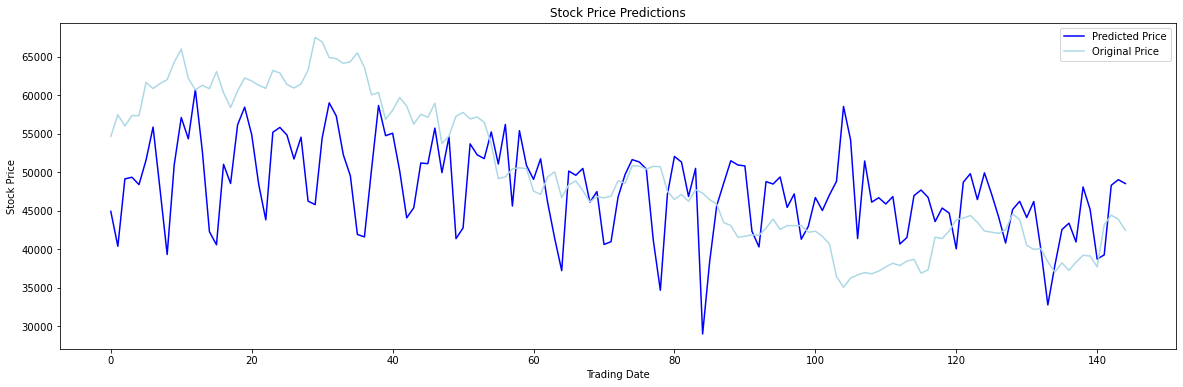

In [28]:
plt.plot(y_pred, color = 'blue', label = 'Predicted Price')
plt.plot(y_test, color = 'lightblue', label = 'Original Price')
 
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(np.arange(0, 160, step=20))  
plt.ylabel('Stock Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

## Prediction

In [29]:
predict_feature

Compound    Volume  FundingRate  Bitcoin_SVI  Cryptocurrency_SVI  \
729  0.538232  0.371137     0.406593      0.12341            0.238668   

     No. of Active Addresses  No. of Unique Addresses  Transactions  
729                 0.581449                 0.561857      0.518231

In [31]:
# Process the data for LSTM
testX =np.array(predict_feature)
predict_feature = testX.reshape(predict_feature.shape[0], 1, predict_feature.shape[1])

In [32]:
predicted_price = lstm.predict(predict_feature)

In [38]:
predicted_price[0][0]

46186.727

Reality: Bitcoin currency had a close price of USD 39,137.61 on 4 Mar 2022.

Prediced: Our model predicted the currency to have a close price of USD 46186.727 on 4 Mar 2022.